# Naive word2vec

This task can be formulated very simply. Follow this [paper](https://arxiv.org/pdf/1411.2738.pdf) and implement word2vec like a two-layer neural network with matrices $W$ and $W'$. One matrix projects words to low-dimensional 'hidden' space and the other - back to high-dimensional vocabulary space.

![word2vec](https://i.stack.imgur.com/6eVXZ.jpg)

You can use TensorFlow/PyTorch (numpy too, if you love to calculate gradients on your own and want some extra points, but don't forget to numerically check your gradients) and code from your previous task. Again: you don't have to implement negative sampling (you may reduce your vocabulary size for faster computation).

**Results of this task**:
 * trained word vectors (mention somewhere, how long it took to train)
 * plotted loss (so we can see that it has converged)
 * function to map token to corresponding word vector
 * beautiful visualizations (PCE, T-SNE), you can use TensorBoard and play with your vectors in 3D (don't forget to add screenshots to the task)
 * qualitative evaluations of word vectors: nearest neighbors, word analogies

**Extra:**
 * quantitative evaluation:
   * for intrinsic evaluation you can find datasets [here](https://aclweb.org/aclwiki/Analogy_(State_of_the_art))
   * for extrincis evaluation you can use [these](https://medium.com/@dataturks/rare-text-classification-open-datasets-9d340c8c508e)

Also, you can find any other datasets for quantitative evaluation. If you chose to do this, please use the same datasets across tasks 3, 4, 5 and 6.

Again. It is **highly recommended** to read this [paper](https://arxiv.org/pdf/1411.2738.pdf)

Example of visualization in tensorboard:
https://projector.tensorflow.org

Example of 2D visualisation:

![2dword2vec](https://www.tensorflow.org/images/tsne.png)

If you struggle with something, ask your neighbor. If it is not obvious for you, probably someone else is looking for the answer too. And in contrast, if you see that you can help someone - do it! Good luck!

In [2]:
from part1 import reduce_to_k_dim, plot_embeddings

In [1]:
from part2 import process_corpus, build_vocab, CBOWBatcher

In [68]:
from part3 import CBOW, get_encode_emb, get_decode_emb, Index

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/evlavrukhin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import torch
from torch import nn
from torch import optim
from torch.nn.init import kaiming_normal_

In [32]:
batcher = CBOWBatcher(batch_size=32, window_size=5, shuffle=True)

In [33]:
%%time
corpus = process_corpus('text8')

CPU times: user 54.5 s, sys: 342 ms, total: 54.9 s
Wall time: 54.9 s


In [34]:
vocab = build_vocab(corpus, min_freq=5)

In [35]:
len(vocab)

71136

In [36]:
%%time
batcher.init(corpus, vocab)

CPU times: user 4.63 s, sys: 672 ms, total: 5.31 s
Wall time: 5.31 s


## Training loop

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = CBOW(vocab_size=len(vocab), hidden_size=300, device=device)

In [ ]:
optimizer = optim.SGD(params=model.parameters(),
                      lr=1e-2, momentum=0.9, weight_decay=1e-6)

In [ ]:
CE_loss = nn.CrossEntropyLoss()

In [ ]:
losses = []
for epoch in range(40):
    for i, (x, y) in tqdm(enumerate(batcher)):
        x_torch = torch.LongTensor(x).to(device)
        y_torch = torch.LongTensor(y).to(device)
        
        activations = model(x_torch)
        loss = CE_loss(activations, y_torch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(float(loss.cpu().data.numpy()))
        if (i + 1) % 1000 == 0:
            print(np.mean(losses[-100:]))

1021it [00:09, 117.21it/s]

8.090093874931336


2017it [00:18, 117.07it/s]

7.591318993568421


3013it [00:26, 117.03it/s]

7.365837707519531


4021it [00:35, 116.93it/s]

7.3936606216430665


5017it [00:43, 117.40it/s]

7.315678420066834


6013it [00:52, 117.21it/s]

7.279061160087585


7021it [01:00, 117.24it/s]

7.024908618927002


8017it [01:09, 117.40it/s]

6.861343770027161


9013it [01:17, 117.17it/s]

6.932198781967163


10021it [01:26, 116.86it/s]

6.754618368148804


11017it [01:34, 117.23it/s]

6.817349920272827


12013it [01:43, 117.04it/s]

6.689244828224182


13021it [01:51, 117.14it/s]

6.490209531784058


14017it [02:00, 117.01it/s]

6.757900972366333


15013it [02:08, 117.01it/s]

6.6697137880325315


16021it [02:17, 117.12it/s]

6.487612047195435


17017it [02:26, 117.14it/s]

6.502357153892517


18013it [02:34, 117.16it/s]

6.442332491874695


19021it [02:43, 117.09it/s]

6.556527309417724


20017it [02:51, 117.00it/s]

6.488082690238953


21013it [03:00, 117.18it/s]

6.338641152381897


22021it [03:08, 117.10it/s]

6.439233732223511


23017it [03:17, 116.99it/s]

6.434793872833252


24013it [03:25, 116.96it/s]

6.293807582855225


25021it [03:34, 116.94it/s]

6.225494685173035


26017it [03:42, 117.34it/s]

6.214198350906372


27013it [03:51, 116.98it/s]

6.261007103919983


28021it [03:59, 116.92it/s]

6.2359468412399295


29017it [04:08, 117.10it/s]

6.331360936164856


30013it [04:16, 117.10it/s]

6.443797721862793


31021it [04:25, 117.08it/s]

6.212272696495056


32017it [04:34, 117.02it/s]

6.262501153945923


33013it [04:42, 117.09it/s]

6.080230441093445


34021it [04:51, 117.07it/s]

6.2764988708496094


35017it [04:59, 117.14it/s]

6.249166564941406


36013it [05:08, 117.12it/s]

6.241978931427002


37021it [05:16, 117.09it/s]

6.185128211975098


38017it [05:25, 117.11it/s]

6.190248246192932


39013it [05:33, 117.03it/s]

6.256579699516297


40021it [05:42, 117.02it/s]

6.21641676902771


41017it [05:50, 116.97it/s]

6.204981093406677


42013it [05:59, 117.14it/s]

6.103215713500976


43021it [06:07, 117.09it/s]

6.247278680801392


44017it [06:16, 116.68it/s]

6.199511885643005


45013it [06:25, 116.90it/s]

6.1281923484802245


46021it [06:33, 116.96it/s]

6.113261308670044


47017it [06:42, 117.13it/s]

6.052698531150818


48013it [06:50, 117.14it/s]

6.124487075805664


49021it [06:59, 117.01it/s]

6.188859515190124


50017it [07:07, 117.10it/s]

6.072530326843261


51013it [07:16, 116.96it/s]

6.1244656944274904


52021it [07:24, 117.14it/s]

6.071600623130799


53017it [07:33, 117.03it/s]

6.107355613708496


54013it [07:41, 116.90it/s]

6.14934766292572


55021it [07:50, 116.97it/s]

6.030069260597229


56017it [07:58, 117.00it/s]

6.124520425796509


57013it [08:07, 116.97it/s]

6.004101991653442


58021it [08:16, 117.13it/s]

6.10017349243164


59017it [08:24, 117.14it/s]

6.038662841320038


60013it [08:33, 117.05it/s]

6.162394971847534


61021it [08:41, 117.10it/s]

6.1688376140594485


62017it [08:50, 117.08it/s]

6.0502583074569705


63013it [08:58, 117.05it/s]

6.020276560783386


64021it [09:07, 117.13it/s]

6.0808931159973145


65017it [09:15, 117.21it/s]

5.927806930541992


66013it [09:24, 117.03it/s]

5.956183300018311


67021it [09:32, 117.02it/s]

6.019362957477569


68017it [09:41, 117.12it/s]

6.11652144908905


69013it [09:49, 117.10it/s]

6.050877337455749


70021it [09:58, 117.12it/s]

6.106769230365753


71017it [10:06, 117.13it/s]

5.8201262617111205


72013it [10:15, 117.05it/s]

5.911219487190246


73021it [10:24, 117.18it/s]

6.0402070426940915


74017it [10:32, 117.08it/s]

5.86877564907074


75013it [10:41, 117.11it/s]

6.062058873176575


76021it [10:49, 117.09it/s]

6.037974662780762


77017it [10:58, 117.09it/s]

6.0826215124130245


78013it [11:06, 117.06it/s]

6.0087647628784175


79021it [11:15, 116.83it/s]

6.000363047122955


80017it [11:23, 116.79it/s]

5.9739478397369385


81013it [11:32, 116.93it/s]

5.978377370834351


82021it [11:40, 117.10it/s]

5.968882122039795


83017it [11:49, 117.13it/s]

6.064460568428039


84013it [11:57, 117.13it/s]

5.979999408721924


85021it [12:06, 117.22it/s]

6.115690875053406


86017it [12:14, 117.21it/s]

6.006704359054566


87013it [12:23, 117.13it/s]

6.0131872320175175


88021it [12:32, 117.02it/s]

5.923798766136169


89017it [12:40, 117.14it/s]

6.19933436870575


90013it [12:49, 117.18it/s]

5.9609788084030155


91021it [12:57, 117.16it/s]

5.8899784708023075


92017it [13:06, 117.10it/s]

6.147143921852112


93013it [13:14, 116.94it/s]

6.052707934379578


94021it [13:23, 117.11it/s]

5.9938079905509944


95017it [13:31, 117.12it/s]

5.903467764854431


96013it [13:40, 117.11it/s]

6.025367379188538


97021it [13:48, 117.16it/s]

6.038755850791931


98017it [13:57, 117.27it/s]

6.048230619430542


99013it [14:05, 117.18it/s]

6.074093089103699


100021it [14:14, 117.18it/s]

5.9663303232192995


101017it [14:22, 117.16it/s]

5.978417568206787


102013it [14:31, 117.18it/s]

5.998039374351501


103021it [14:39, 117.10it/s]

6.0624036693573


104017it [14:48, 117.13it/s]

5.9911946773529055


105013it [14:56, 117.16it/s]

5.918330035209656


106021it [15:05, 117.20it/s]

5.935482187271118


107017it [15:14, 117.11it/s]

5.952965831756591


108013it [15:22, 117.08it/s]

5.992948920726776


109021it [15:31, 117.13it/s]

5.94258716583252


110017it [15:39, 117.14it/s]

6.097823936939239


111013it [15:48, 117.10it/s]

6.005005979537964


112021it [15:56, 117.12it/s]

5.888554158210755


113017it [16:05, 117.09it/s]

5.964510111808777


114013it [16:13, 117.07it/s]

5.951412630081177


115021it [16:22, 116.98it/s]

5.922694063186645


116017it [16:30, 117.03it/s]

5.887554543018341


117013it [16:39, 117.08it/s]

5.93192928314209


118021it [16:48, 117.17it/s]

6.075075855255127


119017it [16:56, 117.16it/s]

5.918801815509796


120013it [17:05, 117.08it/s]

6.025159771442413


121021it [17:13, 117.10it/s]

5.882265105247497


122017it [17:22, 117.16it/s]

5.831022229194641


123013it [17:30, 117.11it/s]

6.002933254241944


124021it [17:39, 117.18it/s]

5.797480249404908


125017it [17:47, 117.15it/s]

5.953197894096374


126013it [17:56, 117.14it/s]

5.948044304847717


127021it [18:04, 117.00it/s]

6.04095718383789


128017it [18:13, 117.29it/s]

5.950743656158448


129013it [18:21, 117.40it/s]

6.021212553977966


130021it [18:30, 117.10it/s]

5.877663893699646


131017it [18:38, 116.93it/s]

5.876780858039856


132013it [18:47, 117.14it/s]

5.972239325046539


133021it [18:55, 117.16it/s]

6.058944964408875


134017it [19:04, 117.20it/s]

5.975698795318603


135013it [19:12, 117.11it/s]

6.003509368896484


136021it [19:21, 117.14it/s]

5.9924525141716005


137017it [19:30, 117.00it/s]

6.02098182439804


138013it [19:38, 117.14it/s]

6.102327666282654


139021it [19:47, 117.06it/s]

5.851956238746643


140017it [19:55, 117.10it/s]

5.819895014762879


141013it [20:04, 117.13it/s]

5.857512893676758


142021it [20:12, 117.13it/s]

6.084636545181274


143017it [20:21, 117.12it/s]

5.931237587928772


144013it [20:29, 117.12it/s]

6.118581130504608


145021it [20:38, 117.01it/s]

5.997010009288788


146017it [20:46, 116.98it/s]

5.832382569313049


147013it [20:55, 117.08it/s]

5.957069816589356


148021it [21:03, 117.06it/s]

5.9778770112991335


149017it [21:12, 117.20it/s]

5.906065626144409


150013it [21:20, 117.10it/s]

5.865444917678833


151021it [21:29, 116.95it/s]

6.0247136497497555


152017it [21:38, 117.07it/s]

6.020833404064178


153013it [21:46, 117.07it/s]

5.892887845039367


154021it [21:55, 117.10it/s]

6.094825921058654


155017it [22:03, 117.07it/s]

5.9928808641433715


156013it [22:12, 117.15it/s]

5.958013453483582


157021it [22:20, 117.06it/s]

5.973649988174438


158017it [22:29, 116.99it/s]

6.126987290382385


159013it [22:37, 117.08it/s]

6.0096965456008915


160021it [22:46, 117.07it/s]

5.926724624633789


161017it [22:54, 117.03it/s]

6.047448511123657


162013it [23:03, 117.09it/s]

5.952983756065368


163021it [23:12, 117.03it/s]

5.812266809940338


164017it [23:20, 117.12it/s]

5.9256546545028685


165013it [23:28, 117.12it/s]

5.9749105215072635


166021it [23:37, 117.02it/s]

5.882121205329895


167017it [23:46, 117.12it/s]

5.997500581741333


168013it [23:54, 117.11it/s]

5.971714324951172


169021it [24:03, 117.08it/s]

5.90830385684967


170017it [24:11, 117.14it/s]

5.994323620796203


171013it [24:20, 117.12it/s]

5.833094885349274


172021it [24:28, 117.15it/s]

5.834786610603333


173017it [24:37, 117.14it/s]

5.922269053459168


174013it [24:45, 117.12it/s]

5.7512012338638305


175021it [24:54, 117.14it/s]

5.865008838176728


176017it [25:02, 117.13it/s]

5.785455181598663


177013it [25:11, 117.02it/s]

5.836659638881684


178021it [25:19, 117.09it/s]

5.818631753921509


179017it [25:28, 117.07it/s]

5.957543222904206


180013it [25:36, 116.94it/s]

6.052861521244049


181021it [25:45, 117.15it/s]

5.837977814674377


182017it [25:54, 117.10it/s]

5.776226887702942


183013it [26:02, 117.12it/s]

5.910961799621582


184021it [26:11, 117.15it/s]

5.849580540657043


185017it [26:19, 116.76it/s]

5.93540931224823


186013it [26:28, 116.91it/s]

5.91647707939148


187021it [26:36, 117.12it/s]

5.98027153968811


188017it [26:45, 117.11it/s]

5.848842844963074


189013it [26:53, 117.14it/s]

5.8942539763450625


190021it [27:02, 117.15it/s]

5.95129086971283


191017it [27:10, 117.14it/s]

5.945693054199219


192013it [27:19, 117.15it/s]

5.97114801645279


193021it [27:27, 117.18it/s]

5.899639148712158


194017it [27:36, 117.12it/s]

5.941114695072174


195013it [27:44, 117.19it/s]

5.877408061027527


196021it [27:53, 117.08it/s]

5.973508343696595


197017it [28:02, 117.06it/s]

5.931869397163391


198013it [28:10, 117.15it/s]

5.823166899681091


199021it [28:19, 117.10it/s]

6.106845107078552


200017it [28:27, 117.09it/s]

5.98064241886139


201013it [28:36, 117.10it/s]

5.838332929611206


202021it [28:44, 117.15it/s]

5.7212268829345705


203017it [28:53, 117.16it/s]

5.949390325546265


204013it [29:01, 117.16it/s]

5.924321703910827


205021it [29:10, 117.09it/s]

5.981981313228607


206017it [29:18, 117.11it/s]

6.057450346946716


207013it [29:27, 117.10it/s]

5.814238870143891


208021it [29:35, 117.16it/s]

6.0196354198455815


209017it [29:44, 117.15it/s]

5.907139809131622


210013it [29:52, 117.17it/s]

5.934875047206878


211021it [30:01, 117.05it/s]

5.934871728420258


212017it [30:10, 117.09it/s]

5.900457499027252


213013it [30:18, 117.13it/s]

5.872189111709595


214021it [30:27, 117.14it/s]

5.895588433742523


215017it [30:35, 117.13it/s]

5.993245820999146


216013it [30:44, 117.12it/s]

5.895752763748169


217021it [30:52, 117.10it/s]

5.990860702991486


218017it [31:01, 117.08it/s]

6.042183146476746


219013it [31:09, 117.15it/s]

5.779814968109131


220021it [31:18, 116.70it/s]

5.937606148719787


221017it [31:26, 116.83it/s]

5.923806853294373


222013it [31:35, 117.14it/s]

5.874235422611236


223021it [31:43, 117.15it/s]

5.8456524467468265


224017it [31:52, 117.17it/s]

5.827308650016785


225013it [32:00, 117.15it/s]

5.926018559932709


226021it [32:09, 117.11it/s]

5.796430320739746


227017it [32:18, 117.14it/s]

5.799875741004944


228013it [32:26, 117.10it/s]

5.889983921051026


229021it [32:35, 117.20it/s]

5.9159059858322145


230017it [32:43, 117.15it/s]

5.919619402885437


231013it [32:52, 117.14it/s]

5.82822350025177


232021it [33:00, 117.04it/s]

6.045488018989563


233017it [33:09, 117.09it/s]

5.821017167568207


234013it [33:17, 117.10it/s]

5.844556879997254


235021it [33:26, 117.08it/s]

5.815029158592224


236017it [33:34, 117.08it/s]

5.766760022640228


237013it [33:43, 117.09it/s]

5.824760463237762


238021it [33:51, 117.08it/s]

6.007374362945557


239017it [34:00, 117.07it/s]

5.686597611904144


240013it [34:08, 117.12it/s]

5.848231937885284


241021it [34:17, 117.07it/s]

5.952109904289245


242017it [34:26, 117.10it/s]

5.968652358055115


243013it [34:34, 117.13it/s]

5.938302698135376


244021it [34:43, 117.10it/s]

5.933873691558838


245017it [34:51, 117.03it/s]

5.79459098815918


246013it [35:00, 117.08it/s]

5.868975043296814


247021it [35:08, 117.12it/s]

5.943541078567505


248017it [35:17, 117.11it/s]

5.822137064933777


249013it [35:25, 117.11it/s]

5.846613392829895


250021it [35:34, 117.11it/s]

5.923763537406922


251017it [35:42, 117.10it/s]

5.967970409393311


252013it [35:51, 117.13it/s]

5.755664927959442


253021it [35:59, 117.08it/s]

5.9861891555786135


254017it [36:08, 117.08it/s]

5.944305047988892


255013it [36:16, 117.08it/s]

5.927251272201538


256021it [36:25, 116.97it/s]

5.871427416801453


257017it [36:34, 117.10it/s]

5.916987366676331


258013it [36:42, 117.14it/s]

5.939371147155762


259021it [36:51, 116.85it/s]

5.7927707886695865


260017it [36:59, 116.97it/s]

5.841331462860108


261013it [37:08, 117.24it/s]

5.866636674404145


262021it [37:16, 117.25it/s]

5.895097403526306


263017it [37:25, 117.25it/s]

5.901298534870148


264013it [37:33, 117.18it/s]

5.8400211954116825


265021it [37:42, 117.14it/s]

6.012023715972901


266017it [37:50, 117.13it/s]

5.907028241157532


267013it [37:59, 117.14it/s]

5.785133609771728


268021it [38:07, 117.12it/s]

6.020236082077027


269017it [38:16, 117.12it/s]

5.837150173187256


270013it [38:24, 117.06it/s]

5.846460821628571


271021it [38:33, 117.07it/s]

5.8748313999176025


272017it [38:41, 117.08it/s]

5.833039038181305


273013it [38:50, 117.11it/s]

5.845822124481201


274021it [38:59, 117.11it/s]

5.810307879447937


275017it [39:07, 116.99it/s]

5.884035110473633


276013it [39:16, 117.01it/s]

5.8528738832473755


277021it [39:24, 116.93it/s]

5.804201965332031


278017it [39:33, 117.02it/s]

5.882684445381164


279013it [39:41, 116.97it/s]

5.905537552833557


280021it [39:50, 116.89it/s]

5.851854269504547


281017it [39:58, 117.24it/s]

5.941607592105865


282013it [40:07, 117.22it/s]

5.840501205921173


283021it [40:15, 117.25it/s]

5.846292901039123


284017it [40:24, 117.23it/s]

5.949994487762451


285013it [40:32, 117.11it/s]

6.043419551849365


286021it [40:41, 116.99it/s]

5.87072895526886


287017it [40:50, 117.07it/s]

5.953965272903442


288013it [40:58, 117.11it/s]

5.942709887027741


289021it [41:07, 117.10it/s]

5.941772503852844


290017it [41:15, 116.97it/s]

5.855776033401489


291013it [41:24, 117.00it/s]

5.715629072189331


292021it [41:32, 117.01it/s]

5.956820688247681


293017it [41:41, 117.10it/s]

5.897425751686097


294013it [41:49, 117.09it/s]

5.7989426612854


295021it [41:58, 117.06it/s]

5.997055196762085


296017it [42:06, 117.05it/s]

6.011929531097412


297013it [42:15, 117.05it/s]

5.919472725391388


298021it [42:23, 117.05it/s]

5.841083891391754


299017it [42:32, 117.06it/s]

5.881777577400207


300013it [42:40, 117.09it/s]

5.897919659614563


301021it [42:49, 117.07it/s]

5.740164277553558


302017it [42:58, 117.11it/s]

5.824241819381714


303013it [43:06, 117.13it/s]

5.750937390327453


304021it [43:15, 117.14it/s]

5.906539709568023


305017it [43:23, 117.13it/s]

5.917064809799195


306013it [43:32, 117.15it/s]

5.815799171924591


307021it [43:40, 117.11it/s]

5.802372817993164


308017it [43:49, 117.08it/s]

6.011112089157105


309013it [43:57, 117.07it/s]

5.857715744972229


310021it [44:06, 117.10it/s]

5.703537468910217


311017it [44:14, 117.09it/s]

5.885167133808136


312013it [44:23, 117.09it/s]

5.939477472305298


313021it [44:31, 117.09it/s]

5.91727792263031


314017it [44:40, 116.99it/s]

5.896354103088379


315013it [44:48, 117.11it/s]

5.824331774711609


316021it [44:57, 117.11it/s]

5.7331217718124385


317017it [45:06, 117.15it/s]

5.894980800151825


318013it [45:14, 117.11it/s]

5.785948023796082


319021it [45:23, 116.94it/s]

5.899999084472657


320017it [45:31, 117.11it/s]

5.8952210426330565


321013it [45:40, 117.12it/s]

5.912507598400116


322021it [45:48, 117.13it/s]

5.705408844947815


323017it [45:57, 117.11it/s]

5.8472815084457395


324013it [46:05, 117.14it/s]

5.905346488952636


325021it [46:14, 117.08it/s]

5.7051791572570805


326017it [46:22, 117.07it/s]

5.987888813018799


327013it [46:31, 116.73it/s]

5.8242682838439945


328021it [46:39, 117.00it/s]

5.804223966598511


329017it [46:48, 117.12it/s]

5.93002682685852


330013it [46:56, 117.16it/s]

5.80338981628418


331021it [47:05, 117.13it/s]

6.006129832267761


332017it [47:14, 117.03it/s]

5.8982151508331295


333013it [47:22, 117.10it/s]

5.899499673843383


334021it [47:31, 117.10it/s]

5.908408150672913


335017it [47:39, 117.10it/s]

5.826552810668946


336013it [47:48, 117.12it/s]

5.905988295078277


337021it [47:56, 117.15it/s]

5.907178647518158


338017it [48:05, 117.12it/s]

5.86393828868866


339013it [48:13, 117.14it/s]

5.851982202529907


340021it [48:22, 117.11it/s]

5.943075308799743


341017it [48:30, 117.04it/s]

5.83226494550705


342013it [48:39, 117.07it/s]

5.9229337906837465


343021it [48:47, 117.08it/s]

5.964329059123993


344017it [48:56, 117.14it/s]

5.853044118881225


345013it [49:04, 117.11it/s]

5.949750347137451


346021it [49:13, 117.08it/s]

5.878380172252655


347017it [49:22, 117.10it/s]

5.862576060295105


348013it [49:30, 117.13it/s]

5.771652140617371


349021it [49:39, 117.14it/s]

5.925648138523102


350017it [49:47, 117.12it/s]

5.604263665676117


351013it [49:56, 117.12it/s]

5.856864914894104


352021it [50:04, 117.10it/s]

5.827315001487732


353017it [50:13, 116.96it/s]

5.8638654088974


354013it [50:21, 117.16it/s]

5.842312872409821


355021it [50:30, 117.07it/s]

5.732216820716858


356017it [50:38, 117.11it/s]

5.71572297334671


357013it [50:47, 117.10it/s]

5.82175796508789


358021it [50:55, 117.12it/s]

5.816713216304779


359017it [51:04, 117.13it/s]

5.776746413707733


360013it [51:12, 117.10it/s]

5.8036451292037965


361021it [51:21, 117.06it/s]

5.583135395050049


362017it [51:30, 116.72it/s]

5.888225121498108


363013it [51:38, 117.09it/s]

5.735754234790802


364021it [51:47, 117.05it/s]

5.964083681106567


365017it [51:55, 117.07it/s]

5.812072963714599


366013it [52:04, 117.14it/s]

5.905600004196167


367021it [52:12, 117.16it/s]

5.851669464111328


368017it [52:21, 117.13it/s]

5.865058445930481


369013it [52:29, 117.05it/s]

5.784422709941864


370021it [52:38, 117.17it/s]

5.8638296222686765


371017it [52:46, 117.13it/s]

5.675416326522827


372013it [52:55, 117.12it/s]

5.791807768344879


373021it [53:03, 117.14it/s]

5.831914720535278


374017it [53:12, 117.08it/s]

5.8004763054847714


375013it [53:20, 117.10it/s]

5.836041851043701


376021it [53:29, 117.11it/s]

5.868148827552796


377017it [53:38, 117.07it/s]

5.849055345058441


378013it [53:46, 117.10it/s]

5.815833206176758


379021it [53:55, 117.13it/s]

5.875757956504822


380017it [54:03, 117.09it/s]

5.8777742767333985


381013it [54:12, 117.09it/s]

5.946192665100098


382021it [54:20, 117.05it/s]

5.767610559463501


383017it [54:29, 117.09it/s]

5.70174931049347


384013it [54:37, 117.06it/s]

5.919310307502746


385021it [54:46, 117.09it/s]

5.688337490558625


386017it [54:54, 117.12it/s]

5.9306184720993045


387013it [55:03, 117.09it/s]

5.827754364013672


388021it [55:11, 117.08it/s]

5.870580010414123


389017it [55:20, 117.11it/s]

5.720255544185639


390013it [55:28, 117.03it/s]

5.944224207401276


391021it [55:37, 117.10it/s]

5.73541209936142


392017it [55:46, 117.15it/s]

5.840817055702209


393013it [55:54, 117.08it/s]

5.82304271697998


394021it [56:03, 117.11it/s]

5.652645180225372


395017it [56:11, 117.11it/s]

5.864819741249084


396013it [56:20, 116.83it/s]

5.81912088394165


397021it [56:28, 116.98it/s]

5.850496797561646


398017it [56:37, 117.07it/s]

5.795259857177735


399013it [56:45, 117.13it/s]

5.861025335788727


400021it [56:54, 117.11it/s]

5.880746545791626


401017it [57:02, 117.14it/s]

5.697322993278504


402013it [57:11, 117.04it/s]

5.834365677833557


403021it [57:19, 117.08it/s]

5.983005657196045


404017it [57:28, 117.13it/s]

5.892621631622315


405013it [57:36, 116.88it/s]

5.777867295742035


406021it [57:45, 117.04it/s]

5.821684260368347


407017it [57:54, 117.04it/s]

5.693154175281524


408013it [58:02, 117.05it/s]

5.876619167327881


409021it [58:11, 117.11it/s]

5.818516330718994


410017it [58:19, 117.01it/s]

5.793906581401825


411013it [58:28, 117.15it/s]

5.793777463436126


412021it [58:36, 117.11it/s]

5.858306546211242


413017it [58:45, 117.08it/s]

5.814129681587219


414013it [58:53, 117.11it/s]

5.949604253768921


415021it [59:02, 117.05it/s]

5.730862267017365


416017it [59:10, 117.04it/s]

5.692232069969177


417013it [59:19, 117.06it/s]

5.736804158687591


418021it [59:27, 117.03it/s]

5.694038686752319


419017it [59:36, 117.05it/s]

5.954392523765564


420013it [59:44, 117.12it/s]

5.93226236820221


421021it [59:53, 117.08it/s]

5.887021775245667


422017it [1:00:02, 117.16it/s]

5.828184494972229


423013it [1:00:10, 117.16it/s]

5.719707903861999


424021it [1:00:19, 117.03it/s]

5.822088141441345


425017it [1:00:27, 117.08it/s]

5.853463044166565


426013it [1:00:36, 117.10it/s]

6.1181272315979


427021it [1:00:44, 117.11it/s]

5.9351696062088015


428017it [1:00:53, 117.14it/s]

5.77698258638382


429013it [1:01:01, 117.09it/s]

5.771831698417664


430021it [1:01:10, 117.10it/s]

5.791641788482666


431017it [1:01:18, 116.69it/s]

5.881113572120666


432013it [1:01:27, 116.74it/s]

5.861867654323578


433021it [1:01:35, 116.99it/s]

5.766104736328125


434017it [1:01:44, 117.10it/s]

5.806047177314758


435013it [1:01:52, 117.12it/s]

5.860349655151367


436021it [1:02:01, 117.11it/s]

5.97122314453125


437017it [1:02:10, 117.14it/s]

5.936532440185547


438013it [1:02:18, 117.08it/s]

5.699451282024383


439021it [1:02:27, 117.13it/s]

5.834298951625824


440017it [1:02:35, 117.08it/s]

5.7507789206504825


441013it [1:02:44, 117.17it/s]

5.795256936550141


442021it [1:02:52, 117.02it/s]

5.618953750133515


443017it [1:03:01, 117.13it/s]

5.879977478981018


444013it [1:03:09, 117.10it/s]

5.966317615509033


445021it [1:03:18, 117.16it/s]

5.87681834936142


446017it [1:03:26, 117.07it/s]

5.761508219242096


447013it [1:03:35, 117.17it/s]

5.764885282516479


448021it [1:03:43, 117.09it/s]

5.708877282142639


449017it [1:03:52, 117.13it/s]

5.817915277481079


450013it [1:04:00, 117.01it/s]

5.847563900947571


451021it [1:04:09, 117.17it/s]

5.841806273460389


452017it [1:04:18, 117.07it/s]

5.857141678333282


453013it [1:04:26, 117.12it/s]

5.905429892539978


454021it [1:04:35, 117.14it/s]

5.835673542022705


455017it [1:04:43, 117.12it/s]

5.823041861057281


456013it [1:04:52, 117.16it/s]

5.842474536895752


457021it [1:05:00, 117.07it/s]

5.7200081300735475


458017it [1:05:09, 117.09it/s]

5.778727855682373


459013it [1:05:17, 117.11it/s]

5.681037137508392


460021it [1:05:26, 117.08it/s]

5.855225763320923


461017it [1:05:34, 117.12it/s]

5.85028217792511


462013it [1:05:43, 117.11it/s]

5.971862645149231


463021it [1:05:51, 117.05it/s]

5.826727702617645


464017it [1:06:00, 117.05it/s]

5.839632318019867


465013it [1:06:08, 117.02it/s]

5.803908050060272


466021it [1:06:17, 116.78it/s]

5.836042149066925


467017it [1:06:26, 117.00it/s]

5.79997679233551


468013it [1:06:34, 117.11it/s]

5.8285634803771975


469021it [1:06:43, 117.13it/s]

5.639634130001068


470017it [1:06:51, 117.05it/s]

5.785508878231049


471013it [1:07:00, 116.97it/s]

5.892570281028748


472021it [1:07:08, 117.06it/s]

5.714055700302124


473017it [1:07:17, 117.07it/s]

5.797070431709289


474013it [1:07:25, 117.05it/s]

5.859926307201386


475021it [1:07:34, 117.09it/s]

5.696890020370484


476017it [1:07:42, 117.11it/s]

5.750634183883667


477013it [1:07:51, 117.12it/s]

5.80460881948471


478021it [1:08:00, 117.11it/s]

5.754564416408539


479017it [1:08:08, 117.12it/s]

6.025184144973755


480013it [1:08:16, 117.14it/s]

5.8134566593170165


481021it [1:08:25, 117.12it/s]

5.704581322669983


482017it [1:08:34, 117.12it/s]

5.772019531726837


483013it [1:08:42, 117.06it/s]

5.831111283302307


484021it [1:08:51, 117.14it/s]

5.811514973640442


485017it [1:08:59, 117.12it/s]

5.996893892288208


486013it [1:09:08, 117.14it/s]

5.769780158996582


487021it [1:09:16, 117.12it/s]

5.786042971611023


488017it [1:09:25, 117.03it/s]

5.78073254108429


489013it [1:09:33, 117.09it/s]

5.808823018074036


490021it [1:09:42, 117.10it/s]

5.837159547805786


491017it [1:09:50, 117.09it/s]

5.698037109375


492013it [1:09:59, 117.02it/s]

5.678386125564575


493021it [1:10:08, 117.02it/s]

5.843954935073852


494017it [1:10:16, 117.00it/s]

5.753105134963989


495013it [1:10:25, 117.10it/s]

5.804302780628205


496021it [1:10:33, 116.88it/s]

5.767080593109131


497017it [1:10:42, 116.95it/s]

5.856721041202545


498013it [1:10:50, 117.11it/s]

5.788792741298676


499021it [1:10:59, 116.93it/s]

5.691104798316956


500017it [1:11:07, 117.04it/s]

5.9538822364807125


501013it [1:11:16, 117.06it/s]

5.858575730323792


502021it [1:11:24, 117.01it/s]

5.825332820415497


503017it [1:11:33, 116.89it/s]

5.692624864578247


504013it [1:11:41, 116.91it/s]

6.023258194923401


505021it [1:11:50, 116.91it/s]

5.889046959877014


506017it [1:11:59, 116.97it/s]

5.9666211032867436


507013it [1:12:07, 116.88it/s]

5.815380334854126


508021it [1:12:16, 117.00it/s]

5.867875442504883


509017it [1:12:24, 116.90it/s]

5.938033137321472


510013it [1:12:33, 116.95it/s]

5.861932260990143


511021it [1:12:41, 116.93it/s]

5.670938334465027


512017it [1:12:50, 116.86it/s]

5.869594440460205


513013it [1:12:58, 116.93it/s]

5.765411460399628


514021it [1:13:07, 116.98it/s]

5.707744927406311


515017it [1:13:15, 116.91it/s]

5.692378814220429


516013it [1:13:24, 116.98it/s]

5.7882653331756595


517021it [1:13:33, 116.97it/s]

5.735524299144745


518017it [1:13:41, 116.98it/s]

5.681912138462066


519013it [1:13:50, 117.02it/s]

5.866221332550049


520021it [1:13:58, 116.97it/s]

5.750566177368164


521017it [1:14:07, 117.02it/s]

5.794072704315186


522013it [1:14:15, 116.97it/s]

5.808403010368347


523021it [1:14:24, 116.95it/s]

5.72797518491745


524017it [1:14:32, 116.98it/s]

5.704695410728455


525013it [1:14:41, 116.89it/s]

5.842476286888123


526021it [1:14:49, 117.01it/s]

5.793957448005676


527017it [1:14:58, 116.74it/s]

5.534341897964477


528013it [1:15:06, 116.99it/s]

5.937801060676574


529021it [1:15:15, 117.04it/s]

5.785459978580475


530017it [1:15:24, 117.10it/s]

5.822216868400574


531013it [1:15:32, 117.13it/s]

5.7001011943817135


531491it [1:15:36, 117.15it/s]
1021it [00:09, 117.10it/s]

5.902942051887512


2017it [00:18, 117.10it/s]

5.973590340614319


3013it [00:26, 116.97it/s]

5.793280615806579


4021it [00:35, 117.09it/s]

5.767582304477692


5017it [00:43, 116.64it/s]

5.761196553707123


6013it [00:52, 116.83it/s]

5.815323581695557


7021it [01:00, 117.26it/s]

5.838173336982727


8017it [01:09, 117.12it/s]

5.7353488540649415


9013it [01:17, 117.13it/s]

5.856827917098999


10021it [01:26, 117.11it/s]

5.761544888019562


11017it [01:34, 117.08it/s]

5.688826060295105


12013it [01:43, 117.13it/s]

5.791070880889893


13021it [01:52, 117.11it/s]

5.782820520401001


14017it [02:00, 117.11it/s]

5.808229815959931


15013it [02:09, 117.10it/s]

5.741866204738617


16021it [02:17, 117.05it/s]

5.934564995765686


17017it [02:26, 117.11it/s]

5.864333868026733


18013it [02:34, 117.12it/s]

5.748350279331207


19021it [02:43, 117.09it/s]

5.730052244663239


20017it [02:51, 117.16it/s]

5.896931757926941


21013it [03:00, 117.13it/s]

5.724820413589478


22021it [03:08, 117.08it/s]

5.820575742721558


23017it [03:17, 117.24it/s]

5.885637173652649


24013it [03:25, 117.05it/s]

5.679990425109863


25021it [03:34, 117.13it/s]

5.710239505767822


26017it [03:42, 117.10it/s]

5.708083715438843


27013it [03:51, 117.09it/s]

5.7537917470932


28021it [04:00, 117.01it/s]

5.722470376491547


29017it [04:08, 117.16it/s]

5.805429787635803


30013it [04:17, 117.14it/s]

5.813990428447723


31021it [04:25, 117.13it/s]

5.664861462116241


32017it [04:34, 117.22it/s]

5.762190489768982


33013it [04:42, 117.11it/s]

5.824745264053345


34021it [04:51, 117.13it/s]

5.709786331653595


35017it [04:59, 117.11it/s]

5.734587302207947


36013it [05:08, 116.96it/s]

5.660389268398285


37021it [05:16, 116.90it/s]

5.784020237922668


38017it [05:25, 116.99it/s]

5.786123511791229


39013it [05:33, 116.98it/s]

5.765522971153259


40021it [05:42, 117.09it/s]

5.84406626701355


41017it [05:50, 116.88it/s]

5.768683438301086


42013it [05:59, 116.89it/s]

5.700991690158844


43021it [06:08, 117.07it/s]

5.688196334838867


44017it [06:16, 117.12it/s]

5.934767715930938


45013it [06:25, 117.11it/s]

5.7556364274024965


46021it [06:33, 117.15it/s]

5.867606065273285


47017it [06:42, 117.17it/s]

5.725108613967896


48013it [06:50, 117.13it/s]

5.778533530235291


49021it [06:59, 117.11it/s]

5.890144386291504


50017it [07:07, 117.17it/s]

5.698601191043854


51013it [07:16, 117.17it/s]

5.7531009817123415


52021it [07:24, 117.14it/s]

5.896663320064545


53017it [07:33, 117.18it/s]

5.8700697183609005


54013it [07:41, 117.14it/s]

5.777524051666259


55021it [07:50, 117.14it/s]

5.7512036180496215


56017it [07:58, 117.17it/s]

5.827328040599823


57013it [08:07, 117.20it/s]

5.816839413642883


58021it [08:16, 117.14it/s]

5.646978335380554


59017it [08:24, 117.15it/s]

5.791126070022583


60013it [08:33, 117.17it/s]

5.917805666923523


61021it [08:41, 117.15it/s]

5.691660733222961


62017it [08:50, 117.16it/s]

5.836002180576324


63013it [08:58, 117.10it/s]

5.6797738456726075


64021it [09:07, 117.11it/s]

5.731689016819001


65017it [09:15, 117.15it/s]

5.7952344346046445


66013it [09:24, 117.11it/s]

5.8342229795455935


67021it [09:32, 117.13it/s]

5.785762467384338


68017it [09:41, 117.14it/s]

5.801617202758789


69013it [09:49, 117.13it/s]

5.768570594787597


70021it [09:58, 117.11it/s]

5.78436494588852


71017it [10:06, 117.16it/s]

5.8805490851402284


72013it [10:15, 117.13it/s]

5.700793929100037


73021it [10:23, 117.13it/s]

5.799141829013824


74017it [10:32, 117.19it/s]

5.947120175361634


75013it [10:40, 116.61it/s]

5.843631684780121


76021it [10:49, 116.95it/s]

5.7209657955169675


77017it [10:58, 117.12it/s]

5.85204425573349


78013it [11:06, 117.16it/s]

5.7615502738952635


79021it [11:15, 117.18it/s]

5.858296504020691


80017it [11:23, 117.26it/s]

5.800001623630524


81013it [11:32, 117.15it/s]

5.723914093971253


82021it [11:40, 117.14it/s]

5.855684356689453


83017it [11:49, 117.17it/s]

5.716909008026123


84013it [11:57, 117.17it/s]

5.737725834846497


85021it [12:06, 117.16it/s]

5.647521822452545


86017it [12:14, 117.13it/s]

5.7429295253753665


87013it [12:23, 117.19it/s]

5.7024187564849855


88021it [12:31, 117.15it/s]

5.805854251384735


89017it [12:40, 117.12it/s]

5.701454091072082


90013it [12:48, 117.13it/s]

5.7290731620788575


91021it [12:57, 117.15it/s]

5.695334873199463


92017it [13:06, 117.13it/s]

5.752472612857819


93013it [13:14, 117.13it/s]

5.806935086250305


94021it [13:23, 117.13it/s]

5.600257639884949


95017it [13:31, 117.15it/s]

5.650500788688659


96013it [13:40, 117.10it/s]

5.870782136917114


97021it [13:48, 117.10it/s]

5.716959209442138


98017it [13:57, 117.19it/s]

5.773493614196777


99013it [14:05, 117.17it/s]

5.7890568804740905


100021it [14:14, 117.20it/s]

5.756436882019043


101017it [14:22, 117.16it/s]

5.806042294502259


102013it [14:31, 117.17it/s]

5.782076754570007


103021it [14:39, 117.18it/s]

5.83975845336914


104017it [14:48, 117.20it/s]

5.760682868957519


105013it [14:56, 117.19it/s]

5.909271650314331


106021it [15:05, 117.15it/s]

5.960079827308655


107017it [15:13, 117.10it/s]

5.714678511619568


108013it [15:22, 117.16it/s]

5.834750878810882


109021it [15:31, 117.10it/s]

5.703968253135681


110017it [15:39, 117.05it/s]

5.727268354892731


111013it [15:48, 116.95it/s]

5.692656834125518


112021it [15:56, 117.17it/s]

5.871923580169677


113017it [16:05, 117.09it/s]

5.728641004562378


114013it [16:13, 117.11it/s]

5.75455650806427


115021it [16:22, 117.08it/s]

5.746225891113281


116017it [16:30, 117.10it/s]

5.694127945899964


117013it [16:39, 117.16it/s]

5.904209198951722


118021it [16:47, 117.13it/s]

5.765069074630738


119017it [16:56, 117.19it/s]

5.7782904505729675


120013it [17:04, 117.21it/s]

5.693756310939789


121021it [17:13, 117.10it/s]

5.94559332370758


122017it [17:21, 117.18it/s]

5.830694961547851


123013it [17:30, 117.09it/s]

5.84685640335083


124021it [17:39, 117.09it/s]

5.7345935821533205


125017it [17:47, 117.17it/s]

5.818113689422607


126013it [17:56, 117.15it/s]

5.809573154449463


127021it [18:04, 117.06it/s]

5.763956563472748


128017it [18:13, 117.07it/s]

5.916365022659302


129013it [18:21, 117.07it/s]

5.777376217842102


130021it [18:30, 117.08it/s]

5.762788138389587


131017it [18:38, 117.11it/s]

5.780501546859742


132013it [18:47, 117.07it/s]

5.707208867073059


133021it [18:55, 117.06it/s]

5.754642572402954


134017it [19:04, 117.07it/s]

5.7131418919563295


135013it [19:12, 117.04it/s]

5.692590610980988


136021it [19:21, 117.07it/s]

5.881350750923157


137017it [19:29, 117.08it/s]

5.746035068035126


138013it [19:38, 117.10it/s]

5.726912724971771


139021it [19:47, 117.00it/s]

5.703096656799317


140017it [19:55, 117.09it/s]

5.603846378326416


141013it [20:04, 117.14it/s]

5.761744539737702


142021it [20:12, 117.13it/s]

5.845671782493591


143017it [20:21, 117.11it/s]

5.917394623756409


144013it [20:29, 117.20it/s]

5.7574106884002685


145021it [20:38, 116.99it/s]

5.851118669509888


146017it [20:46, 117.09it/s]

5.794032983779907


147013it [20:55, 116.79it/s]

5.781279585361481


148021it [21:03, 117.12it/s]

5.846884527206421


149017it [21:12, 117.07it/s]

5.822106142044067


150013it [21:20, 117.10it/s]

5.688248906135559


151021it [21:29, 117.11it/s]

5.818056561946869


152017it [21:37, 117.12it/s]

5.739562830924988


153013it [21:46, 117.12it/s]

5.809175515174866


154021it [21:55, 116.91it/s]

5.663383595943451


155017it [22:03, 117.21it/s]

5.873078670501709


156013it [22:12, 117.18it/s]

5.715484294891358


157021it [22:20, 116.96it/s]

5.805865879058838


158017it [22:29, 117.11it/s]

5.696558742523194


159013it [22:37, 117.17it/s]

5.758001518249512


160021it [22:46, 117.14it/s]

5.760574686527252


161017it [22:54, 117.16it/s]

5.884968967437744


162013it [23:03, 117.17it/s]

5.784317393302917


163021it [23:11, 117.15it/s]

5.740435199737549


164017it [23:20, 117.18it/s]

5.765691084861755


165013it [23:28, 117.19it/s]

5.650974690914154


166021it [23:37, 117.16it/s]

5.763502550125122


167017it [23:45, 117.18it/s]

5.764664835929871


168013it [23:54, 117.15it/s]

5.825004825592041


169021it [24:03, 117.09it/s]

5.8009082269668575


170017it [24:11, 117.10it/s]

5.7686764526367185


171013it [24:20, 117.19it/s]

5.899247436523438


172021it [24:28, 117.09it/s]

5.714587936401367


173017it [24:37, 117.11it/s]

5.812527990341186


174013it [24:45, 117.20it/s]

5.801225154399872


175021it [24:54, 117.03it/s]

5.738162429332733


176017it [25:02, 117.10it/s]

5.69721289396286


177013it [25:11, 117.07it/s]

5.913404498100281


178021it [25:19, 117.06it/s]

5.787962710857391


179017it [25:28, 117.08it/s]

5.7438271045684814


180013it [25:36, 117.09it/s]

5.7844383430480955


181021it [25:45, 117.19it/s]

5.700502977371216


182017it [25:53, 116.76it/s]

5.737397985458374


183013it [26:02, 117.07it/s]

5.781849632263183


184021it [26:11, 117.04it/s]

5.655003550052643


185017it [26:19, 117.12it/s]

5.710774216651917


186013it [26:28, 117.19it/s]

5.989778273105621


187021it [26:36, 117.15it/s]

5.773478426933289


188017it [26:45, 117.07it/s]

5.652862455844879


189013it [26:53, 116.99it/s]

5.6895192742347716


190021it [27:02, 117.09it/s]

5.634810934066772


191017it [27:10, 117.13it/s]

5.679652798175812


192013it [27:19, 117.10it/s]

5.781749048233032


193021it [27:27, 117.13it/s]

5.805189390182495


194017it [27:36, 117.14it/s]

5.7260108041763305


195013it [27:44, 117.10it/s]

5.928497731685638


196021it [27:53, 117.15it/s]

5.708492231369019


197017it [28:01, 117.09it/s]

5.820316534042359


198013it [28:10, 117.09it/s]

5.768693416118622


199021it [28:18, 117.13it/s]

5.831078553199768


200017it [28:27, 117.10it/s]

5.6371708106994625


201013it [28:35, 117.11it/s]

5.859188847541809


202021it [28:44, 117.05it/s]

5.700924558639526


203017it [28:53, 117.15it/s]

5.787116906642914


204013it [29:01, 117.14it/s]

5.87554054737091


205021it [29:10, 117.08it/s]

5.910626664161682


206017it [29:18, 117.03it/s]

5.708292949199676


207013it [29:27, 117.12it/s]

5.703188614845276


208021it [29:35, 117.14it/s]

5.822924513816833


209017it [29:44, 117.13it/s]

5.8174952077865605


210013it [29:52, 117.09it/s]

5.683768036365509


211021it [30:01, 117.08it/s]

5.830659880638122


212017it [30:09, 117.10it/s]

5.667095584869385


213013it [30:18, 117.10it/s]

5.746051619052887


214021it [30:26, 117.11it/s]

5.691833853721619


215017it [30:35, 117.20it/s]

5.862970728874206


216013it [30:43, 116.95it/s]

5.923030633926391


217021it [30:52, 116.91it/s]

5.760904843807221


218017it [31:01, 117.07it/s]

5.708618061542511


219013it [31:09, 117.10it/s]

5.813882517814636


220021it [31:18, 117.10it/s]

5.816745157241821


221017it [31:26, 117.10it/s]

5.681204895973206


222013it [31:35, 117.10it/s]

5.948650887012482


223021it [31:43, 117.08it/s]

5.707297039031983


224017it [31:52, 117.11it/s]

5.825032405853271


225013it [32:00, 117.01it/s]

5.794504339694977


226021it [32:09, 117.10it/s]

5.81981431722641


227017it [32:17, 117.10it/s]

5.799879059791565


228013it [32:26, 117.10it/s]

5.792202687263488


229021it [32:34, 117.13it/s]

5.7849520444869995


230017it [32:43, 117.13it/s]

5.795119009017944


231013it [32:51, 117.12it/s]

5.634182765483856


232021it [33:00, 117.08it/s]

5.74746657371521


233017it [33:09, 117.10it/s]

5.8258842086791995


234013it [33:17, 117.15it/s]

5.678416635990143


235021it [33:26, 117.15it/s]

5.850053336620331


236017it [33:34, 117.09it/s]

5.766941432952881


237013it [33:43, 117.11it/s]

5.699902203083038


238021it [33:51, 117.11it/s]

5.891547727584839


239017it [34:00, 117.02it/s]

5.742104163169861


240013it [34:08, 117.10it/s]

5.694318947792053


241021it [34:17, 117.09it/s]

5.7209210872650145


242017it [34:25, 117.10it/s]

5.714605913162232


243013it [34:34, 117.17it/s]

5.705675258636474


244021it [34:42, 117.19it/s]

5.807633867263794


245017it [34:51, 117.09it/s]

5.76841391324997


246013it [34:59, 117.08it/s]

5.748807184696197


247021it [35:08, 117.10it/s]

5.715618185997009


248017it [35:17, 117.08it/s]

5.780492935180664


249013it [35:25, 117.14it/s]

5.890652399063111


250021it [35:34, 117.03it/s]

5.720200252532959


251017it [35:42, 116.46it/s]

5.744568147659302


252013it [35:51, 116.83it/s]

5.749448442459107


253021it [35:59, 117.04it/s]

5.791063189506531


254017it [36:08, 117.10it/s]

5.822521648406982


255013it [36:16, 117.19it/s]

5.68688312292099


256021it [36:25, 117.11it/s]

5.681488857269287


257017it [36:33, 117.13it/s]

5.669562473297119


258013it [36:42, 117.16it/s]

5.61160059928894


259021it [36:50, 117.12it/s]

5.753144886493683


260017it [36:59, 117.15it/s]

5.77456111907959


261013it [37:07, 117.13it/s]

5.727104301452637


262021it [37:16, 117.17it/s]

5.767810299396515


263017it [37:25, 117.15it/s]

5.836164357662201


264013it [37:33, 117.15it/s]

5.739143223762512


265021it [37:42, 117.15it/s]

5.784364745616913


266017it [37:50, 117.08it/s]

5.805684146881103


267013it [37:59, 117.11it/s]

5.80219717502594


268021it [38:07, 117.10it/s]

5.9328450989723205


269017it [38:16, 117.15it/s]

5.650018079280853


270013it [38:24, 117.14it/s]

5.619399139881134


271021it [38:33, 117.15it/s]

5.644282953739166


272017it [38:41, 117.08it/s]

5.8147554063797


273013it [38:50, 117.08it/s]

5.773612153530121


274021it [38:58, 117.13it/s]

5.838734517097473


275017it [39:07, 117.07it/s]

5.55732560634613


276013it [39:15, 117.12it/s]

5.84533659696579


277021it [39:24, 117.12it/s]

5.587719213962555


278017it [39:33, 117.11it/s]

5.714579787254333


279013it [39:41, 117.07it/s]

5.799547643661499


280021it [39:50, 117.13it/s]

5.770401642322541


281017it [39:58, 117.14it/s]

5.765924563407898


282013it [40:07, 117.16it/s]

5.810820438861847


283021it [40:15, 117.13it/s]

5.692368535995484


284017it [40:24, 117.02it/s]

5.87788610458374


285013it [40:32, 117.06it/s]

5.820026376247406


286021it [40:41, 117.06it/s]

5.7049560594558715


287017it [40:49, 116.83it/s]

5.740388312339783


288013it [40:58, 117.12it/s]

5.803514795303345


289021it [41:06, 117.20it/s]

5.771670546531677


290017it [41:15, 117.13it/s]

5.692926688194275


291013it [41:23, 117.14it/s]

5.886172943115234


292021it [41:32, 117.12it/s]

5.677162191867828


293017it [41:41, 117.17it/s]

5.795061097145081


294013it [41:49, 117.16it/s]

5.846614277362823


295021it [41:58, 117.16it/s]

5.712809844017029


296017it [42:06, 117.14it/s]

5.610524008274078


297013it [42:15, 117.09it/s]

5.867398147583008


298021it [42:23, 117.07it/s]

5.768498418331146


299017it [42:32, 117.12it/s]

5.701760303974152


300013it [42:40, 117.14it/s]

5.700934538841247


301021it [42:49, 117.17it/s]

5.840226294994355


302017it [42:57, 117.13it/s]

5.811667742729187


303013it [43:06, 117.06it/s]

5.813954272270203


304021it [43:14, 117.09it/s]

5.850889964103699


305017it [43:23, 117.13it/s]

5.925626168251037


306013it [43:31, 117.15it/s]

5.609133663177491


307021it [43:40, 117.13it/s]

5.746531455516815


308017it [43:48, 117.12it/s]

5.631242256164551


309013it [43:57, 117.09it/s]

5.7099190926551815


310021it [44:06, 117.12it/s]

5.799661345481873


311017it [44:14, 117.11it/s]

5.678797688484192


312013it [44:23, 117.15it/s]

5.670833396911621


313021it [44:31, 117.14it/s]

5.746119546890259


314017it [44:40, 117.11it/s]

5.704080801010132


315013it [44:48, 117.14it/s]

5.672686204910279


316021it [44:57, 117.15it/s]

5.8381538534164426


317017it [45:05, 117.15it/s]

5.701921005249023


318013it [45:14, 117.17it/s]

5.767035958766937


319021it [45:22, 117.14it/s]

5.745029883384705


320017it [45:31, 117.16it/s]

5.713668620586395


321013it [45:39, 117.12it/s]

5.849032108783722


322021it [45:48, 117.06it/s]

5.581701843738556


323017it [45:56, 117.13it/s]

5.735076420307159


324013it [46:05, 116.87it/s]

5.619315555095673


325021it [46:14, 116.96it/s]

5.76097342967987


326017it [46:22, 117.23it/s]

5.572612974643707


327013it [46:31, 117.01it/s]

5.744822082519531


328021it [46:39, 116.98it/s]

5.677727670669555


329017it [46:48, 116.97it/s]

5.712524073123932


330013it [46:56, 116.98it/s]

5.755849273204803


331021it [47:05, 117.03it/s]

5.750736432075501


332017it [47:13, 117.05it/s]

5.69732004404068


333013it [47:22, 116.98it/s]

5.681092796325683


334021it [47:30, 117.02it/s]

5.899078381061554


335017it [47:39, 117.03it/s]

5.815099568367004


336013it [47:47, 116.99it/s]

5.745512800216675


337021it [47:56, 117.01it/s]

5.745389819145203


338017it [48:05, 116.99it/s]

5.657570626735687


339013it [48:13, 116.98it/s]

5.725498571395874


340021it [48:22, 117.04it/s]

5.580024032592774


341017it [48:30, 117.01it/s]

5.714881274700165


342013it [48:39, 117.02it/s]

5.871438660621643


343021it [48:47, 116.99it/s]

5.721939415931701


344017it [48:56, 116.97it/s]

5.659351568222046


345013it [49:04, 116.94it/s]

5.6587428283691406


346021it [49:13, 117.21it/s]

5.799991049766541


347017it [49:21, 117.21it/s]

5.699780523777008


348013it [49:30, 117.23it/s]

5.722446179389953


349021it [49:38, 117.21it/s]

5.720593950748444


350017it [49:47, 117.17it/s]

5.690590646266937


351013it [49:55, 117.24it/s]

5.718898797035218


352021it [50:04, 117.20it/s]

5.7491244173049925


353017it [50:13, 117.13it/s]

5.723896760940551


354013it [50:21, 117.10it/s]

5.751544923782348


355021it [50:30, 117.06it/s]

5.745025844573974


356017it [50:38, 116.97it/s]

5.827915925979614


357013it [50:47, 117.11it/s]

5.855490372180939


358021it [50:55, 116.95it/s]

5.693243114948273


359017it [51:04, 117.07it/s]

5.61433777809143


360013it [51:12, 117.02it/s]

5.730859129428864


361021it [51:21, 117.13it/s]

5.793492636680603


362017it [51:29, 116.97it/s]

5.740557954311371


363013it [51:38, 116.94it/s]

5.730874800682068


364021it [51:46, 117.01it/s]

5.712253179550171


365017it [51:55, 117.13it/s]

5.7266970205307


366013it [52:03, 117.10it/s]

5.834786331653595


367021it [52:12, 117.08it/s]

5.605173370838165


368017it [52:21, 117.12it/s]

5.709772074222565


369013it [52:29, 116.97it/s]

5.662351233959198


370021it [52:38, 117.02it/s]

5.7056117796897885


371017it [52:46, 117.13it/s]

5.740910453796387


372013it [52:55, 116.95it/s]

5.754071187973023


373021it [53:03, 116.82it/s]

5.815311884880066


374017it [53:12, 116.91it/s]

5.797898559570313


375013it [53:20, 117.07it/s]

5.830083990097046


376021it [53:29, 117.10it/s]

5.6971899819374086


377017it [53:37, 117.04it/s]

5.648369619846344


378013it [53:46, 117.12it/s]

5.698744497299194


379021it [53:55, 117.15it/s]

5.797453861236573


380017it [54:03, 117.10it/s]

5.8180332851409915


381013it [54:12, 117.05it/s]

5.763881940841674


382021it [54:20, 117.05it/s]

5.646994507312774


383017it [54:29, 117.08it/s]

5.638542726039886


384013it [54:37, 116.96it/s]

5.721802096366883


385021it [54:46, 117.09it/s]

5.7394059371948245


386017it [54:54, 117.10it/s]

5.589991652965546


387013it [55:03, 117.16it/s]

5.726916069984436


388021it [55:11, 117.07it/s]

5.748395166397095


389017it [55:20, 117.07it/s]

5.620485320091247


390013it [55:28, 117.12it/s]

5.802439317703247


391021it [55:37, 117.09it/s]

5.840771169662475


392017it [55:45, 117.36it/s]

5.684508516788482


393013it [55:54, 117.02it/s]

5.819519538879394


394021it [56:03, 117.09it/s]

5.749746956825256


395017it [56:11, 117.03it/s]

5.715633895397186


396013it [56:20, 117.14it/s]

5.741926143169403


397021it [56:28, 117.09it/s]

5.689195969104767


398017it [56:37, 117.11it/s]

5.456510694026947


399013it [56:45, 117.11it/s]

5.8205955743789675


400021it [56:54, 117.10it/s]

5.753776519298554


401017it [57:02, 117.08it/s]

5.726955919265747


402013it [57:11, 117.12it/s]

5.622062902450562


403021it [57:19, 117.10it/s]

5.717812962532044


404017it [57:28, 117.10it/s]

5.6877884936332705


405013it [57:36, 117.09it/s]

5.863077025413514


406021it [57:45, 117.07it/s]

5.7289087772369385


407017it [57:53, 117.13it/s]

5.800150394439697


408013it [58:02, 117.07it/s]

5.769483263492584


409021it [58:11, 117.02it/s]

5.716775281429291


410017it [58:19, 117.06it/s]

5.72299878358841


411013it [58:28, 117.11it/s]

5.668472146987915


412021it [58:36, 117.14it/s]

5.864604263305664


413017it [58:45, 117.17it/s]

5.71140266418457


414013it [58:53, 117.14it/s]

5.818530879020691


415021it [59:02, 117.05it/s]

5.846986806392669


416017it [59:10, 117.10it/s]

5.668636755943298


417013it [59:19, 117.14it/s]

5.589941322803497


418021it [59:27, 117.14it/s]

5.639608972072601


419017it [59:36, 117.06it/s]

5.66807853937149


420013it [59:44, 117.07it/s]

5.720694522857666


421021it [59:53, 117.14it/s]

5.83305070400238


422017it [1:00:01, 117.15it/s]

5.763043553829193


423013it [1:00:10, 117.09it/s]

5.686099190711975


424021it [1:00:19, 117.14it/s]

5.636129040718078


425017it [1:00:27, 117.18it/s]

5.857366199493408


426013it [1:00:36, 117.09it/s]

5.6513433837890625


427021it [1:00:44, 117.03it/s]

5.818052916526795


428017it [1:00:53, 116.72it/s]

5.682285540103912


429013it [1:01:01, 117.11it/s]

5.808160009384156


430021it [1:01:10, 117.09it/s]

5.56082394361496


431017it [1:01:18, 117.15it/s]

5.771726713180542


432013it [1:01:27, 117.08it/s]

5.610314133167267


433021it [1:01:35, 116.97it/s]

5.649894721508026


434017it [1:01:44, 117.11it/s]

5.660083515644073


435013it [1:01:52, 117.06it/s]

5.694198417663574


436021it [1:02:01, 117.09it/s]

5.718328998088837


437017it [1:02:09, 117.12it/s]

5.742331686019898


438013it [1:02:18, 117.15it/s]

5.746726377010345


439021it [1:02:27, 117.08it/s]

5.789119403362275


440017it [1:02:35, 117.02it/s]

5.696199755668641


441013it [1:02:44, 117.00it/s]

5.755687453746796


442021it [1:02:52, 117.12it/s]

5.663477456569671


443017it [1:03:01, 117.16it/s]

5.811609864234924


444013it [1:03:09, 117.16it/s]

5.742530448436737


445021it [1:03:18, 117.14it/s]

5.642517015933991


446017it [1:03:26, 117.13it/s]

5.696229736804963


447013it [1:03:35, 117.13it/s]

5.7303051543235775


448021it [1:03:43, 117.13it/s]

5.825723752975464


449017it [1:03:52, 117.11it/s]

5.719141776561737


450013it [1:04:00, 116.88it/s]

5.6352720761299135


451021it [1:04:09, 117.11it/s]

5.804664158821106


452017it [1:04:17, 117.12it/s]

5.69667370557785


453013it [1:04:26, 117.06it/s]

5.699010946750641


454021it [1:04:35, 117.07it/s]

5.793651750087738


455017it [1:04:43, 117.06it/s]

5.78646582365036


456013it [1:04:52, 117.07it/s]

5.757576956748962


457021it [1:05:00, 117.10it/s]

5.8037815761566165


458017it [1:05:09, 117.09it/s]

5.833343546390534


459013it [1:05:17, 117.05it/s]

5.542893605232239


460021it [1:05:26, 117.08it/s]

5.673087906837464


461017it [1:05:34, 117.06it/s]

5.664445612430573


462013it [1:05:43, 117.07it/s]

5.773261795043945


463021it [1:05:51, 116.95it/s]

5.670968055725098


464017it [1:06:00, 117.06it/s]

5.8102369260787965


465013it [1:06:08, 117.17it/s]

5.791535291671753


466021it [1:06:17, 117.14it/s]

5.597080428600311


467017it [1:06:25, 117.12it/s]

5.748099482059478


468013it [1:06:34, 117.10it/s]

5.68840060710907


469021it [1:06:43, 117.09it/s]

5.671321816444397


470017it [1:06:51, 117.09it/s]

5.780181708335877


471013it [1:07:00, 117.04it/s]

5.686680207252502


472021it [1:07:08, 117.05it/s]

5.587840409278869


473017it [1:07:17, 117.05it/s]

5.688638379573822


474013it [1:07:25, 117.18it/s]

5.750975713729859


475021it [1:07:34, 117.15it/s]

5.657059557437897


476017it [1:07:42, 117.17it/s]

5.661458187103271


477013it [1:07:51, 117.18it/s]

5.693772399425507


478021it [1:07:59, 117.12it/s]

5.699332387447357


479017it [1:08:08, 117.12it/s]

5.812231583595276


480013it [1:08:16, 117.13it/s]

5.799917352199555


481021it [1:08:25, 117.15it/s]

5.729929833412171


482017it [1:08:33, 117.05it/s]

5.694253733158112


483013it [1:08:42, 117.17it/s]

5.682665009498596


484021it [1:08:50, 117.13it/s]

5.863727703094482


485017it [1:08:59, 117.16it/s]

5.650236113071442


486013it [1:09:07, 117.15it/s]

5.749523057937622


487021it [1:09:16, 117.10it/s]

5.757011549472809


488017it [1:09:25, 117.14it/s]

5.78268452167511


489013it [1:09:33, 117.12it/s]

5.773771879673004


490021it [1:09:42, 117.10it/s]

5.67835771560669


491017it [1:09:50, 117.12it/s]

5.659120500087738


492013it [1:09:59, 117.00it/s]

5.693618628978729


493021it [1:10:07, 117.14it/s]

5.774568428993225


494017it [1:10:16, 117.09it/s]

5.771272463798523


495013it [1:10:24, 117.10it/s]

5.662528738975525


496021it [1:10:33, 117.01it/s]

5.6814012885093685


497017it [1:10:41, 117.20it/s]

5.720484137535095


498013it [1:10:50, 116.94it/s]

5.606830365657807


499021it [1:10:58, 117.09it/s]

5.75181625366211


500017it [1:11:07, 117.03it/s]

5.769954199790955


501013it [1:11:15, 117.15it/s]

5.797344148159027


502021it [1:11:24, 117.06it/s]

5.633131365776062


503017it [1:11:33, 117.04it/s]

5.71589637041092


504013it [1:11:41, 117.13it/s]

5.663109254837036


505021it [1:11:50, 117.07it/s]

5.54759295463562


506017it [1:11:58, 117.10it/s]

5.636526985168457


507013it [1:12:07, 117.05it/s]

5.872651405334473


508021it [1:12:15, 117.15it/s]

5.728523812294006


509017it [1:12:24, 117.05it/s]

5.697592811584473


510013it [1:12:32, 117.10it/s]

5.787017512321472


511021it [1:12:41, 117.10it/s]

5.7478621435165405


512017it [1:12:49, 117.14it/s]

5.629975864887237


513013it [1:12:58, 117.12it/s]

5.750336122512818


514021it [1:13:06, 117.04it/s]

5.747299728393554


515017it [1:13:15, 117.03it/s]

5.764918127059937


516013it [1:13:23, 117.05it/s]

5.724158353805542


517021it [1:13:32, 117.10it/s]

5.791455476284027


518017it [1:13:41, 117.09it/s]

5.71783216714859


519013it [1:13:49, 117.09it/s]

5.762581794261933


520021it [1:13:58, 117.11it/s]

5.808278913497925


521017it [1:14:06, 117.11it/s]

5.690779297351837


522013it [1:14:15, 117.05it/s]

5.715085215568543


523021it [1:14:23, 117.16it/s]

5.635311884880066


524017it [1:14:32, 117.19it/s]

5.776361153125763


525013it [1:14:40, 117.11it/s]

5.7026901006698605


526021it [1:14:49, 117.11it/s]

5.762836682796478


527017it [1:14:57, 117.18it/s]

5.718741440773011


528013it [1:15:06, 117.15it/s]

5.792261099815368


529021it [1:15:14, 117.14it/s]

5.807448167800903


530017it [1:15:23, 117.07it/s]

5.5831549143791195


531013it [1:15:31, 117.17it/s]

5.70897364616394


531491it [1:15:36, 117.17it/s]
1021it [00:09, 117.09it/s]

5.635075681209564


2017it [00:18, 116.94it/s]

5.639999785423279


3013it [00:26, 117.13it/s]

5.73105949640274


4021it [00:35, 117.12it/s]

5.5040249609947205


5017it [00:43, 117.14it/s]

5.702068853378296


6013it [00:52, 117.08it/s]

5.753129110336304


7021it [01:00, 117.07it/s]

5.558604781627655


8017it [01:09, 117.07it/s]

5.675625989437103


9013it [01:17, 117.09it/s]

5.720582282543182


10021it [01:26, 116.99it/s]

5.7732476711273195


11017it [01:34, 117.06it/s]

5.681564772129059


12013it [01:43, 116.95it/s]

5.761670808792115


13021it [01:52, 117.10it/s]

5.629895358085633


14017it [02:00, 117.08it/s]

5.754807744026184


15013it [02:09, 117.14it/s]

5.660661082267762


16021it [02:17, 117.11it/s]

5.561492011547089


17017it [02:26, 117.06it/s]

5.914748396873474


18013it [02:34, 117.10it/s]

5.677159767150879


19021it [02:43, 117.16it/s]

5.786578512191772


20017it [02:51, 117.11it/s]

5.726967558860779


21013it [03:00, 117.06it/s]

5.682885303497314


22021it [03:08, 117.10it/s]

5.668360614776612


23017it [03:17, 116.99it/s]

5.5908069014549255


24013it [03:25, 117.05it/s]

5.754571857452393


25021it [03:34, 116.85it/s]

5.641832180023194


26017it [03:42, 117.60it/s]

5.664068756103515


27013it [03:51, 117.08it/s]

5.776530275344848


28021it [04:00, 116.99it/s]

5.646758551597595


29017it [04:08, 117.10it/s]

5.685298728942871


30013it [04:17, 117.05it/s]

5.867923994064331


31021it [04:25, 117.08it/s]

5.701164658069611


32017it [04:34, 117.06it/s]

5.646076905727386


33013it [04:42, 117.14it/s]

5.697936518192291


34021it [04:51, 117.08it/s]

5.721967225074768


35017it [04:59, 117.18it/s]

5.7411318159103395


36013it [05:08, 117.24it/s]

5.682506709098816


37021it [05:16, 116.77it/s]

5.785863702297211


38017it [05:25, 116.90it/s]

5.734973165988922


39013it [05:33, 117.00it/s]

5.625886869430542


40021it [05:42, 116.98it/s]

5.655102498531342


41017it [05:50, 116.99it/s]

5.582654409408569


42013it [05:59, 116.96it/s]

5.77829873085022


43021it [06:08, 116.96it/s]

5.850125453472137


44017it [06:16, 116.96it/s]

5.638806920051575


45013it [06:25, 116.93it/s]

5.8158454108238224


46021it [06:33, 116.92it/s]

5.6684712886810305


47017it [06:42, 117.03it/s]

5.7233827018737795


48013it [06:50, 117.15it/s]

5.6733340907096865


49021it [06:59, 117.11it/s]

5.628669862747192


50017it [07:07, 117.16it/s]

5.799169492721558


51013it [07:16, 117.21it/s]

5.701441566944123


52021it [07:24, 117.04it/s]

5.716280536651611


53017it [07:33, 117.20it/s]

5.698666996955872


54013it [07:41, 117.19it/s]

5.933620040416717


55021it [07:50, 117.23it/s]

5.781539661884308


56017it [07:58, 117.21it/s]

5.8118725633621215


57013it [08:07, 117.03it/s]

5.661710908412934


58021it [08:16, 117.15it/s]

5.671857833862305


59017it [08:24, 117.01it/s]

5.614786896705628


60013it [08:33, 117.18it/s]

5.544144792556763


61021it [08:41, 117.18it/s]

5.662904784679413


62017it [08:50, 117.12it/s]

5.601992425918579


63013it [08:58, 117.15it/s]

5.746584968566895


64021it [09:07, 117.17it/s]

5.731473948955536


65017it [09:15, 117.15it/s]

5.677359824180603


66013it [09:24, 117.13it/s]

5.573028419017792


67021it [09:32, 117.09it/s]

5.577650849819183


68017it [09:41, 117.14it/s]

5.633147222995758


69013it [09:49, 117.14it/s]

5.647079222202301


70021it [09:58, 117.04it/s]

5.732904672622681


71017it [10:06, 116.93it/s]

5.796955997943878


72013it [10:15, 117.17it/s]

5.676107292175293


73021it [10:24, 116.95it/s]

5.713599381446838


74017it [10:32, 117.13it/s]

5.71150771856308


75013it [10:41, 117.06it/s]

5.812745857238769


76021it [10:49, 117.08it/s]

5.670637063980102


77017it [10:58, 116.96it/s]

5.670040953159332


78013it [11:06, 117.08it/s]

5.810769183635712


79021it [11:15, 117.60it/s]

5.592271323204041


80017it [11:23, 117.43it/s]

5.697053723335266


81013it [11:32, 117.31it/s]

5.7752372789382935


82021it [11:40, 117.24it/s]

5.742626349925995


83017it [11:49, 117.28it/s]

5.634474580287933


84013it [11:57, 117.30it/s]

5.718141136169433


85021it [12:06, 117.31it/s]

5.723181655406952


86017it [12:14, 117.34it/s]

5.637415776252746


87013it [12:23, 117.04it/s]

5.4703393864631655


88021it [12:31, 116.94it/s]

5.7232824897766115


89017it [12:40, 117.30it/s]

5.780368518829346


90013it [12:48, 117.31it/s]

5.63244626045227


91021it [12:57, 117.29it/s]

5.719499526023864


92017it [13:05, 117.32it/s]

5.613914663791657


93013it [13:14, 117.40it/s]

5.706726353168488


94021it [13:23, 117.26it/s]

5.618792698383332


95017it [13:31, 117.34it/s]

5.772828979492187


96013it [13:39, 117.37it/s]

5.406319828033447


97021it [13:48, 117.34it/s]

5.717798137664795


98017it [13:57, 117.33it/s]

5.652892227172852


99013it [14:05, 117.08it/s]

5.6177208042144775


100021it [14:14, 117.06it/s]

5.698496022224426


101017it [14:22, 117.05it/s]

5.641088624000549


102013it [14:31, 116.93it/s]

5.625768923759461


103021it [14:39, 116.95it/s]

5.496045737266541


104017it [14:48, 116.89it/s]

5.6799150919914245


105013it [14:56, 116.96it/s]

5.645239932537079


106021it [15:05, 116.94it/s]

5.631769475936889


107017it [15:13, 116.52it/s]

5.713406596183777


108013it [15:22, 117.11it/s]

5.747696697711945


109021it [15:31, 117.16it/s]

5.632115757465362


110017it [15:39, 117.15it/s]

5.718912208080292


111013it [15:48, 117.06it/s]

5.764087274074554


112021it [15:56, 117.13it/s]

5.705002472400666


113017it [16:05, 117.16it/s]

5.746283841133118


114013it [16:13, 117.18it/s]

5.66035108089447


115021it [16:22, 116.93it/s]

5.693604502677918


116017it [16:30, 117.08it/s]

5.663901689052582


117013it [16:39, 117.17it/s]

5.66737489938736


118021it [16:47, 117.14it/s]

5.636068382263184


119017it [16:56, 116.95it/s]

5.688864829540253


120013it [17:04, 117.13it/s]

5.756446712017059


121021it [17:13, 117.12it/s]

5.743502259254456


122017it [17:21, 117.19it/s]

5.659554595947266


123013it [17:30, 117.14it/s]

5.738208003044129


124021it [17:39, 116.83it/s]

5.598056042194367


125017it [17:47, 117.19it/s]

5.73319863319397


126013it [17:56, 116.84it/s]

5.715370888710022


127021it [18:04, 116.99it/s]

5.657444162368774


128017it [18:13, 117.09it/s]

5.684246182441711


129013it [18:21, 117.11it/s]

5.611566951274872


130021it [18:30, 117.13it/s]

5.709869546890259


131017it [18:38, 117.18it/s]

5.674266564846039


132013it [18:47, 117.17it/s]

5.763371601104736


133021it [18:55, 117.18it/s]

5.664193086624145


134017it [19:04, 117.18it/s]

5.803290767669678


135013it [19:12, 117.17it/s]

5.641908566951752


136021it [19:21, 117.16it/s]

5.704808187484741


137017it [19:29, 117.17it/s]

5.669494178295135


138013it [19:38, 117.17it/s]

5.812372436523438


139021it [19:46, 117.21it/s]

5.543159236907959


140017it [19:55, 116.86it/s]

5.629102654457093


141013it [20:03, 117.09it/s]

5.815553741455078


142021it [20:12, 116.55it/s]

5.681681368350983


143017it [20:21, 117.09it/s]

5.888117990493774


144013it [20:29, 117.09it/s]

5.671569430828095


145021it [20:38, 117.22it/s]

5.773855693340302


146017it [20:46, 117.12it/s]

5.758748288154602


147013it [20:55, 117.10it/s]

5.765653939247131


148021it [21:03, 117.19it/s]

5.4885794544219975


149017it [21:12, 117.20it/s]

5.596810262203217


150013it [21:20, 117.18it/s]

5.785544691085815


151021it [21:29, 117.18it/s]

5.770682764053345


152017it [21:37, 117.15it/s]

5.631380743980408


153013it [21:46, 117.15it/s]

5.585745365619659


154021it [21:54, 117.19it/s]

5.591228277683258


155017it [22:03, 117.16it/s]

5.8276062059402465


156013it [22:11, 117.19it/s]

5.607470915317536


157021it [22:20, 117.12it/s]

5.642064354419708


158017it [22:29, 117.15it/s]

5.659101841449737


159013it [22:37, 117.17it/s]

5.717511978149414


160021it [22:46, 117.15it/s]

5.704552040100098


161017it [22:54, 117.23it/s]

5.587138040065765


162013it [23:03, 117.19it/s]

5.726539072990417


163021it [23:11, 117.16it/s]

5.853489937782288


164017it [23:20, 117.18it/s]

5.756526579856873


165013it [23:28, 117.15it/s]

5.643997242450714


166021it [23:37, 117.16it/s]

5.6425337529182436


167017it [23:45, 116.93it/s]

5.721052484512329


168013it [23:54, 117.13it/s]

5.695807120800018


169021it [24:02, 117.16it/s]

5.597556903362274


170017it [24:11, 117.19it/s]

5.677743105888367


171013it [24:19, 117.13it/s]

5.578364613056183


172021it [24:28, 117.12it/s]

5.719177541732788


173017it [24:37, 117.14it/s]

5.701492047309875


174013it [24:45, 117.14it/s]

5.6313980674743656


175021it [24:54, 117.13it/s]

5.5629303789138795


176017it [25:02, 116.84it/s]

5.8286012935638425


177013it [25:11, 116.86it/s]

5.731274065971374


178021it [25:19, 116.83it/s]

5.709655516147613


179017it [25:28, 117.16it/s]

5.707664380073547


180013it [25:36, 117.18it/s]

5.755337405204773


181021it [25:45, 117.15it/s]

5.596501049995422


182017it [25:53, 117.12it/s]

5.7931609725952145


183013it [26:02, 117.15it/s]

5.636206362247467


184021it [26:10, 117.14it/s]

5.772156314849854


185017it [26:19, 117.14it/s]

5.581355609893799


186013it [26:27, 117.10it/s]

5.549316191673279


187021it [26:36, 117.04it/s]

5.538599026203156


188017it [26:45, 117.13it/s]

5.61924030303955


189013it [26:53, 117.07it/s]

5.4721875214576725


190021it [27:02, 117.14it/s]

5.5795117950439455


191017it [27:10, 117.11it/s]

5.750467441082001


192013it [27:19, 117.11it/s]

5.572940590381623


193021it [27:27, 117.14it/s]

5.541417517662048


194017it [27:36, 117.11it/s]

5.645872147083282


195013it [27:44, 117.14it/s]

5.725679969787597


196021it [27:53, 117.11it/s]

5.645077958106994


197017it [28:01, 117.11it/s]

5.775046730041504


198013it [28:10, 117.14it/s]

5.6543821477890015


199021it [28:18, 117.12it/s]

5.617900853157043


200017it [28:27, 117.23it/s]

5.540788772106171


201013it [28:35, 117.08it/s]

5.701106672286987


202021it [28:44, 117.08it/s]

5.593629257678986


203017it [28:52, 117.10it/s]

5.57814861536026


204013it [29:01, 117.13it/s]

5.650215871334076


205021it [29:10, 117.17it/s]

5.637026023864746


206017it [29:18, 117.14it/s]

5.638510279655456


207013it [29:27, 117.08it/s]

5.651048922538758


208021it [29:35, 117.19it/s]

5.673099622726441


209017it [29:44, 117.20it/s]

5.670839958190918


210013it [29:52, 117.09it/s]

5.820622420310974


211021it [30:01, 117.04it/s]

5.624675028324127


212017it [30:09, 117.10it/s]

5.845811104774475


213013it [30:18, 116.93it/s]

5.723766779899597


214021it [30:26, 117.15it/s]

5.787458856105804


215017it [30:35, 117.20it/s]

5.60056566953659


216013it [30:43, 117.16it/s]

5.713418726921081


217021it [30:52, 117.09it/s]

5.640731983184814


218017it [31:00, 117.13it/s]

5.73735276222229


219013it [31:09, 117.15it/s]

5.659361400604248


220021it [31:18, 117.17it/s]

5.64411363363266


221017it [31:26, 117.14it/s]

5.742993311882019


222013it [31:35, 117.11it/s]

5.6915793633461


223021it [31:43, 117.14it/s]

5.8290035438537595


224017it [31:52, 117.15it/s]

5.716538639068603


225013it [32:00, 117.03it/s]

5.718130061626434


226021it [32:09, 117.15it/s]

5.633177027702332


227017it [32:17, 116.96it/s]

5.811600182056427


228013it [32:26, 116.97it/s]

5.746491274833679


229021it [32:34, 117.03it/s]

5.630303993225097


230017it [32:43, 117.11it/s]

5.713753290176392


231013it [32:51, 117.11it/s]

5.507714352607727


232021it [33:00, 117.16it/s]

5.636173231601715


233017it [33:08, 117.07it/s]

5.62396050453186


234013it [33:17, 117.17it/s]

5.577167248725891


235021it [33:26, 117.15it/s]

5.646997389793396


236017it [33:34, 117.16it/s]

5.777206015586853


237013it [33:43, 117.33it/s]

5.593933379650116


238021it [33:51, 117.17it/s]

5.732956485748291


239017it [34:00, 117.13it/s]

5.63516366481781


240013it [34:08, 117.07it/s]

5.676041378974914


241021it [34:17, 117.12it/s]

5.539381186962128


242017it [34:25, 117.08it/s]

5.536100981235504


243013it [34:34, 117.07it/s]

5.917325277328491


244021it [34:42, 117.11it/s]

5.646684460639953


245017it [34:51, 117.09it/s]

5.533259382247925


246013it [34:59, 117.18it/s]

5.7621436071395875


247021it [35:08, 116.90it/s]

5.556215670108795


248017it [35:16, 116.77it/s]

5.672011461257934


249013it [35:25, 117.05it/s]

5.642555048465729


250021it [35:34, 117.08it/s]

5.66813957452774


251017it [35:42, 117.08it/s]

5.804514327049255


252013it [35:51, 117.13it/s]

5.6505442070961


253021it [35:59, 117.11it/s]

5.819005446434021


254017it [36:08, 117.09it/s]

5.715187246799469


255013it [36:16, 117.13it/s]

5.646097598075866


256021it [36:25, 116.88it/s]

5.812813863754273


257017it [36:33, 117.16it/s]

5.597422113418579


258013it [36:42, 117.15it/s]

5.659654927253723


272017it [38:41, 117.16it/s]

5.634538855552673


273013it [38:50, 117.04it/s]

5.760345664024353


274021it [38:58, 117.14it/s]

5.601597182750702


275017it [39:07, 117.17it/s]

5.770360734462738


276013it [39:15, 117.17it/s]

5.666541748046875


277021it [39:24, 117.05it/s]

5.572878708839417


278017it [39:32, 117.16it/s]

5.734981875419617


279013it [39:41, 117.13it/s]

5.678154311180115


280021it [39:50, 117.13it/s]

5.717771847248077


281017it [39:58, 117.18it/s]

5.739100515842438


282013it [40:07, 117.28it/s]

5.546846821308136


283021it [40:15, 117.21it/s]

5.515730426311493


284017it [40:24, 117.14it/s]

5.5679778957366945


285013it [40:32, 117.15it/s]

5.678905568122864


286021it [40:41, 117.14it/s]

5.756083083152771


287017it [40:49, 117.16it/s]

5.690248389244079


288013it [40:58, 117.09it/s]

5.572857773303985


289021it [41:06, 117.15it/s]

5.678995141983032


290017it [41:15, 117.13it/s]

5.797125415802002


291013it [41:23, 117.05it/s]

5.644429523944854


292021it [41:32, 117.05it/s]

5.579405660629273


293017it [41:40, 117.08it/s]

5.706815648078918


294013it [41:49, 117.10it/s]

5.642642946243286


295021it [41:57, 117.06it/s]

5.537490267753601


296017it [42:06, 117.09it/s]

5.662665948867798


297013it [42:14, 117.08it/s]

5.52063512802124


298021it [42:23, 117.05it/s]

5.904049286842346


299017it [42:32, 117.05it/s]

5.584902181625366


300013it [42:40, 117.06it/s]

5.616794247627258


301021it [42:49, 117.11it/s]

5.749188966751099


302017it [42:57, 117.15it/s]

5.716684117317199


303013it [43:06, 117.14it/s]

5.710872299671173


304021it [43:14, 117.15it/s]

5.61392106294632


305017it [43:23, 117.13it/s]

5.492432112693787


306013it [43:31, 117.16it/s]

5.7063157796859745


307021it [43:40, 117.11it/s]

5.703213434219361


307249it [43:42, 117.24it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

401017it [57:02, 117.17it/s]

5.5552495574951175


402013it [57:10, 117.17it/s]

5.641148552894593


403021it [57:19, 117.09it/s]

5.560275831222534


404017it [57:27, 117.09it/s]

5.694705719947815


405013it [57:36, 117.10it/s]

5.662036666870117


406021it [57:45, 117.11it/s]

5.804819016456604


407017it [57:53, 117.09it/s]

5.533613185882569


408013it [58:02, 117.15it/s]

5.6878002476692195


409021it [58:10, 117.11it/s]

5.717294545173645


410017it [58:19, 117.14it/s]

5.564659354686737


411013it [58:27, 117.11it/s]

5.645809392929078


412021it [58:36, 117.08it/s]

5.672857606410981


413017it [58:44, 117.09it/s]

5.856964385509491


414013it [58:53, 117.09it/s]

5.665020937919617


415021it [59:01, 117.09it/s]

5.617910799980163


416017it [59:10, 117.16it/s]

5.54506424665451


417013it [59:18, 117.11it/s]

5.620734305381775


418021it [59:27, 117.13it/s]

5.628538298606872


419017it [59:35, 117.15it/s]

5.771812067031861


420013it [59:44, 117.19it/s]

5.607536838054657


421021it [59:52, 117.12it/s]

5.650155377388001


422017it [1:00:01, 117.16it/s]

5.601138377189637


423013it [1:00:09, 117.14it/s]

5.674987392425537


424021it [1:00:18, 116.90it/s]

5.61023184299469


425017it [1:00:27, 117.19it/s]

5.70348217010498


426013it [1:00:35, 117.19it/s]

5.628708152770996


427021it [1:00:44, 117.16it/s]

5.57501796245575


428017it [1:00:52, 117.13it/s]

5.769227457046509


429013it [1:01:01, 117.15it/s]

5.516621153354645


430021it [1:01:09, 117.12it/s]

5.697007777690888


431017it [1:01:18, 117.13it/s]

5.639519715309143


432013it [1:01:26, 117.13it/s]

5.639446437358856


433021it [1:01:35, 117.14it/s]

5.675991587638855


434017it [1:01:43, 117.13it/s]

5.674192540645599


435013it [1:01:52, 117.12it/s]

5.5585536193847656


435949it [1:02:00, 117.22it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

531013it [1:15:31, 117.16it/s]

5.695253021717072


531491it [1:15:35, 117.18it/s]
1021it [00:09, 117.11it/s]

5.5266827607154845


2017it [00:18, 117.11it/s]

5.611140270233154


3013it [00:26, 117.14it/s]

5.721927514076233


4021it [00:35, 117.14it/s]

5.558327450752258


5017it [00:43, 117.09it/s]

5.668483743667602


6013it [00:52, 117.14it/s]

5.616869177818298


7021it [01:00, 116.98it/s]

5.620384976863861


8017it [01:09, 117.01it/s]

5.7002267026901245


9013it [01:17, 117.02it/s]

5.593085689544678


10021it [01:26, 117.05it/s]

5.610055530071259


11017it [01:34, 117.17it/s]

5.58867579460144


12013it [01:43, 117.18it/s]

5.65148431301117


13021it [01:52, 117.18it/s]

5.590954465866089


14017it [02:00, 117.20it/s]

5.653019423484802


15013it [02:09, 117.18it/s]

5.4459151268005375


16021it [02:17, 117.26it/s]

5.6475272822380065


17017it [02:26, 117.25it/s]

5.565880997180939


18013it [02:34, 117.14it/s]

5.583847825527191


19021it [02:43, 117.18it/s]

5.62834107875824


20017it [02:51, 117.18it/s]

5.526830692291259


21013it [03:00, 117.11it/s]

5.589488840103149


22021it [03:08, 117.16it/s]

5.613043918609619


23017it [03:17, 117.25it/s]

5.6343143582344055


24013it [03:25, 117.14it/s]

5.640503835678101


25021it [03:34, 117.15it/s]

5.703128185272217


26017it [03:42, 117.07it/s]

5.606767315864563


27013it [03:51, 117.13it/s]

5.535958738327026


28021it [03:59, 117.19it/s]

5.8096657609939575


29017it [04:08, 117.08it/s]

5.489944093227386


30013it [04:16, 117.18it/s]

5.5173113656044


31021it [04:25, 117.06it/s]

5.642524518966675


32017it [04:34, 117.11it/s]

5.678543605804443


33013it [04:42, 117.29it/s]

5.514484331607819


34021it [04:51, 117.00it/s]

5.535720865726471


34081it [04:51, 116.95it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

128017it [18:13, 117.13it/s]

5.75655178308487


129013it [18:21, 117.18it/s]

5.682547299861908


130021it [18:30, 116.95it/s]

5.492967445850372


131017it [18:38, 117.12it/s]

5.688339505195618


132013it [18:47, 117.14it/s]

5.829823160171509


133021it [18:56, 117.13it/s]

5.6553204941749575


134017it [19:04, 117.08it/s]

5.611120066642761


135013it [19:13, 117.10it/s]

5.53068244934082


136021it [19:21, 117.14it/s]

5.7490055155754085


137017it [19:30, 117.02it/s]

5.600030307769775


138013it [19:38, 116.60it/s]

5.663986158370972


139021it [19:47, 117.16it/s]

5.65181024312973


140017it [19:55, 117.13it/s]

5.54189245223999


141013it [20:04, 117.16it/s]

5.789504837989807


142021it [20:12, 117.10it/s]

5.595052664279938


143017it [20:21, 117.16it/s]

5.602925882339478


144013it [20:29, 117.08it/s]

5.5356125426292415


145021it [20:38, 117.12it/s]

5.689908580780029


146017it [20:46, 117.15it/s]

5.53201103925705


147013it [20:55, 117.17it/s]

5.580064706802368


148021it [21:04, 117.13it/s]

5.7027785158157345


149017it [21:12, 117.09it/s]

5.632893061637878


150013it [21:21, 117.06it/s]

5.653843235969544


151021it [21:29, 117.11it/s]

5.592293517589569


152017it [21:38, 117.35it/s]

5.659042220115662


153013it [21:46, 117.32it/s]

5.799810054302216


154021it [21:55, 117.34it/s]

5.673933265209198


155017it [22:03, 117.37it/s]

5.553637056350708


156013it [22:12, 117.33it/s]

5.635860686302185


157021it [22:20, 117.34it/s]

5.683303456306458


158017it [22:29, 117.27it/s]

5.6177718591690065


159013it [22:37, 117.33it/s]

5.557588138580322


160021it [22:46, 117.25it/s]

5.681734704971314


161017it [22:54, 117.38it/s]

5.723223388195038


162013it [23:03, 117.32it/s]

5.582193827629089


162865it [23:10, 117.46it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

256021it [36:25, 117.08it/s]

5.577137012481689


257017it [36:33, 117.15it/s]

5.652317371368408


258013it [36:42, 116.90it/s]

5.4743184041976924


259021it [36:50, 117.10it/s]

5.683415880203247


260017it [36:59, 117.14it/s]

5.571629521846771


261013it [37:07, 117.09it/s]

5.636540355682373


262021it [37:16, 117.10it/s]

5.5807426118850705


263017it [37:24, 117.12it/s]

5.631680626869201


264013it [37:33, 117.09it/s]

5.488746585845948


265021it [37:42, 117.13it/s]

5.652107763290405


266017it [37:50, 117.12it/s]

5.509289677143097


267013it [37:59, 117.13it/s]

5.506363246440888


268021it [38:07, 117.14it/s]

5.522560832500457


269017it [38:16, 117.13it/s]

5.654632520675659


270013it [38:24, 117.09it/s]

5.523079748153687


271021it [38:33, 117.11it/s]

5.536681113243103


272017it [38:41, 117.12it/s]

5.5300788307189945


273013it [38:50, 117.05it/s]

5.740852866172791


274021it [38:58, 117.10it/s]

5.650658502578735


275017it [39:07, 117.10it/s]

5.554695031642914


276013it [39:15, 117.11it/s]

5.614092316627502


277021it [39:24, 117.07it/s]

5.725304045677185


278017it [39:32, 117.01it/s]

5.660008347034454


279013it [39:41, 116.71it/s]

5.6335365986824035


280021it [39:50, 117.12it/s]

5.687318208217621


281017it [39:58, 117.15it/s]

5.533874216079712


282013it [40:07, 117.04it/s]

5.6551378417015075


283021it [40:15, 117.11it/s]

5.55904935836792


284017it [40:24, 117.09it/s]

5.562518672943115


285013it [40:32, 117.01it/s]

5.653152513504028


286021it [40:41, 117.14it/s]

5.615399696826935


287017it [40:49, 117.06it/s]

5.658190522193909


288013it [40:58, 117.11it/s]

5.671899838447571


289021it [41:06, 117.07it/s]

5.67974671125412


290017it [41:15, 117.01it/s]

5.5814403057098385


291013it [41:23, 117.12it/s]

5.641358320713043


291073it [41:24, 117.24it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

383017it [54:28, 116.88it/s]

5.522704968452453


384013it [54:37, 116.83it/s]

5.633093347549439


385021it [54:46, 116.98it/s]

5.450218169689179


386017it [54:54, 116.97it/s]

5.590406756401062


387013it [55:03, 117.00it/s]

5.572339265346527


388021it [55:11, 116.99it/s]

5.680827548503876


389017it [55:20, 117.03it/s]

5.53563266992569


390013it [55:28, 117.05it/s]

5.66303439617157


391021it [55:37, 116.97it/s]

5.521373472213745


392017it [55:45, 117.02it/s]

5.566206178665161


393013it [55:54, 117.05it/s]

5.566722581386566


394021it [56:02, 117.01it/s]

5.531398644447327


395017it [56:11, 117.02it/s]

5.650879120826721


396013it [56:19, 117.02it/s]

5.622617108821869


397021it [56:28, 117.07it/s]

5.707352910041809


398017it [56:37, 117.12it/s]

5.641275200843811


399013it [56:45, 117.08it/s]

5.554052410125732


400021it [56:54, 117.12it/s]

5.656681020259857


401017it [57:02, 117.07it/s]

5.511332225799561


402013it [57:11, 117.11it/s]

5.596030626296997


403021it [57:19, 117.18it/s]

5.509662969112396


404017it [57:28, 117.18it/s]

5.5367681241035465


405013it [57:36, 117.23it/s]

5.641170132160187


406021it [57:45, 117.16it/s]

5.5060745310783386


407017it [57:53, 117.04it/s]

5.540714931488037


408013it [58:02, 117.16it/s]

5.4965975999832155


409021it [58:10, 117.14it/s]

5.637360777854919


410017it [58:19, 117.11it/s]

5.612595808506012


411013it [58:27, 117.17it/s]

5.6047925066947935


412021it [58:36, 117.05it/s]

5.601917674541474


413017it [58:45, 117.12it/s]

5.689068913459778


414013it [58:53, 117.09it/s]

5.502117159366608


415021it [59:02, 117.15it/s]

5.533681213855743


416017it [59:10, 117.13it/s]

5.606541171073913


417013it [59:19, 117.10it/s]

5.600627334117889


418021it [59:27, 117.13it/s]

5.620945599079132


418309it [59:30, 117.23it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

512017it [1:12:49, 117.03it/s]

5.614996781349182


513013it [1:12:58, 116.94it/s]

5.655779156684876


514021it [1:13:06, 116.98it/s]

5.625780766010284


515017it [1:13:15, 117.04it/s]

5.626867961883545


516013it [1:13:23, 116.97it/s]

5.709000015258789


517021it [1:13:32, 117.05it/s]

5.638597869873047


518017it [1:13:41, 117.04it/s]

5.562878956794739


519013it [1:13:49, 116.92it/s]

5.59476359128952


520021it [1:13:58, 116.97it/s]

5.505000081062317


521017it [1:14:06, 116.99it/s]

5.5666303944587705


522013it [1:14:15, 116.96it/s]

5.447368161678314


523021it [1:14:23, 116.96it/s]

5.546072795391082


524017it [1:14:32, 116.93it/s]

5.5498950386047365


525013it [1:14:40, 116.71it/s]

5.621180832386017


526021it [1:14:49, 117.05it/s]

5.600907545089722


527017it [1:14:57, 116.80it/s]

5.617880585193634


528013it [1:15:06, 117.02it/s]

5.5049260711669925


529021it [1:15:15, 116.97it/s]

5.426916809082031


530017it [1:15:23, 117.02it/s]

5.568475792407989


531013it [1:15:32, 117.05it/s]

5.433312132358551


531491it [1:15:36, 117.17it/s]
1021it [00:09, 117.19it/s]

5.697038831710816


2017it [00:18, 117.00it/s]

5.533082051277161


3013it [00:26, 117.10it/s]

5.5286588382720945


4021it [00:35, 116.80it/s]

5.729464507102966


5017it [00:43, 117.10it/s]

5.4202679562568665


6013it [00:52, 117.09it/s]

5.505994267463684


7021it [01:00, 116.97it/s]

5.449330713748932


8017it [01:09, 117.17it/s]

5.483471271991729


9013it [01:17, 117.05it/s]

5.567524671554565


10021it [01:26, 116.98it/s]

5.568546714782715


11017it [01:34, 117.08it/s]

5.684360728263855


12013it [01:43, 117.07it/s]

5.510167701244354


13021it [01:52, 117.08it/s]

5.6079138350486755


14017it [02:00, 117.04it/s]

5.647272510528564


15013it [02:09, 117.11it/s]

5.565243215560913


15253it [02:11, 117.17it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

109021it [15:31, 116.85it/s]

5.589235997200012


110017it [15:39, 117.10it/s]

5.56233738899231


111013it [15:48, 117.02it/s]

5.508082280158996


112021it [15:56, 117.14it/s]

5.522917561531067


113017it [16:05, 117.14it/s]

5.5921976327896115


114013it [16:13, 117.15it/s]

5.66235800743103


115021it [16:22, 117.11it/s]

5.670008749961853


116017it [16:30, 117.11it/s]

5.5491264533996585


117013it [16:39, 117.09it/s]

5.324874835014343


118021it [16:47, 117.07it/s]

5.550680117607117


119017it [16:56, 117.15it/s]

5.698337848186493


120013it [17:04, 117.16it/s]

5.462501609325409


121021it [17:13, 117.03it/s]

5.559998068809509


122017it [17:22, 117.19it/s]

5.572821526527405


123013it [17:30, 117.16it/s]

5.478098707199097


124021it [17:39, 117.07it/s]

5.417011992931366


125017it [17:47, 117.12it/s]

5.5360965514183045


126013it [17:56, 117.15it/s]

5.605580124855042


127021it [18:04, 117.11it/s]

5.527773513793945


128017it [18:13, 117.14it/s]

5.608856186866761


129013it [18:21, 117.12it/s]

5.506439485549927


130021it [18:30, 117.19it/s]

5.5660513758659365


131017it [18:38, 117.14it/s]

5.490308673381805


132013it [18:47, 117.16it/s]

5.575895118713379


133021it [18:55, 116.85it/s]

5.41297554731369


134017it [19:04, 116.88it/s]

5.723497884273529


135013it [19:12, 117.11it/s]

5.554935026168823


136021it [19:21, 117.01it/s]

5.502410917282105


137017it [19:30, 117.05it/s]

5.57923267364502


138013it [19:38, 117.15it/s]

5.48356707572937


139021it [19:47, 117.15it/s]

5.561047697067261


140017it [19:55, 117.14it/s]

5.699553360939026


141013it [20:04, 117.12it/s]

5.609383327960968


142021it [20:12, 117.04it/s]

5.576884846687317


143017it [20:21, 117.10it/s]

5.615689644813537


144013it [20:29, 117.15it/s]

5.478380692005158


144277it [20:32, 117.25it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

238021it [33:51, 117.05it/s]

5.498262524604797


239017it [34:00, 117.03it/s]

5.607977259159088


240013it [34:08, 117.07it/s]

5.570681931972504


241021it [34:17, 116.87it/s]

5.536053276062011


242017it [34:26, 117.12it/s]

5.504650332927704


243013it [34:34, 117.03it/s]

5.446723484992981


244021it [34:43, 117.00it/s]

5.442280070781708


245017it [34:51, 116.74it/s]

5.491007614135742


246013it [35:00, 117.07it/s]

5.617632761001587


247021it [35:08, 116.78it/s]

5.502380783557892


248017it [35:17, 117.10it/s]

5.353019134998322


249013it [35:25, 117.11it/s]

5.5502863693237305


250021it [35:34, 117.15it/s]

5.659066214561462


251017it [35:42, 117.04it/s]

5.55060727596283


252013it [35:51, 117.14it/s]

5.590346417427063


253021it [36:00, 117.12it/s]

5.496616451740265


254017it [36:08, 117.14it/s]

5.618544306755066


255013it [36:16, 117.17it/s]

5.592901453971863


256021it [36:25, 117.13it/s]

5.557200722694397


257017it [36:34, 117.05it/s]

5.5113406348228455


258013it [36:42, 117.14it/s]

5.54138943195343


259021it [36:51, 117.07it/s]

5.561301031112671


260017it [36:59, 117.16it/s]

5.4809601736068725


261013it [37:08, 116.75it/s]

5.453429307937622


262021it [37:16, 117.09it/s]

5.560654616355896


263017it [37:25, 117.04it/s]

5.409607985019684


264013it [37:33, 117.05it/s]

5.519562644958496


265021it [37:42, 117.14it/s]

5.582493171691895


266017it [37:50, 117.18it/s]

5.571045293807983


267013it [37:59, 117.12it/s]

5.605650708675385


268021it [38:07, 117.12it/s]

5.569534027576447


269017it [38:16, 117.01it/s]

5.730642907619476


270013it [38:24, 117.11it/s]

5.462596516609192


271021it [38:33, 117.15it/s]

5.472456061840058


272017it [38:42, 117.14it/s]

5.516472237110138


273013it [38:50, 117.13it/s]

5.645430920124054


273169it [38:51, 116.39it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

366013it [52:03, 117.18it/s]

5.627919869422913


367021it [52:12, 117.19it/s]

5.520291018486023


368017it [52:21, 117.21it/s]

5.459821734428406


369013it [52:29, 117.19it/s]

5.694190230369568


370021it [52:38, 117.14it/s]

5.398738203048706


371017it [52:46, 117.16it/s]

5.673055562973023


372013it [52:55, 117.14it/s]

5.447739350795746


373021it [53:03, 117.16it/s]

5.514552340507508


374017it [53:12, 117.13it/s]

5.55182137966156


375013it [53:20, 117.15it/s]

5.515324618816376


376021it [53:29, 117.14it/s]

5.549671311378479


377017it [53:37, 117.15it/s]

5.409338059425354


378013it [53:46, 117.13it/s]

5.576303157806397


379021it [53:54, 117.07it/s]

5.624384839534759


380017it [54:03, 116.98it/s]

5.600485239028931


381013it [54:11, 117.12it/s]

5.598851976394653


382021it [54:20, 116.82it/s]

5.639010262489319


383017it [54:28, 117.16it/s]

5.625982134342194


384013it [54:37, 117.14it/s]

5.563610436916352


385021it [54:46, 117.18it/s]

5.602593019008636


386017it [54:54, 117.21it/s]

5.463242838382721


387013it [55:03, 117.16it/s]

5.518172256946563


388021it [55:11, 117.15it/s]

5.4847724866867065


389017it [55:20, 117.14it/s]

5.512706279754639


390013it [55:28, 117.18it/s]

5.440307459831238


391021it [55:37, 117.15it/s]

5.487067065238953


392017it [55:45, 117.14it/s]

5.671805534362793


393013it [55:54, 117.14it/s]

5.600559220314026


394021it [56:02, 117.14it/s]

5.485784659385681


395017it [56:11, 117.08it/s]

5.571482264995575


396013it [56:19, 116.80it/s]

5.480469651222229


397021it [56:28, 117.14it/s]

5.500959422588348


398017it [56:36, 117.14it/s]

5.519363632202149


399013it [56:45, 117.10it/s]

5.526926889419555


400021it [56:54, 117.15it/s]

5.398825900554657


401017it [57:02, 117.17it/s]

5.458742780685425


401437it [57:06, 117.29it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

494017it [1:10:15, 117.09it/s]

5.500319457054138


495013it [1:10:24, 116.94it/s]

5.486406211853027


496021it [1:10:33, 117.09it/s]

5.579935257434845


497017it [1:10:41, 117.15it/s]

5.666614539623261


498013it [1:10:50, 117.10it/s]

5.4684985065460205


499021it [1:10:58, 117.11it/s]

5.621504595279694


500017it [1:11:07, 117.11it/s]

5.509638824462891


501013it [1:11:15, 117.13it/s]

5.499372954368591


502021it [1:11:24, 117.18it/s]

5.66269884109497


503017it [1:11:32, 117.16it/s]

5.438235850334167


504013it [1:11:41, 117.15it/s]

5.471872320175171


505021it [1:11:49, 117.18it/s]

5.592073879241943


506017it [1:11:58, 117.14it/s]

5.478105685710907


507013it [1:12:06, 117.12it/s]

5.4674069738388065


508021it [1:12:15, 117.23it/s]

5.54862812757492


509017it [1:12:23, 117.34it/s]

5.452835841178894


510013it [1:12:32, 117.18it/s]

5.6283314037323


511021it [1:12:41, 117.11it/s]

5.5433411073684695


512017it [1:12:49, 117.18it/s]

5.503951897621155


513013it [1:12:58, 117.18it/s]

5.6010675048828125


514021it [1:13:06, 117.06it/s]

5.570095481872559


515017it [1:13:15, 116.87it/s]

5.499360115528106


516013it [1:13:23, 117.06it/s]

5.520095870494843


517021it [1:13:32, 117.15it/s]

5.370699021816254


518017it [1:13:40, 117.11it/s]

5.663160219192505


519013it [1:13:49, 117.05it/s]

5.591660006046295


520021it [1:13:57, 117.31it/s]

5.592093439102173


521017it [1:14:06, 117.07it/s]

5.608595616817475


522013it [1:14:14, 117.02it/s]

5.571985778808593


523021it [1:14:23, 116.98it/s]

5.461647799015045


524017it [1:14:31, 117.25it/s]

5.582958602905274


525013it [1:14:40, 117.06it/s]

5.526514813899994


526021it [1:14:49, 116.94it/s]

5.285858314037323


527017it [1:14:57, 117.01it/s]

5.430212819576264


528013it [1:15:06, 117.02it/s]

5.625945806503296


528961it [1:15:14, 117.09it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

89017it [12:40, 117.04it/s]

5.531493322849274


90013it [12:48, 117.05it/s]

5.535137495994568


91021it [12:57, 117.08it/s]

5.558812508583069


92017it [13:05, 117.03it/s]

5.594524478912353


93013it [13:14, 116.94it/s]

5.446621708869934


94021it [13:23, 116.78it/s]

5.424655518531799


95017it [13:31, 116.77it/s]

5.54476037979126


96013it [13:40, 117.02it/s]

5.479386143684387


97021it [13:48, 117.03it/s]

5.512866084575653


98017it [13:57, 117.02it/s]

5.434284267425537


99013it [14:05, 117.04it/s]

5.456023087501526


100021it [14:14, 117.07it/s]

5.58207041978836


101017it [14:22, 117.02it/s]

5.542152719497681


102013it [14:31, 117.02it/s]

5.693500187397003


103021it [14:39, 117.02it/s]

5.434097754955292


104017it [14:48, 117.02it/s]

5.574469137191772


105013it [14:56, 117.00it/s]

5.551342926025391


106021it [15:05, 117.04it/s]

5.4990905046463014


107017it [15:14, 117.00it/s]

5.531542477607727


108013it [15:22, 117.01it/s]

5.465847260951996


109021it [15:31, 116.97it/s]

5.459043915271759


110017it [15:39, 116.96it/s]

5.614119713306427


111013it [15:48, 116.86it/s]

5.550909399986267


112021it [15:56, 117.01it/s]

5.48543909072876


113017it [16:05, 117.02it/s]

5.566719989776612


114013it [16:13, 117.00it/s]

5.586950206756592


115021it [16:22, 117.01it/s]

5.513725125789643


116017it [16:30, 117.00it/s]

5.507172782421112


117013it [16:39, 117.06it/s]

5.424958965778351


118021it [16:48, 117.06it/s]

5.39251944065094


119017it [16:56, 116.99it/s]

5.492302808761597


120013it [17:05, 116.76it/s]

5.480981187820435


121021it [17:13, 117.02it/s]

5.470840799808502


122017it [17:22, 116.93it/s]

5.573638617992401


123013it [17:30, 117.05it/s]

5.553653845787048


124021it [17:39, 117.01it/s]

5.477760739326477


124465it [17:43, 117.21it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

218017it [31:02, 117.07it/s]

5.5531162476539615


219013it [31:10, 117.04it/s]

5.615062565803528


220021it [31:19, 117.05it/s]

5.4581316113471985


221017it [31:27, 117.02it/s]

5.403274037837982


222013it [31:36, 117.06it/s]

5.445718297958374


223021it [31:44, 117.06it/s]

5.465316026210785


224017it [31:53, 117.01it/s]

5.490737247467041


225013it [32:01, 117.05it/s]

5.432918238639831


226021it [32:10, 117.06it/s]

5.591162030696869


227017it [32:19, 117.01it/s]

5.449760644435883


228013it [32:27, 117.01it/s]

5.618474502563476


229021it [32:36, 117.05it/s]

5.521566882133484


230017it [32:44, 116.99it/s]

5.31799437046051


231013it [32:53, 117.09it/s]

5.454629538059234


232021it [33:01, 117.04it/s]

5.3738278603553775


233017it [33:10, 117.05it/s]

5.47119355916977


234013it [33:18, 116.82it/s]

5.477859237194061


235021it [33:27, 116.66it/s]

5.5417331910133365


236017it [33:35, 117.05it/s]

5.511471056938172


237013it [33:44, 117.06it/s]

5.708172571659088


238021it [33:53, 117.02it/s]

5.481717681884765


239017it [34:01, 117.03it/s]

5.478389687538147


240013it [34:10, 117.03it/s]

5.548371098041534


241021it [34:18, 117.04it/s]

5.692276611328125


242017it [34:27, 117.06it/s]

5.452342987060547


243013it [34:35, 117.06it/s]

5.46799067735672


244021it [34:44, 117.00it/s]

5.387463836669922


245017it [34:52, 117.05it/s]

5.439445168972015


246013it [35:01, 117.07it/s]

5.604341883659362


247021it [35:09, 117.05it/s]

5.496221461296082


248017it [35:18, 117.03it/s]

5.4684286785125735


249013it [35:26, 117.05it/s]

5.5365032386779784


250021it [35:35, 117.04it/s]

5.500753405094147


251017it [35:44, 117.05it/s]

5.541038820743561


252013it [35:52, 117.04it/s]

5.463675725460052


252709it [35:58, 117.15it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

346021it [49:15, 116.93it/s]

5.401935300827026


347017it [49:24, 116.96it/s]

5.5790734648704525


348013it [49:32, 116.94it/s]

5.540109565258026


349021it [49:41, 116.91it/s]

5.373295395374298


350017it [49:49, 116.99it/s]

5.383715012073517


351013it [49:58, 117.07it/s]

5.382298429012298


352021it [50:07, 117.07it/s]

5.629366180896759


353017it [50:15, 117.05it/s]

5.542283663749695


354013it [50:24, 117.09it/s]

5.373359470367432


355021it [50:32, 117.04it/s]

5.466990878582001


356017it [50:41, 117.05it/s]

5.425637145042419


357013it [50:49, 117.06it/s]

5.449723658561706


358021it [50:58, 117.10it/s]

5.418425979614258


359017it [51:06, 116.82it/s]

5.508865380287171


360013it [51:15, 117.04it/s]

5.473459019660949


361021it [51:23, 117.02it/s]

5.435547571182251


362017it [51:32, 117.04it/s]

5.5359361100196836


363013it [51:40, 117.09it/s]

5.542466011047363


364021it [51:49, 117.06it/s]

5.546352679729462


365017it [51:57, 117.04it/s]

5.526739227771759


366013it [52:06, 116.75it/s]

5.488988735675812


367021it [52:15, 117.05it/s]

5.466316456794739


368017it [52:23, 117.06it/s]

5.457854387760162


369013it [52:32, 117.02it/s]

5.435021421909332


370021it [52:40, 117.03it/s]

5.485890531539917


371017it [52:49, 116.86it/s]

5.474502432346344


372013it [52:57, 117.03it/s]

5.443078300952911


373021it [53:06, 117.01it/s]

5.400361597537994


374017it [53:14, 116.96it/s]

5.4933255934715275


375013it [53:23, 116.83it/s]

5.475710377693177


376021it [53:31, 117.07it/s]

5.5510888504982


377017it [53:40, 116.63it/s]

5.51013213634491


378013it [53:48, 117.07it/s]

5.548485536575317


379021it [53:57, 116.86it/s]

5.344722719192505


380017it [54:06, 116.89it/s]

5.645538783073425


381013it [54:14, 116.98it/s]

5.552077395915985


381361it [54:17, 117.04it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

474013it [1:07:28, 116.97it/s]

5.340580730438233


475021it [1:07:37, 117.01it/s]

5.394937682151794


476017it [1:07:45, 117.00it/s]

5.375098986625671


477013it [1:07:54, 117.02it/s]

5.454763152599335


478021it [1:08:03, 116.93it/s]

5.448711574077606


479017it [1:08:11, 117.04it/s]

5.30132029056549


480013it [1:08:20, 116.59it/s]

5.441745319366455


481021it [1:08:28, 116.76it/s]

5.407312469482422


482017it [1:08:37, 116.99it/s]

5.364944047927857


483013it [1:08:45, 116.97it/s]

5.359355280399322


484021it [1:08:54, 117.05it/s]

5.4352517366409305


485017it [1:09:02, 117.00it/s]

5.428988592624664


486013it [1:09:11, 117.09it/s]

5.539595530033112


487021it [1:09:19, 117.06it/s]

5.639112374782562


488017it [1:09:28, 116.95it/s]

5.496642487049103


489013it [1:09:36, 117.07it/s]

5.377393116950989


490021it [1:09:45, 116.93it/s]

5.4998753547668455


491017it [1:09:54, 117.05it/s]

5.449555101394654


492013it [1:10:02, 117.05it/s]

5.4639376711845395


493021it [1:10:11, 117.02it/s]

5.584803977012634


494017it [1:10:19, 117.09it/s]

5.427427735328674


495013it [1:10:28, 117.07it/s]

5.339727549552918


496021it [1:10:36, 116.98it/s]

5.411265759468079


497017it [1:10:45, 117.05it/s]

5.419333879947662


498013it [1:10:53, 116.98it/s]

5.640605149269104


499021it [1:11:02, 117.03it/s]

5.365433197021485


500017it [1:11:10, 117.07it/s]

5.406182076931


501013it [1:11:19, 117.03it/s]

5.46455992937088


502021it [1:11:28, 117.04it/s]

5.4224160957336425


503017it [1:11:36, 117.02it/s]

5.449207587242126


504013it [1:11:45, 117.04it/s]

5.469291472434998


505021it [1:11:53, 117.05it/s]

5.5227682852745055


506017it [1:12:02, 116.93it/s]

5.332075741291046


507013it [1:12:10, 117.04it/s]

5.428770146369934


508021it [1:12:19, 117.03it/s]

5.479978353977203


508861it [1:12:26, 117.12it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

71017it [10:07, 116.60it/s]

5.530037066936493


72013it [10:15, 116.98it/s]

5.388763723373413


73021it [10:24, 116.39it/s]

5.551575469970703


74017it [10:32, 116.96it/s]

5.422490770816803


75013it [10:41, 116.95it/s]

5.467757666110993


76021it [10:50, 116.79it/s]

5.4732133221626285


77017it [10:58, 116.95it/s]

5.398822114467621


78013it [11:07, 116.94it/s]

5.474170858860016


79021it [11:15, 116.98it/s]

5.355481090545655


80017it [11:24, 117.00it/s]

5.484621915817261


81013it [11:32, 116.96it/s]

5.4040677452087404


82021it [11:41, 116.91it/s]

5.503168933391571


83017it [11:49, 117.01it/s]

5.5355458211898805


84013it [11:58, 116.93it/s]

5.50172735452652


85021it [12:07, 116.94it/s]

5.443318731784821


86017it [12:15, 116.66it/s]

5.532973740100861


87013it [12:24, 116.90it/s]

5.507891244888306


88021it [12:32, 116.94it/s]

5.561179795265198


89017it [12:41, 117.01it/s]

5.414940338134766


90013it [12:49, 116.69it/s]

5.391390776634216


91021it [12:58, 117.05it/s]

5.394053618907929


92017it [13:06, 117.09it/s]

5.494861042499542


93013it [13:15, 116.95it/s]

5.401069507598877


94021it [13:23, 117.09it/s]

5.517403955459595


95017it [13:32, 117.05it/s]

5.515664036273956


96013it [13:40, 117.00it/s]

5.458587470054627


97021it [13:49, 116.94it/s]

5.560725026130676


98017it [13:58, 117.05it/s]

5.471404519081116


99013it [14:06, 117.02it/s]

5.323127694129944


100021it [14:15, 117.05it/s]

5.432990186214447


101017it [14:23, 117.03it/s]

5.486643600463867


102013it [14:32, 116.94it/s]

5.530086731910705


103021it [14:40, 116.96it/s]

5.409708125591278


104017it [14:49, 116.67it/s]

5.426715030670166


105013it [14:57, 116.96it/s]

5.371880905628204


105625it [15:03, 117.18it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

199021it [28:20, 116.99it/s]

5.453933520317078


200017it [28:29, 117.01it/s]

5.46457465171814


201013it [28:37, 117.03it/s]

5.431098749637604


202021it [28:46, 117.01it/s]

5.387374663352967


203017it [28:54, 117.00it/s]

5.546248230934143


204013it [29:03, 116.98it/s]

5.492970840930939


205021it [29:11, 117.01it/s]

5.382877051830292


206017it [29:20, 117.00it/s]

5.429854295253754


207013it [29:28, 117.01it/s]

5.455157120227813


208021it [29:37, 117.02it/s]

5.520760111808777


209017it [29:45, 117.01it/s]

5.462858846187592


210013it [29:54, 117.01it/s]

5.41866131067276


211021it [30:03, 117.00it/s]

5.460215077400208


212017it [30:11, 117.01it/s]

5.374687056541443


213013it [30:20, 117.02it/s]

5.4363445281982425


214021it [30:28, 117.01it/s]

5.4219733285903935


215017it [30:37, 117.01it/s]

5.460252499580383


216013it [30:45, 117.03it/s]

5.372013530731201


217021it [30:54, 117.01it/s]

5.3874215269088745


218017it [31:02, 117.03it/s]

5.495845737457276


219013it [31:11, 117.03it/s]

5.514411597251892


220021it [31:19, 117.03it/s]

5.265037713050842


221017it [31:28, 117.02it/s]

5.550420513153076


222013it [31:36, 117.00it/s]

5.491588234901428


223021it [31:45, 117.02it/s]

5.5691649436950685


224017it [31:54, 117.01it/s]

5.481176443099976


225013it [32:02, 117.03it/s]

5.416395678520202


226021it [32:11, 116.97it/s]

5.408814814090729


227017it [32:19, 117.04it/s]

5.52474261045456


228013it [32:28, 116.99it/s]

5.35975212097168


229021it [32:36, 117.00it/s]

5.527448525428772


230017it [32:45, 116.91it/s]

5.55777890920639


231013it [32:53, 116.97it/s]

5.578271265029907


232021it [33:02, 117.02it/s]

5.472452547550201


233017it [33:10, 117.06it/s]

5.427109179496765


233881it [33:18, 117.12it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

326017it [46:25, 117.05it/s]

5.505053079128265


327013it [46:33, 117.05it/s]

5.572848834991455


328021it [46:42, 116.92it/s]

5.545792629718781


329017it [46:50, 116.99it/s]

5.398108134269714


330013it [46:59, 116.97it/s]

5.431788303852081


331021it [47:07, 116.95it/s]

5.39570289850235


332017it [47:16, 116.95it/s]

5.573427946567535


333013it [47:24, 117.01it/s]

5.437944133281707


334021it [47:33, 116.97it/s]

5.354922032356262


335017it [47:41, 117.02it/s]

5.280800530910492


336013it [47:50, 116.79it/s]

5.501030969619751


337021it [47:59, 117.00it/s]

5.497879016399383


338017it [48:07, 117.05it/s]

5.385054898262024


339013it [48:16, 116.68it/s]

5.549421832561493


340021it [48:24, 117.02it/s]

5.648320195674896


341017it [48:33, 117.02it/s]

5.378094005584717


342013it [48:41, 117.00it/s]

5.460952739715577


343021it [48:50, 117.03it/s]

5.549838960170746


344017it [48:58, 117.03it/s]

5.495497765541077


345013it [49:07, 117.03it/s]

5.518435392379761


346021it [49:15, 117.11it/s]

5.532992715835571


347017it [49:24, 117.04it/s]

5.338752062320709


348013it [49:32, 117.04it/s]

5.54588062286377


349021it [49:41, 117.02it/s]

5.400146136283874


350017it [49:50, 117.02it/s]

5.387382218837738


351013it [49:58, 116.81it/s]

5.449811942577362


352021it [50:07, 117.04it/s]

5.348290662765503


353017it [50:15, 117.06it/s]

5.4446319961547855


354013it [50:24, 117.05it/s]

5.423586330413818


355021it [50:32, 117.07it/s]

5.348083033561706


356017it [50:41, 117.05it/s]

5.464285850524902


357013it [50:49, 117.05it/s]

5.542195224761963


358021it [50:58, 117.06it/s]

5.487452664375305


359017it [51:06, 117.02it/s]

5.49055784702301


360013it [51:15, 117.06it/s]

5.404922738075256


360721it [51:21, 117.14it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

435013it [1:01:55, 117.00it/s]

5.312133815288544


436021it [1:02:04, 117.03it/s]

5.5484592151641845


437017it [1:02:12, 117.06it/s]

5.504994950294495


438013it [1:02:21, 117.02it/s]

5.316679611206054


439021it [1:02:30, 117.18it/s]

5.460128259658814


440017it [1:02:38, 117.03it/s]

5.413736333847046


441013it [1:02:47, 117.17it/s]

5.408143949508667


442021it [1:02:55, 117.14it/s]

5.409099810123443


443017it [1:03:04, 116.96it/s]

5.531299614906311


444013it [1:03:12, 117.07it/s]

5.450712375640869


445021it [1:03:21, 117.05it/s]

5.440861864089966


446017it [1:03:29, 117.00it/s]

5.423072071075439


447013it [1:03:38, 117.19it/s]

5.4405812382698056


448021it [1:03:46, 117.24it/s]

5.457024641036988


449017it [1:03:55, 117.22it/s]

5.434875872135162


450013it [1:04:03, 117.22it/s]

5.4464969420433045


451021it [1:04:12, 117.22it/s]

5.432569925785065


452017it [1:04:20, 117.23it/s]

5.474893190860748


453013it [1:04:29, 117.21it/s]

5.292512149810791


454021it [1:04:38, 117.30it/s]

5.480343973636627


455017it [1:04:46, 117.19it/s]

5.447913756370545


456013it [1:04:54, 117.19it/s]

5.403728799819946


457021it [1:05:03, 116.89it/s]

5.3044378328323365


458017it [1:05:12, 117.20it/s]

5.670900158882141


459013it [1:05:20, 117.18it/s]

5.416095399856568


460021it [1:05:29, 117.23it/s]

5.478097829818726


461017it [1:05:37, 117.23it/s]

5.442555713653564


462013it [1:05:46, 117.20it/s]

5.508438491821289


463021it [1:05:54, 117.21it/s]

5.427876727581024


463429it [1:05:58, 117.25it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

24013it [03:26, 117.00it/s]

5.291636791229248


25021it [03:34, 116.99it/s]

5.26049709558487


26017it [03:43, 116.98it/s]

5.393098039627075


27013it [03:51, 117.02it/s]

5.3694991421699525


28021it [04:00, 116.94it/s]

5.590149521827698


29017it [04:08, 116.99it/s]

5.516944162845611


30013it [04:17, 117.00it/s]

5.458920569419861


31021it [04:25, 116.96it/s]

5.392252538204193


32017it [04:34, 116.94it/s]

5.490500164031983


33013it [04:42, 116.93it/s]

5.312857286930084


34021it [04:51, 117.00it/s]

5.609289989471436


35017it [04:59, 117.03it/s]

5.5613593578338625


36013it [05:08, 116.94it/s]

5.603630487918854


37021it [05:17, 117.04it/s]

5.450631020069122


38017it [05:25, 117.00it/s]

5.527943341732025


39013it [05:34, 117.07it/s]

5.427026422023773


40021it [05:42, 117.01it/s]

5.492138912677765


41017it [05:51, 116.99it/s]

5.425420489311218


42013it [05:59, 117.03it/s]

5.298026349544525


43021it [06:08, 117.03it/s]

5.393979063034058


44017it [06:16, 116.94it/s]

5.39449773311615


45013it [06:25, 117.00it/s]

5.4221963739395145


46021it [06:33, 116.89it/s]

5.346073896884918


47017it [06:42, 117.02it/s]

5.422792582511902


48013it [06:50, 117.05it/s]

5.532029156684875


49021it [06:59, 116.84it/s]

5.499850277900696


50017it [07:08, 116.80it/s]

5.361391644477845


51013it [07:16, 117.02it/s]

5.5122222280502315


52021it [07:25, 116.82it/s]

5.410086233615875


53017it [07:33, 116.96it/s]

5.547867128849029


54013it [07:42, 116.94it/s]

5.411365270614624


55021it [07:50, 116.89it/s]

5.454783155918121


56017it [07:59, 116.92it/s]

5.316534488201142


57013it [08:07, 116.87it/s]

5.393424475193024


58021it [08:16, 116.96it/s]

5.453250989913941


58621it [08:21, 117.00it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

150013it [21:22, 117.05it/s]

5.607921569347382


151021it [21:30, 116.98it/s]

5.4291502952575685


152017it [21:39, 116.99it/s]

5.425611946582794


153013it [21:47, 117.00it/s]

5.446441533565522


154021it [21:56, 116.71it/s]

5.4391699266433715


155017it [22:04, 116.67it/s]

5.506611423492432


156013it [22:13, 117.00it/s]

5.308377826213837


157021it [22:22, 116.91it/s]

5.45050582408905


158017it [22:30, 117.01it/s]

5.399115707874298


159013it [22:39, 116.85it/s]

5.519957189559936


160021it [22:47, 117.06it/s]

5.4205332946777345


161017it [22:56, 117.02it/s]

5.397044219970703


162013it [23:04, 117.05it/s]

5.409635498523712


163021it [23:13, 117.03it/s]

5.458709571361542


164017it [23:21, 117.06it/s]

5.381728675365448


165013it [23:30, 117.07it/s]

5.46673075914383


166021it [23:38, 117.04it/s]

5.371495769023896


167017it [23:47, 116.98it/s]

5.412652139663696


168013it [23:55, 116.88it/s]

5.465368809700013


169021it [24:04, 117.00it/s]

5.506635258197784


170017it [24:13, 116.97it/s]

5.487681639194489


171013it [24:21, 116.98it/s]

5.430339906215668


172021it [24:30, 116.97it/s]

5.507381443977356


173017it [24:38, 117.07it/s]

5.4562734341621395


174013it [24:47, 116.87it/s]

5.4381411838531495


175021it [24:55, 117.01it/s]

5.53106731414795


176017it [25:04, 117.07it/s]

5.536522333621979


177013it [25:12, 117.01it/s]

5.466262745857239


178021it [25:21, 117.07it/s]

5.576222534179688


179017it [25:29, 116.96it/s]

5.38903470993042


180013it [25:38, 116.98it/s]

5.5271462631225585


181021it [25:47, 117.02it/s]

5.456960310935974


182017it [25:55, 117.00it/s]

5.436501426696777


183013it [26:04, 116.70it/s]

5.539301152229309


184021it [26:12, 116.99it/s]

5.455804009437561


184597it [26:17, 117.11it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

278017it [39:35, 117.07it/s]

5.50461282491684


279013it [39:44, 116.99it/s]

5.389404754638672


280021it [39:52, 117.01it/s]

5.346037728786468


281017it [40:01, 117.05it/s]

5.473374788761139


282013it [40:09, 117.07it/s]

5.4686179137229916


283021it [40:18, 117.05it/s]

5.323403217792511


284017it [40:26, 117.06it/s]

5.469735994338989


285013it [40:35, 117.08it/s]

5.481442055702209


286021it [40:43, 117.07it/s]

5.362132968902588


287017it [40:52, 117.00it/s]

5.541676609516144


288013it [41:00, 117.06it/s]

5.511430034637451


289021it [41:09, 117.07it/s]

5.5060094809532165


290017it [41:18, 117.10it/s]

5.338804240226746


291013it [41:26, 117.04it/s]

5.378177275657654


292021it [41:35, 116.98it/s]

5.259847102165222


293017it [41:43, 116.97it/s]

5.332966101169586


294013it [41:52, 116.92it/s]

5.416378223896027


295021it [42:00, 116.56it/s]

5.392058234214783


296017it [42:09, 116.97it/s]

5.431078236103058


297013it [42:17, 117.04it/s]

5.444134256839752


298021it [42:26, 117.04it/s]

5.2765407538414


299017it [42:34, 116.98it/s]

5.362447447776795


300013it [42:43, 117.00it/s]

5.48926613330841


301021it [42:52, 117.06it/s]

5.378782930374146


302017it [43:00, 116.68it/s]

5.6098330163955685


303013it [43:09, 116.99it/s]

5.360139520168304


304021it [43:17, 117.07it/s]

5.523090708255768


305017it [43:26, 117.03it/s]

5.3333225440979


306013it [43:34, 117.05it/s]

5.353830316066742


307021it [43:43, 117.02it/s]

5.448734040260315


308017it [43:51, 117.00it/s]

5.446070187091827


309013it [44:00, 117.01it/s]

5.492577404975891


310021it [44:08, 117.05it/s]

5.484321019649506


311017it [44:17, 117.07it/s]

5.339970784187317


312013it [44:25, 117.05it/s]

5.437858018875122


313021it [44:34, 116.99it/s]

5.4139136219024655


313261it [44:36, 117.12it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

410017it [58:22, 116.94it/s]

5.398901028633118


411013it [58:31, 116.95it/s]

5.472760910987854


412021it [58:40, 116.90it/s]

5.498163061141968


413017it [58:48, 116.94it/s]

5.434624168872833


414013it [58:57, 116.93it/s]

5.3218894910812375


415021it [59:05, 117.01it/s]

5.395612473487854


416017it [59:14, 117.00it/s]

5.438651790618897


417013it [59:22, 117.00it/s]

5.505238659381867


418021it [59:31, 117.04it/s]

5.41938889503479


419017it [59:39, 117.01it/s]

5.396988413333893


420013it [59:48, 117.05it/s]

5.510590009689331


421021it [59:56, 117.02it/s]

5.443666803836822


422017it [1:00:05, 117.02it/s]

5.436846706867218


423013it [1:00:13, 117.04it/s]

5.404571330547332


424021it [1:00:22, 117.03it/s]

5.490859446525573


425017it [1:00:31, 117.04it/s]

5.529107048511505


426013it [1:00:39, 117.01it/s]

5.354625618457794


427021it [1:00:48, 117.04it/s]

5.45998453617096


428017it [1:00:56, 116.92it/s]

5.374331736564637


429013it [1:01:05, 117.01it/s]

5.513183016777038


430021it [1:01:13, 116.99it/s]

5.410631489753723


431017it [1:01:22, 117.06it/s]

5.3096910881996155


432013it [1:01:30, 117.02it/s]

5.448521933555603


433021it [1:01:39, 116.86it/s]

5.5169801115989685


434017it [1:01:47, 117.01it/s]

5.338198428153992


435013it [1:01:56, 116.70it/s]

5.484216804504395


436021it [1:02:04, 116.69it/s]

5.5271523833274845


437017it [1:02:13, 116.64it/s]

5.4766269254684445


438013it [1:02:22, 117.04it/s]

5.45138854265213


439021it [1:02:30, 117.03it/s]

5.477393758296967


440017it [1:02:39, 117.06it/s]

5.3179789686203005


441013it [1:02:47, 117.06it/s]

5.432413792610168


442021it [1:02:56, 117.04it/s]

5.429751462936402


443017it [1:03:04, 117.03it/s]

5.338384370803833


444013it [1:03:13, 116.97it/s]

5.419162926673889


445021it [1:03:21, 116.93it/s]

5.432178063392639


445381it [1:03:24, 116.73it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5.245739088058472


518017it [1:13:45, 117.09it/s]

5.383525788784027


519013it [1:13:53, 117.09it/s]

5.506517188549042


520021it [1:14:02, 117.09it/s]

5.415919396877289


521017it [1:14:10, 117.08it/s]

5.379213407039642


522013it [1:14:19, 116.96it/s]

5.4224802279472355


523021it [1:14:27, 117.08it/s]

5.3690764784812925


524017it [1:14:36, 117.09it/s]

5.419746551513672


525013it [1:14:44, 117.13it/s]

5.4879831910133365


526021it [1:14:53, 117.12it/s]

5.374210693836212


527017it [1:15:01, 117.09it/s]

5.301337621212006


527569it [1:15:06, 117.18it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

20017it [02:51, 117.05it/s]

5.391626908779144


21013it [03:00, 117.04it/s]

5.39169912815094


22021it [03:08, 117.07it/s]

5.4482031607627865


23017it [03:17, 117.02it/s]

5.374019124507904


24013it [03:25, 117.09it/s]

5.451089859008789


25021it [03:34, 117.05it/s]

5.491521883010864


26017it [03:43, 116.98it/s]

5.441730649471283


27013it [03:51, 117.09it/s]

5.318311836719513


28021it [04:00, 117.08it/s]

5.4874281764030455


29017it [04:08, 117.04it/s]

5.531671667098999


30013it [04:17, 117.02it/s]

5.357762722969055


31021it [04:25, 117.04it/s]

5.399251616001129


32017it [04:34, 117.04it/s]

5.479050192832947


33013it [04:42, 117.00it/s]

5.224634401798248


34021it [04:51, 117.03it/s]

5.396709306240082


35017it [04:59, 117.03it/s]

5.464141962528228


36013it [05:08, 117.06it/s]

5.251879899501801


37021it [05:16, 117.08it/s]

5.401612355709076


38017it [05:25, 117.08it/s]

5.4889375638961795


39013it [05:33, 116.99it/s]

5.385236966609955


40021it [05:42, 117.10it/s]

5.428400070667267


41017it [05:51, 117.08it/s]

5.3616220569610595


42013it [05:59, 117.12it/s]

5.5028549408912655


43021it [06:08, 117.12it/s]

5.374377272129059


44017it [06:16, 116.96it/s]

5.289300217628479


44629it [06:21, 117.16it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

116017it [16:31, 116.54it/s]

5.3413012814521785


117013it [16:39, 116.89it/s]

5.352598934173584


118021it [16:48, 117.06it/s]

5.6139904356002805


119017it [16:57, 117.04it/s]

5.28886358499527


120013it [17:05, 117.05it/s]

5.371399354934693


121021it [17:14, 117.07it/s]

5.408051028251648


122017it [17:22, 116.91it/s]

5.274263699054718


123013it [17:31, 117.06it/s]

5.409720520973206


124021it [17:39, 117.08it/s]

5.507750415802002


125017it [17:48, 116.97it/s]

5.415167067050934


125761it [17:54, 117.01it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

150013it [21:21, 117.17it/s]

5.419690761566162


151021it [21:30, 117.09it/s]

5.559304094314575


152017it [21:38, 117.17it/s]

5.411534037590027


153013it [21:47, 117.17it/s]

5.500049095153809


154021it [21:55, 117.18it/s]

5.386819136142731


155017it [22:04, 117.17it/s]

5.449263434410096


156013it [22:12, 117.17it/s]

5.367660958766937


157021it [22:21, 117.18it/s]

5.430527107715607


158017it [22:29, 116.79it/s]

5.467560350894928


159013it [22:38, 117.03it/s]

5.584213333129883


160021it [22:46, 117.11it/s]

5.41051344871521


161017it [22:55, 117.07it/s]

5.418570687770844


162013it [23:03, 117.11it/s]

5.413821096420288


163021it [23:12, 117.08it/s]

5.449661123752594


164017it [23:21, 117.06it/s]

5.477445402145386


165013it [23:29, 117.06it/s]

5.425685636997223


166021it [23:38, 117.01it/s]

5.307927179336548


512017it [1:12:51, 117.09it/s]

5.3531920218467715


513013it [1:13:00, 117.27it/s]

5.3533932495117185


514021it [1:13:09, 117.24it/s]

5.534237976074219


515017it [1:13:17, 117.30it/s]

5.429618332386017


516013it [1:13:25, 117.13it/s]

5.363355240821838


517021it [1:13:34, 117.26it/s]

5.3114155530929565


518017it [1:13:43, 117.29it/s]

5.181939280033111


519013it [1:13:51, 117.25it/s]

5.4425455713272095


520021it [1:14:00, 117.29it/s]

5.425990133285523


521017it [1:14:08, 117.27it/s]

5.334358546733856


522013it [1:14:17, 117.38it/s]

5.250226600170135


523021it [1:14:25, 117.29it/s]

5.486675896644592


524017it [1:14:34, 117.28it/s]

5.4650631260871885


525013it [1:14:42, 117.28it/s]

5.323940496444703


526021it [1:14:51, 117.21it/s]

5.369211103916168


527017it [1:14:59, 117.13it/s]

5.495706107616424


528013it [1:15:08, 117.11it/s]

5.337838778495788


529021it [1:15:16, 117.06it/s]

5.252620108127594


530017it [1:15:25, 117.06it/s]

5.397538518905639


531013it [1:15:33, 116.98it/s]

5.488562345504761


531491it [1:15:37, 117.12it/s]
1021it [00:09, 117.23it/s]

5.330573692321777


2017it [00:18, 117.17it/s]

5.346979565620423


3013it [00:26, 117.17it/s]

5.510026061534882


4021it [00:35, 117.20it/s]

5.284032707214355


5017it [00:43, 117.12it/s]

5.388052630424499


6013it [00:52, 117.09it/s]

5.4465808272361755


7021it [01:00, 117.05it/s]

5.355411922931671


8017it [01:09, 117.15it/s]

5.162134683132171


9013it [01:17, 117.13it/s]

5.362981700897217


10021it [01:26, 117.12it/s]

5.529421887397766


11017it [01:34, 117.15it/s]

5.391357290744781


12013it [01:43, 117.06it/s]

5.306580061912537


13021it [01:52, 117.16it/s]

5.345548593997956


14017it [02:00, 116.97it/s]

5.442702822685241


15013it [02:09, 117.05it/s]

5.500139470100403


16021it [02:17, 117.04it/s]

5.36514812707901


17017it [02:26, 117.02it/s]

5.304392998218536


18013it [02:34, 116.97it/s]

5.441309673786163


19021it [02:43, 117.17it/s]

5.413426976203919


20017it [02:51, 117.08it/s]

5.493597378730774


21013it [03:00, 117.13it/s]

5.3131134629249575


22021it [03:08, 117.17it/s]

5.3643203997612


23017it [03:17, 117.15it/s]

5.438909177780151


24013it [03:25, 117.15it/s]

5.34024831533432


25021it [03:34, 117.17it/s]

5.341957228183746


26017it [03:42, 117.16it/s]

5.380297169685364


27013it [03:51, 117.09it/s]

5.481336531639099


28021it [04:00, 117.06it/s]

5.453992989063263


29017it [04:08, 117.09it/s]

5.413092923164368


30013it [04:17, 117.11it/s]

5.406522746086121


31021it [04:25, 117.18it/s]

5.441261007785797


32017it [04:34, 117.16it/s]

5.307645630836487


33013it [04:42, 117.18it/s]

5.354642863273621


34021it [04:51, 117.12it/s]

5.449456102848053


35017it [04:59, 117.10it/s]

5.274377963542938


36013it [05:08, 117.16it/s]

5.460241715908051


37021it [05:16, 117.16it/s]

5.370759489536286


38017it [05:25, 117.07it/s]

5.361562976837158


39013it [05:33, 117.14it/s]

5.367993624210357


40021it [05:42, 117.00it/s]

5.447741003036499


41017it [05:50, 116.84it/s]

5.398858282566071


42013it [05:59, 117.08it/s]

5.351982364654541


43021it [06:07, 117.09it/s]

5.375533201694489


44017it [06:16, 117.19it/s]

5.398178498744965


45013it [06:24, 117.16it/s]

5.3092033529281615


46021it [06:33, 117.17it/s]

5.403335494995117


47017it [06:42, 117.19it/s]

5.247155187129974


48013it [06:50, 117.12it/s]

5.522934904098511


49021it [06:59, 117.13it/s]

5.293996593952179


50017it [07:07, 116.97it/s]

5.414207139015198


51013it [07:16, 117.17it/s]

5.38918208360672


52021it [07:24, 117.22it/s]

5.391459715366364


53017it [07:33, 117.17it/s]

5.381702847480774


54013it [07:41, 116.39it/s]

5.408974139690399


55021it [07:50, 116.87it/s]

5.428581829071045


56017it [07:58, 116.85it/s]

5.219850480556488


57013it [08:07, 116.84it/s]

5.370037999153137


58021it [08:16, 116.90it/s]

5.445748434066773


59017it [08:24, 116.91it/s]

5.382487332820892


60013it [08:33, 116.84it/s]

5.337961938381195


61021it [08:41, 117.01it/s]

5.430608346462249


62017it [08:50, 117.19it/s]

5.440194842815399


63013it [08:58, 117.17it/s]

5.373011720180512


64021it [09:07, 117.19it/s]

5.391241958141327


65017it [09:15, 117.22it/s]

5.397310857772827


66013it [09:24, 117.20it/s]

5.3676599860191345


67021it [09:32, 117.21it/s]

5.434710524082184


68017it [09:41, 117.18it/s]

5.308911972045898


69013it [09:49, 116.95it/s]

5.428464703559875


70021it [09:58, 116.90it/s]

5.295739915370941


71017it [10:06, 116.99it/s]

5.4287077951431275


72013it [10:15, 116.95it/s]

5.488307836055756


73021it [10:24, 117.01it/s]

5.385413296222687


74017it [10:32, 117.27it/s]

5.332573349475861


75013it [10:41, 117.19it/s]

5.393144550323487


76021it [10:49, 117.05it/s]

5.479209973812103


77017it [10:58, 117.07it/s]

5.258590641021729


78013it [11:06, 117.04it/s]

5.488834536075592


79021it [11:15, 117.03it/s]

5.370393714904785


80017it [11:23, 116.97it/s]

5.362924821376801


81013it [11:32, 116.92it/s]

5.419094777107238


82021it [11:40, 117.20it/s]

5.40331802368164


83017it [11:49, 117.18it/s]

5.365087099075318


84013it [11:57, 117.20it/s]

5.320722408294678


85021it [12:06, 117.09it/s]

5.311121892929077


86017it [12:14, 117.14it/s]

5.378302383422851


87013it [12:23, 117.18it/s]

5.292498722076416


88021it [12:32, 117.18it/s]

5.433441829681397


89017it [12:40, 117.16it/s]

5.398013627529144


90013it [12:49, 117.08it/s]

5.413540186882019


91021it [12:57, 117.17it/s]

5.427714626789093


92017it [13:06, 117.18it/s]

5.370148594379425


93013it [13:14, 117.17it/s]

5.319377706050873


94021it [13:23, 117.17it/s]

5.401224827766418


95017it [13:31, 117.13it/s]

5.469731140136719


96013it [13:40, 117.18it/s]

5.298220212459564


97021it [13:48, 117.05it/s]

5.3325947618484495


98017it [13:57, 117.18it/s]

5.51637772321701


99013it [14:05, 117.14it/s]

5.387122025489807


100021it [14:14, 117.14it/s]

5.2770738959312435


101017it [14:22, 117.17it/s]

5.340303704738617


102013it [14:31, 117.15it/s]

5.35256938457489


103021it [14:39, 116.95it/s]

5.388875391483307


104017it [14:48, 117.19it/s]

5.273456666469574


105013it [14:56, 117.12it/s]

5.279441432952881


106021it [15:05, 117.17it/s]

5.308124623298645


107017it [15:14, 117.18it/s]

5.367634744644165


108013it [15:22, 117.04it/s]

5.334490957260132


109021it [15:31, 117.16it/s]

5.224295718669891


110017it [15:39, 116.77it/s]

5.37350781917572


111013it [15:48, 116.88it/s]

5.289068734645843


112021it [15:56, 117.09it/s]

5.431297016143799


113017it [16:05, 117.06it/s]

5.528375449180603


114013it [16:13, 116.91it/s]

5.297759463787079


115021it [16:22, 116.72it/s]

5.458232154846192


116017it [16:30, 116.78it/s]

5.385461740493774


117013it [16:39, 117.16it/s]

5.294269990921021


118021it [16:48, 117.11it/s]

5.294483346939087


119017it [16:56, 117.11it/s]

5.428642890453339


120013it [17:05, 117.15it/s]

5.406881775856018


121021it [17:13, 117.08it/s]

5.374508581161499


122017it [17:22, 117.08it/s]

5.40517760515213


123013it [17:30, 117.14it/s]

5.400982751846313


124021it [17:39, 117.15it/s]

5.36664695262909


125017it [17:47, 117.03it/s]

5.354709739685059


126013it [17:56, 116.97it/s]

5.3017347621917725


127021it [18:04, 116.94it/s]

5.346011331081391


128017it [18:13, 116.97it/s]

5.427785670757293


129013it [18:21, 116.88it/s]

5.39000301361084


130021it [18:30, 117.09it/s]

5.421329412460327


131017it [18:38, 116.99it/s]

5.4503499293327335


132013it [18:47, 117.02it/s]

5.439139447212219


133021it [18:56, 117.19it/s]

5.36376220703125


134017it [19:04, 117.14it/s]

5.390991613864899


135013it [19:13, 117.14it/s]

5.280182995796204


136021it [19:21, 117.12it/s]

5.445691659450531


137017it [19:30, 117.16it/s]

5.219831104278565


138013it [19:38, 117.11it/s]

5.285966942310333


139021it [19:47, 117.18it/s]

5.330038206577301


140017it [19:55, 117.11it/s]

5.368488535881043


141013it [20:04, 117.18it/s]

5.366260373592377


142021it [20:12, 117.15it/s]

5.337428443431854


143017it [20:21, 117.13it/s]

5.401831109523773


144013it [20:29, 117.08it/s]

5.337209804058075


145021it [20:38, 116.76it/s]

5.296319513320923


146017it [20:46, 117.27it/s]

5.413645648956299


147013it [20:55, 117.32it/s]

5.317235717773437


148021it [21:04, 117.38it/s]

5.284805874824524


149017it [21:12, 117.38it/s]

5.297806992530822


150013it [21:20, 117.37it/s]

5.3792238473892215


151021it [21:29, 117.18it/s]

5.39817593574524


152017it [21:38, 117.14it/s]

5.459446544647217


153013it [21:46, 117.12it/s]

5.309278943538666


154021it [21:55, 117.17it/s]

5.2965628218650815


155017it [22:03, 117.14it/s]

5.43776704788208


156013it [22:12, 117.18it/s]

5.3793407773971555


157021it [22:20, 117.17it/s]

5.5090604948997495


158017it [22:29, 117.15it/s]

5.3960455346107485


159013it [22:37, 116.89it/s]

5.365702195167541


160021it [22:46, 117.19it/s]

5.364962551593781


161017it [22:54, 117.14it/s]

5.401361393928528


162013it [23:03, 117.15it/s]

5.267884225845337


163021it [23:11, 117.14it/s]

5.3782243824005125


164017it [23:20, 117.11it/s]

5.405781507492065


165013it [23:28, 117.16it/s]

5.294052619934082


166021it [23:37, 116.96it/s]

5.446434030532837


167017it [23:45, 117.07it/s]

5.451550934314728


168013it [23:54, 117.15it/s]

5.354426879882812


169021it [24:03, 117.17it/s]

5.358629689216614


170017it [24:11, 117.17it/s]

5.29589359998703


171013it [24:20, 117.12it/s]

5.257077341079712


172021it [24:28, 117.17it/s]

5.318928465843201


173017it [24:37, 117.18it/s]

5.256800582408905


174013it [24:45, 117.20it/s]

5.476004233360291


175021it [24:54, 117.21it/s]

5.4317995023727415


176017it [25:02, 117.14it/s]

5.301788041591644


177013it [25:11, 117.20it/s]

5.379746041297913


178021it [25:19, 117.16it/s]

5.270726392269134


179017it [25:28, 117.16it/s]

5.40269921541214


180013it [25:36, 116.99it/s]

5.383812644481659


181021it [25:45, 117.45it/s]

5.343359477519989


182017it [25:53, 116.76it/s]

5.34103059053421


183013it [26:02, 117.01it/s]

5.249734420776367


184021it [26:11, 116.98it/s]

5.42740398645401


185017it [26:19, 116.99it/s]

5.430716865062713


186013it [26:28, 117.00it/s]

5.293403873443603


187021it [26:36, 116.97it/s]

5.419085807800293


188017it [26:45, 117.00it/s]

5.41002037525177


189013it [26:53, 117.02it/s]

5.555763614177704


190021it [27:02, 117.01it/s]

5.345055661201477


191017it [27:10, 116.95it/s]

5.376559393405914


192013it [27:19, 116.96it/s]

5.396400847434998


193021it [27:27, 116.91it/s]

5.312064614295959


194017it [27:36, 116.99it/s]

5.340149443149567


195013it [27:44, 117.18it/s]

5.388094084262848


196021it [27:53, 116.91it/s]

5.35498468875885


197017it [28:02, 117.00it/s]

5.42689484834671


198013it [28:10, 116.99it/s]

5.47026026725769


199021it [28:19, 117.02it/s]

5.250824296474457


200017it [28:27, 116.95it/s]

5.306888823509216


201013it [28:36, 116.90it/s]

5.278498828411102


202021it [28:44, 116.94it/s]

5.41320228099823


203017it [28:53, 116.96it/s]

5.3983735704422


204013it [29:01, 116.95it/s]

5.301234083175659


205021it [29:10, 116.97it/s]

5.3961854481697085


206017it [29:18, 116.94it/s]

5.252238578796387


207013it [29:27, 116.94it/s]

5.236436338424682


208021it [29:36, 116.99it/s]

5.310235855579376


209017it [29:44, 117.01it/s]

5.460898189544678


210013it [29:53, 117.02it/s]

5.233057973384857


211021it [30:01, 116.99it/s]

5.342235660552978


212017it [30:10, 116.93it/s]

5.330989501476288


213013it [30:18, 117.00it/s]

5.449895913600922


214021it [30:27, 116.98it/s]

5.383571615219116


215017it [30:35, 116.93it/s]

5.39723260641098


216013it [30:44, 116.99it/s]

5.453126664161682


217021it [30:52, 116.80it/s]

5.256218473911286


218017it [31:01, 117.19it/s]

5.422143805027008


219013it [31:09, 117.18it/s]

5.341911454200744


220021it [31:18, 117.23it/s]

5.365804901123047


221017it [31:27, 117.20it/s]

5.439093768596649


222013it [31:35, 117.16it/s]

5.4458738136291505


223021it [31:44, 117.05it/s]

5.317462427616119


224017it [31:52, 117.11it/s]

5.419659519195557


225013it [32:01, 117.18it/s]

5.391110689640045


226021it [32:09, 117.12it/s]

5.282625296115875


227017it [32:18, 117.15it/s]

5.4396733784675595


228013it [32:26, 117.11it/s]

5.328775839805603


229021it [32:35, 117.14it/s]

5.414366552829742


230017it [32:43, 117.15it/s]

5.30793212890625


231013it [32:52, 117.20it/s]

5.402001121044159


232021it [33:00, 117.17it/s]

5.392981641292572


233017it [33:09, 117.19it/s]

5.390684888362885


234013it [33:17, 117.18it/s]

5.466637806892395


235021it [33:26, 117.20it/s]

5.1302942323684695


236017it [33:34, 117.20it/s]

5.426920258998871


237013it [33:43, 117.13it/s]

5.2940159606933594


238021it [33:52, 117.16it/s]

5.524119646549225


239017it [34:00, 117.15it/s]

5.296339399814606


240013it [34:09, 117.02it/s]

5.325689952373505


241021it [34:17, 117.18it/s]

5.325584490299224


242017it [34:26, 117.16it/s]

5.2861148905754085


243013it [34:34, 117.10it/s]

5.3273126935958866


244021it [34:43, 117.15it/s]

5.427193872928619


245017it [34:51, 117.17it/s]

5.193460772037506


246013it [35:00, 117.21it/s]

5.349161236286164


247021it [35:08, 117.17it/s]

5.492860887050629


248017it [35:17, 117.16it/s]

5.37628059387207


249013it [35:25, 117.14it/s]

5.336959331035614


250021it [35:34, 117.18it/s]

5.439898912906647


251017it [35:42, 116.85it/s]

5.3486724376678465


252013it [35:51, 116.76it/s]

5.491986439228058


253021it [35:59, 117.07it/s]

5.274988005161285


254017it [36:08, 117.11it/s]

5.26286970615387


255013it [36:16, 117.10it/s]

5.296389074325561


256021it [36:25, 117.07it/s]

5.351391971111298


257017it [36:34, 117.09it/s]

5.263220388889312


258013it [36:42, 117.12it/s]

5.306739740371704


259021it [36:51, 117.11it/s]

5.375063762664795


260017it [36:59, 117.15it/s]

5.485432183742523


261013it [37:08, 117.05it/s]

5.454497354030609


262021it [37:16, 117.11it/s]

5.419115128517151


263017it [37:25, 117.06it/s]

5.2872600269317624


264013it [37:33, 117.16it/s]

5.262732365131378


265021it [37:42, 117.12it/s]

5.36153612613678


266017it [37:50, 117.10it/s]

5.271424584388733


267013it [37:59, 117.09it/s]

5.3196555519104


268021it [38:07, 117.12it/s]

5.352958071231842


269017it [38:16, 117.02it/s]

5.315843307971955


270013it [38:24, 117.10it/s]

5.424307284355163


271021it [38:33, 117.15it/s]

5.450631742477417


272017it [38:42, 117.10it/s]

5.35279317855835


273013it [38:50, 117.10it/s]

5.357240908145904


274021it [38:59, 117.10it/s]

5.4133827686309814


275017it [39:07, 117.12it/s]

5.373995950222016


276013it [39:16, 117.10it/s]

5.503145377635956


277021it [39:24, 117.16it/s]

5.365594606399537


278017it [39:33, 117.11it/s]

5.380579466819763


279013it [39:41, 117.08it/s]

5.438602046966553


280021it [39:50, 116.89it/s]

5.346462807655334


281017it [39:58, 117.04it/s]

5.493402433395386


282013it [40:07, 117.14it/s]

5.301580593585968


283021it [40:15, 117.15it/s]

5.304764945507049


284017it [40:24, 117.16it/s]

5.427239663600922


285013it [40:32, 117.15it/s]

5.454054877758026


286021it [40:41, 116.99it/s]

5.494513473510742


287017it [40:50, 116.80it/s]

5.320321969985962


288013it [40:58, 117.22it/s]

5.3277241587638855


289021it [41:07, 117.23it/s]

5.464279594421387


290017it [41:15, 116.97it/s]

5.270122616291046


291013it [41:24, 117.01it/s]

5.34951913356781


292021it [41:32, 117.01it/s]

5.4264827775955204


293017it [41:41, 117.00it/s]

5.369570994377137


294013it [41:49, 117.06it/s]

5.3762781620025635


295021it [41:58, 117.07it/s]

5.330142216682434


296017it [42:06, 117.05it/s]

5.396912801265716


297013it [42:15, 117.05it/s]

5.383397068977356


298021it [42:23, 117.06it/s]

5.336367156505585


299017it [42:32, 117.03it/s]

5.219211800098419


300013it [42:40, 117.09it/s]

5.35697970867157


301021it [42:49, 117.15it/s]

5.384075067043304


302017it [42:58, 117.20it/s]

5.393814659118652


303013it [43:06, 117.18it/s]

5.3544334173202515


304021it [43:15, 117.15it/s]

5.388795380592346


305017it [43:23, 117.21it/s]

5.4518193340301515


306013it [43:32, 117.19it/s]

5.336262013912201


307021it [43:40, 117.22it/s]

5.258745477199555


308017it [43:49, 117.20it/s]

5.451850364208221


309013it [43:57, 117.04it/s]

5.245954375267029


310021it [44:06, 117.03it/s]

5.3399620485305785


311017it [44:14, 117.09it/s]

5.318367080688477


312013it [44:23, 117.02it/s]

5.309782626628876


313021it [44:31, 117.08it/s]

5.361027801036835


314017it [44:40, 117.06it/s]

5.350214486122131


315013it [44:48, 117.06it/s]

5.447941508293152


316021it [44:57, 117.12it/s]

5.201740403175354


317017it [45:06, 117.05it/s]

5.345519275665283


318013it [45:14, 117.06it/s]

5.238347764015198


319021it [45:23, 117.03it/s]

5.350226490497589


320017it [45:31, 117.06it/s]

5.4105347990989685


321013it [45:40, 116.82it/s]

5.2883243036270144


322021it [45:48, 116.94it/s]

5.367914533615112


323017it [45:57, 117.11it/s]

5.274103162288665


324013it [46:05, 117.50it/s]

5.304106640815735


325021it [46:14, 117.58it/s]

5.328997745513916


326017it [46:22, 117.34it/s]

5.369299550056457


327013it [46:31, 117.34it/s]

5.443518874645233


328021it [46:39, 117.33it/s]

5.50075133562088


329017it [46:48, 117.29it/s]

5.251144483089447


330013it [46:56, 117.31it/s]

5.462494647502899


331021it [47:05, 117.33it/s]

5.391348674297332


332017it [47:13, 117.35it/s]

5.347281200885773


333013it [47:22, 117.31it/s]

5.387138600349426


334021it [47:31, 116.95it/s]

5.315293354988098


335017it [47:39, 117.30it/s]

5.406410975456238


336013it [47:47, 117.31it/s]

5.38143018245697


337021it [47:56, 117.28it/s]

5.429035758972168


338017it [48:05, 117.06it/s]

5.443635697364807


339013it [48:13, 117.12it/s]

5.293254582881928


340021it [48:22, 117.09it/s]

5.332350974082947


341017it [48:30, 117.41it/s]

5.346985940933227


342013it [48:39, 116.97it/s]

5.276978373527527


343021it [48:47, 117.07it/s]

5.3333568239212035


344017it [48:56, 116.94it/s]

5.408366222381591


345013it [49:04, 117.01it/s]

5.2309123182296755


346021it [49:13, 117.00it/s]

5.2771964406967165


347017it [49:21, 116.90it/s]

5.474001760482788


348013it [49:30, 117.05it/s]

5.322820582389832


349021it [49:38, 117.15it/s]

5.353177580833435


350017it [49:47, 117.12it/s]

5.255353934764862


351013it [49:55, 117.16it/s]

5.437559659481049


352021it [50:04, 117.04it/s]

5.466408596038819


353017it [50:13, 117.07it/s]

5.344847950935364


354013it [50:21, 116.98it/s]

5.366341564655304


355021it [50:30, 117.04it/s]

5.322088191509247


356017it [50:38, 116.67it/s]

5.37231484413147


357013it [50:47, 117.06it/s]

5.3547129774093625


358021it [50:55, 117.05it/s]

5.385907781124115


359017it [51:04, 117.04it/s]

5.365940220355988


360013it [51:12, 116.93it/s]

5.302953469753265


361021it [51:21, 117.01it/s]

5.4696042394638065


362017it [51:29, 116.99it/s]

5.261679666042328


363013it [51:38, 117.09it/s]

5.39073632478714


364021it [51:47, 117.15it/s]

5.364410688877106


365017it [51:55, 117.03it/s]

5.303017919063568


366013it [52:04, 117.06it/s]

5.367652485370636


367021it [52:12, 117.07it/s]

5.240453686714172


368017it [52:21, 116.99it/s]

5.411011221408844


369013it [52:29, 116.98it/s]

5.249138407707214


370021it [52:38, 117.04it/s]

5.364841499328613


371017it [52:46, 117.11it/s]

5.419378352165222


372013it [52:55, 117.07it/s]

5.3848659348487855


373021it [53:03, 117.06it/s]

5.340312373638153


374017it [53:12, 117.08it/s]

5.357658045291901


375013it [53:20, 117.04it/s]

5.325061376094818


376021it [53:29, 116.88it/s]

5.37916606426239


377017it [53:37, 116.96it/s]

5.276694190502167


378013it [53:46, 116.93it/s]

5.39818888425827


379021it [53:55, 116.97it/s]

5.323063433170319


380017it [54:03, 117.12it/s]

5.307911148071289


381013it [54:12, 117.00it/s]

5.386388537883758


382021it [54:20, 117.11it/s]

5.371611428260803


383017it [54:29, 117.17it/s]

5.441051578521728


384013it [54:37, 117.15it/s]

5.312820987701416


385021it [54:46, 117.19it/s]

5.328963587284088


386017it [54:54, 117.10it/s]

5.447715077400208


387013it [55:03, 117.04it/s]

5.336531691551208


388021it [55:11, 117.15it/s]

5.404582235813141


389017it [55:20, 116.97it/s]

5.460888504981995


390013it [55:28, 117.05it/s]

5.296187174320221


391021it [55:37, 117.07it/s]

5.388324716091156


392017it [55:45, 117.07it/s]

5.306391973495483


393013it [55:54, 117.09it/s]

5.300025720596313


394021it [56:03, 117.16it/s]

5.293806915283203


395017it [56:11, 117.09it/s]

5.245285899639129


396013it [56:20, 117.16it/s]

5.309521446228027


397021it [56:28, 117.18it/s]

5.224842028617859


398017it [56:37, 117.13it/s]

5.3807779932022095


399013it [56:45, 117.18it/s]

5.346145844459533


400021it [56:54, 117.17it/s]

5.309703485965729


401017it [57:02, 117.16it/s]

5.405502977371216


402013it [57:11, 117.17it/s]

5.3057421112060545


403021it [57:19, 117.07it/s]

5.35171688079834


404017it [57:28, 117.20it/s]

5.174178688526154


405013it [57:36, 117.07it/s]

5.335929715633393


406021it [57:45, 117.18it/s]

5.40448469877243


407017it [57:53, 117.16it/s]

5.278902449607849


408013it [58:02, 117.16it/s]

5.288504784107208


409021it [58:11, 117.20it/s]

5.232567727565765


410017it [58:19, 117.16it/s]

5.381163849830627


411013it [58:28, 117.19it/s]

5.302186944484711


412021it [58:36, 117.22it/s]

5.431005711555481


413017it [58:45, 117.12it/s]

5.4464679932594295


414013it [58:53, 117.17it/s]

5.505479955673218


415021it [59:02, 116.87it/s]

5.401304812431335


416017it [59:10, 117.18it/s]

5.3402908682823185


417013it [59:19, 117.11it/s]

5.454206266403198


418021it [59:27, 117.05it/s]

5.390723094940186


419017it [59:36, 117.19it/s]

5.4021921277046205


420013it [59:44, 117.03it/s]

5.337207050323486


421021it [59:53, 117.10it/s]

5.489457955360413


422017it [1:00:01, 117.16it/s]

5.22839896440506


423013it [1:00:10, 117.15it/s]

5.361870148181915


424021it [1:00:18, 117.16it/s]

5.397299313545227


425017it [1:00:27, 117.17it/s]

5.473398249149323


426013it [1:00:35, 117.07it/s]

5.442279412746429


427021it [1:00:44, 117.08it/s]

5.469971933364868


428017it [1:00:53, 116.96it/s]

5.359327211380005


429013it [1:01:01, 117.03it/s]

5.45542848110199


430021it [1:01:10, 116.91it/s]

5.220980334281921


431017it [1:01:18, 117.04it/s]

5.410483887195587


432013it [1:01:27, 117.01it/s]

5.305207846164703


433021it [1:01:35, 116.94it/s]

5.41311359167099


434017it [1:01:44, 117.28it/s]

5.248778855800628


435013it [1:01:52, 116.97it/s]

5.358310432434082


436021it [1:02:01, 116.99it/s]

5.5078735709190365


437017it [1:02:09, 116.97it/s]

5.352733051776886


438013it [1:02:18, 116.97it/s]

5.431749694347381


439021it [1:02:27, 116.98it/s]

5.478488659858703


440017it [1:02:35, 117.00it/s]

5.502729234695434


441013it [1:02:44, 117.02it/s]

5.432270641326904


442021it [1:02:52, 117.01it/s]

5.464528400897979


443017it [1:03:01, 117.02it/s]

5.430369865894318


444013it [1:03:09, 117.04it/s]

5.377523610591888


445021it [1:03:18, 117.12it/s]

5.535114161968231


446017it [1:03:26, 117.15it/s]

5.484915888309478


447013it [1:03:35, 117.15it/s]

5.368459906578064


448021it [1:03:43, 117.01it/s]

5.479319274425507


449017it [1:03:52, 116.83it/s]

5.362791049480438


450013it [1:04:00, 116.97it/s]

5.337109584808349


451021it [1:04:09, 116.96it/s]

5.3504277300834655


452017it [1:04:18, 117.02it/s]

5.3729953598976135


453013it [1:04:26, 117.00it/s]

5.4190117502212525


454021it [1:04:35, 117.02it/s]

5.439884126186371


455017it [1:04:43, 117.01it/s]

5.377012166976929


456013it [1:04:52, 116.99it/s]

5.4067159938812255


457021it [1:05:00, 117.03it/s]

5.431497328281402


458017it [1:05:09, 117.07it/s]

5.44862224817276


459013it [1:05:17, 116.85it/s]

5.349875540733337


460021it [1:05:26, 117.07it/s]

5.2847246646881105


461017it [1:05:34, 117.08it/s]

5.302055969238281


462013it [1:05:43, 117.08it/s]

5.397556109428406


463021it [1:05:52, 116.96it/s]

5.390487682819367


464017it [1:06:00, 117.00it/s]

5.366790797710419


465013it [1:06:09, 117.00it/s]

5.424119045734406


466021it [1:06:17, 117.03it/s]

5.548762919902802


467017it [1:06:26, 117.04it/s]

5.318345441818237


468013it [1:06:34, 117.10it/s]

5.38326493024826


469021it [1:06:43, 117.11it/s]

5.269486591815949


470017it [1:06:51, 117.06it/s]

5.336431303024292


471013it [1:07:00, 117.12it/s]

5.3484396195411685


472021it [1:07:08, 117.08it/s]

5.408588628768921


473017it [1:07:17, 117.06it/s]

5.407818591594696


474013it [1:07:25, 117.06it/s]

5.380745205879212


475021it [1:07:34, 117.03it/s]

5.449218194484711


476017it [1:07:42, 116.96it/s]

5.160253045558929


477013it [1:07:51, 117.20it/s]

5.371348390579223


478021it [1:08:00, 117.21it/s]

5.3648748874664305


479017it [1:08:08, 116.94it/s]

5.5104930973052975


480013it [1:08:17, 116.91it/s]

5.370841746330261


481021it [1:08:25, 116.94it/s]

5.3281686186790465


482017it [1:08:34, 117.24it/s]

5.373087782859802


483013it [1:08:42, 117.16it/s]

5.393256299495697


484021it [1:08:51, 117.16it/s]

5.305149736404419


485017it [1:08:59, 116.72it/s]

5.259535946846008


486013it [1:09:08, 116.94it/s]

5.394077548980713


487021it [1:09:16, 117.01it/s]

5.284952077865601


488017it [1:09:25, 116.99it/s]

5.341246638298035


489013it [1:09:33, 117.07it/s]

5.438324201107025


490021it [1:09:42, 117.12it/s]

5.381622383594513


491017it [1:09:50, 116.85it/s]

5.406517210006714


492013it [1:09:59, 117.06it/s]

5.2806334233284


493021it [1:10:08, 117.00it/s]

5.410836493968963


494017it [1:10:16, 117.01it/s]

5.30601989030838


495013it [1:10:25, 117.00it/s]

5.318661060333252


496021it [1:10:33, 116.94it/s]

5.2981492614746095


497017it [1:10:42, 117.00it/s]

5.4254099464416505


498013it [1:10:50, 117.09it/s]

5.28014377117157


499021it [1:10:59, 117.04it/s]

5.282574837207794


500017it [1:11:07, 117.17it/s]

5.363429939746856


501013it [1:11:16, 117.13it/s]

5.313196792602539


502021it [1:11:24, 117.07it/s]

5.358382031917572


503017it [1:11:33, 117.13it/s]

5.430210800170898


504013it [1:11:41, 117.09it/s]

5.407774953842163


505021it [1:11:50, 117.06it/s]

5.445199809074402


506017it [1:11:59, 117.06it/s]

5.4774365067482


507013it [1:12:07, 117.14it/s]

5.361033251285553


508021it [1:12:16, 117.18it/s]

5.363104939460754


509017it [1:12:24, 117.11it/s]

5.28082566022873


510013it [1:12:33, 117.13it/s]

5.348180153369904


511021it [1:12:41, 117.15it/s]

5.325650672912598


512017it [1:12:50, 117.15it/s]

5.417580761909485


513013it [1:12:58, 117.17it/s]

5.232510373592377


514021it [1:13:07, 117.07it/s]

5.538207998275757


515017it [1:13:15, 117.12it/s]

5.416949727535248


516013it [1:13:24, 117.11it/s]

5.354723529815674


517021it [1:13:32, 117.12it/s]

5.411932969093323


518017it [1:13:41, 117.11it/s]

5.336566517353058


519013it [1:13:49, 116.97it/s]

5.43519537448883


520021it [1:13:58, 117.18it/s]

5.357832787036895


521017it [1:14:07, 117.07it/s]

5.423367595672607


522013it [1:14:15, 117.35it/s]

5.389812994003296


523021it [1:14:24, 117.39it/s]

5.302986905574799


524017it [1:14:32, 116.97it/s]

5.380289449691772


525013it [1:14:41, 117.04it/s]

5.443707139492035


526021it [1:14:49, 117.00it/s]

5.453316736221313


527017it [1:14:58, 116.98it/s]

5.4952314400672915


528013it [1:15:06, 117.06it/s]

5.351129808425903


529021it [1:15:15, 117.19it/s]

5.359061632156372


530017it [1:15:23, 117.17it/s]

5.307263562679291


531013it [1:15:32, 117.22it/s]

5.237175643444061


531491it [1:15:36, 117.16it/s]
1021it [00:09, 116.96it/s]

5.399289870262146


2017it [00:18, 116.92it/s]

5.27728707075119


3013it [00:26, 117.07it/s]

5.4340917682647705


4021it [00:35, 117.19it/s]

5.219761774539948


5017it [00:43, 117.17it/s]

5.284386322498322


6013it [00:52, 117.20it/s]

5.3463890171051025


7021it [01:00, 117.21it/s]

5.392284579277039


8017it [01:09, 117.14it/s]

5.337573258876801


9013it [01:17, 117.15it/s]

5.344267675876617


10021it [01:26, 117.20it/s]

5.24957426071167


11017it [01:34, 117.10it/s]

5.219706542491913


12013it [01:43, 117.20it/s]

5.245679972171783


13021it [01:51, 117.16it/s]

5.304339349269867


14017it [02:00, 117.11it/s]

5.501311731338501


15013it [02:08, 117.20it/s]

5.408967218399048


16021it [02:17, 117.08it/s]

5.325409173965454


17017it [02:26, 117.16it/s]

5.3138153886795045


18013it [02:34, 117.09it/s]

5.463790431022644


19021it [02:43, 116.94it/s]

5.185294020175934


20017it [02:51, 117.15it/s]

5.327190566062927


21013it [03:00, 117.16it/s]

5.391763274669647


22021it [03:08, 117.18it/s]

5.3174430680274964


23017it [03:17, 117.17it/s]

5.331497881412506


24013it [03:25, 117.10it/s]

5.444516727924347


25021it [03:34, 117.18it/s]

5.219414494037628


26017it [03:42, 117.17it/s]

5.350486390590667


27013it [03:51, 117.16it/s]

5.34646374464035


28021it [03:59, 117.13it/s]

5.44692663192749


29017it [04:08, 117.12it/s]

5.174231333732605


30013it [04:16, 117.18it/s]

5.251739361286163


31021it [04:25, 117.20it/s]

5.3075446510314945


32017it [04:34, 117.19it/s]

5.368002207279205


33013it [04:42, 117.11it/s]

5.270054695606231


34021it [04:51, 117.12it/s]

5.473456156253815


35017it [04:59, 117.11it/s]

5.330190632343292


36013it [05:08, 117.18it/s]

5.385011007785797


37021it [05:16, 116.68it/s]

5.365094485282898


38017it [05:25, 117.07it/s]

5.372373836040497


39013it [05:33, 117.15it/s]

5.275470786094665


40021it [05:42, 117.11it/s]

5.419518313407898


41017it [05:50, 117.13it/s]

5.421072225570679


42013it [05:59, 117.08it/s]

5.381688957214355


43021it [06:07, 117.09it/s]

5.435022478103638


44017it [06:16, 117.15it/s]

5.481536512374878


45013it [06:24, 117.11it/s]

5.281586496829987


46021it [06:33, 117.10it/s]

5.345289149284363


47017it [06:41, 117.15it/s]

5.3469455480575565


48013it [06:50, 117.18it/s]

5.372738575935363


49021it [06:59, 117.21it/s]

5.344268598556519


50017it [07:07, 117.12it/s]

5.399235091209412


51013it [07:16, 117.16it/s]

5.35834310054779


52021it [07:24, 117.15it/s]

5.270937397480011


53017it [07:33, 117.16it/s]

5.401970415115357


54013it [07:41, 117.17it/s]

5.309396412372589


55021it [07:50, 117.12it/s]

5.40343811750412


56017it [07:58, 117.17it/s]

5.281612272262573


57013it [08:07, 116.97it/s]

5.450053420066833


58021it [08:15, 117.16it/s]

5.3817610478401186


59017it [08:24, 117.19it/s]

5.478637754917145


60013it [08:32, 117.13it/s]

5.258199133872986


61021it [08:41, 117.16it/s]

5.243368902206421


62017it [08:49, 117.15it/s]

5.279533274173737


63013it [08:58, 117.13it/s]

5.322378265857696


64021it [09:07, 117.12it/s]

5.2979127359390255


65017it [09:15, 117.13it/s]

5.50726863861084


66013it [09:23, 117.19it/s]

5.422740533351898


67021it [09:32, 117.19it/s]

5.387577319145203


68017it [09:41, 117.02it/s]

5.217042231559754


69013it [09:49, 117.13it/s]

5.372465991973877


70021it [09:58, 117.13it/s]

5.271292383670807


71017it [10:06, 116.82it/s]

5.317405633926391


72013it [10:15, 116.90it/s]

5.31480295419693


73021it [10:23, 117.10it/s]

5.450739028453827


74017it [10:32, 117.04it/s]

5.321303384304047


75013it [10:40, 117.11it/s]

5.351312334537506


76021it [10:49, 117.10it/s]

5.3322275495529174


77017it [10:57, 117.07it/s]

5.408333237171173


78013it [11:06, 117.17it/s]

5.408359162807464


79021it [11:14, 117.13it/s]

5.2662657809257505


80017it [11:23, 117.18it/s]

5.388760516643524


81013it [11:31, 117.14it/s]

5.300716798305512


82021it [11:40, 117.16it/s]

5.393017115592957


83017it [11:49, 117.16it/s]

5.360781860351563


84013it [11:57, 117.17it/s]

5.254181163311005


85021it [12:06, 117.09it/s]

5.474088869094849


86017it [12:14, 117.07it/s]

5.260850555896759


87013it [12:23, 117.16it/s]

5.257710750102997


88021it [12:31, 116.99it/s]

5.5702197551727295


89017it [12:40, 117.01it/s]

5.36449785232544


90013it [12:48, 117.17it/s]

5.328329157829285


91021it [12:57, 117.19it/s]

5.281217160224915


92017it [13:05, 117.17it/s]

5.2325469017028805


93013it [13:14, 117.17it/s]

5.332903971672058


94021it [13:22, 117.15it/s]

5.261952288150788


95017it [13:31, 117.14it/s]

5.315228679180145


96013it [13:39, 117.19it/s]

5.350680587291717


97021it [13:48, 117.16it/s]

5.337928864955902


98017it [13:57, 117.12it/s]

5.48377420425415


99013it [14:05, 117.16it/s]

5.435716013908387


100021it [14:14, 117.14it/s]

5.443931295871734


101017it [14:22, 117.17it/s]

5.233224172592163


102013it [14:31, 117.17it/s]

5.306411025524139


103021it [14:39, 117.13it/s]

5.281650879383087


104017it [14:48, 117.13it/s]

5.222430028915405


105013it [14:56, 117.14it/s]

5.354067385196686


106021it [15:05, 117.06it/s]

5.329229643344879


107017it [15:13, 116.73it/s]

5.285825176239014


108013it [15:22, 117.02it/s]

5.2178865337371825


109021it [15:30, 116.93it/s]

5.308015079498291


110017it [15:39, 116.95it/s]

5.270547256469727


111013it [15:47, 117.14it/s]

5.2167188882827755


112021it [15:56, 117.07it/s]

5.352190208435059


113017it [16:05, 117.03it/s]

5.399394540786743


114013it [16:13, 117.06it/s]

5.244553732872009


115021it [16:22, 117.08it/s]

5.478444695472717


116017it [16:30, 116.96it/s]

5.26009845495224


117013it [16:39, 116.96it/s]

5.382012286186218


118021it [16:47, 117.13it/s]

5.3712615966796875


119017it [16:56, 117.18it/s]

5.239239661693573


120013it [17:04, 117.09it/s]

5.310285527706146


121021it [17:13, 117.03it/s]

5.443535792827606


122017it [17:21, 116.96it/s]

5.262361862659454


123012it [17:32, 62.90it/s] 

5.310544629096984


124006it [17:48, 61.84it/s]

5.299374566078186


125007it [18:04, 61.51it/s]

5.306893093585968


126008it [18:20, 63.46it/s]

5.403186287879944


127009it [18:36, 62.09it/s]

5.23594479560852


128010it [18:53, 62.06it/s]

5.463215308189392


129011it [19:09, 61.60it/s]

5.383529660701751


130012it [19:25, 62.99it/s]

5.258077936172485


131006it [19:41, 61.76it/s]

5.370903809070587


132007it [19:57, 62.68it/s]

5.3527982878685


133008it [20:13, 62.35it/s]

5.283645503520965


134009it [20:29, 62.99it/s]

5.375528063774109


135010it [20:45, 61.38it/s]

5.328769552707672


136011it [21:01, 61.96it/s]

5.400753719806671


137012it [21:17, 62.87it/s]

5.472571454048157


138006it [21:33, 62.62it/s]

5.324949989318847


139007it [21:49, 62.07it/s]

5.223147451877594


140008it [22:05, 62.04it/s]

5.303243277072906


141009it [22:21, 62.32it/s]

5.334313838481903


142010it [22:38, 62.68it/s]

5.402169446945191


143011it [22:54, 61.84it/s]

5.404415884017944


144012it [23:10, 62.56it/s]

5.340859944820404


145006it [23:26, 62.06it/s]

5.490684466362


146007it [23:42, 61.61it/s]

5.2964163541793825


147008it [23:58, 62.23it/s]

5.248890647888183


148009it [24:14, 62.38it/s]

5.360808975696564


149010it [24:30, 62.86it/s]

5.35032452583313


150011it [24:46, 63.22it/s]

5.36851795911789


151012it [25:02, 63.01it/s]

5.296090016365051


152006it [25:18, 61.57it/s]

5.259530727863312


153007it [25:34, 62.20it/s]

5.439154503345489


154008it [25:50, 62.84it/s]

5.2929544711112975


155009it [26:07, 62.72it/s]

5.232866168022156


156010it [26:23, 62.49it/s]

5.466938099861145


157011it [26:39, 61.84it/s]

5.240761594772339


158012it [26:55, 62.71it/s]

5.435717437267304


159006it [27:11, 61.76it/s]

5.377917964458465


160007it [27:27, 61.67it/s]

5.385619924068451


161008it [27:43, 61.38it/s]

5.384426970481872


162009it [27:59, 62.14it/s]

5.427137551307678


163010it [28:15, 62.07it/s]

5.4857473468780515


164011it [28:31, 62.27it/s]

5.424564936161041


165012it [28:48, 62.04it/s]

5.365177683830261


166006it [29:03, 62.34it/s]

5.281251287460327


167007it [29:20, 60.95it/s]

5.196261663436889


168008it [29:36, 61.72it/s]

5.326193392276764


169009it [29:52, 61.60it/s]

5.255462703704834


170010it [30:08, 61.51it/s]

5.266094155311585


171011it [30:24, 62.46it/s]

5.303741674423218


172005it [30:40, 61.50it/s]

5.301626663208008


173006it [30:56, 60.97it/s]

5.267989375591278


174007it [31:12, 60.70it/s]

5.309275460243225


175008it [31:28, 61.77it/s]

5.3191835808753964


176009it [31:44, 61.17it/s]

5.336211113929749


177010it [32:01, 62.51it/s]

5.334659452438355


178011it [32:17, 61.03it/s]

5.239464910030365


179012it [32:33, 62.13it/s]

5.306924221515655


180006it [32:49, 62.97it/s]

5.267912662029266


181007it [33:05, 62.15it/s]

5.3287305688858035


182008it [33:21, 62.70it/s]

5.361708037853241


183009it [33:37, 61.59it/s]

5.276025636196136


184010it [33:53, 62.50it/s]

5.228843464851379


185011it [34:09, 61.66it/s]

5.293248884677887


186012it [34:25, 62.94it/s]

5.287535009384155


187006it [34:41, 63.01it/s]

5.211453034877777


188007it [34:57, 63.10it/s]

5.453904287815094


189008it [35:13, 61.48it/s]

5.426943771839142


190009it [35:29, 62.10it/s]

5.431592695713043


191010it [35:45, 61.48it/s]

5.370646862983704


192011it [36:01, 61.84it/s]

5.47650899887085


193012it [36:18, 61.64it/s]

5.393443517684936


194006it [36:34, 61.28it/s]

5.266741490364074


195007it [36:50, 61.77it/s]

5.377335059642792


196008it [37:06, 61.14it/s]

5.369947245121002


197009it [37:22, 62.05it/s]

5.41746109008789


198010it [37:38, 63.76it/s]

5.27125866651535


199011it [37:54, 60.74it/s]

5.395420315265656


200012it [38:10, 62.13it/s]

5.2561081337928774


201006it [38:26, 62.16it/s]

5.284452030658722


202007it [38:42, 62.97it/s]

5.40341388463974


203008it [38:58, 62.37it/s]

5.36397058725357


204009it [39:15, 62.19it/s]

5.259038510322571


205010it [39:31, 62.06it/s]

5.268592009544372


206011it [39:47, 62.47it/s]

5.261088378429413


207012it [40:03, 62.83it/s]

5.323661441802979


208006it [40:19, 61.53it/s]

5.415060555934906


209007it [40:35, 62.67it/s]

5.208548204898834


210011it [40:50, 63.20it/s] 

5.263515901565552


211012it [41:06, 64.03it/s]

5.459306337833405


212006it [41:22, 61.89it/s]

5.257290811538696


213007it [41:38, 62.11it/s]

5.362779221534729


214008it [41:54, 61.45it/s]

5.3146907591819765


215009it [42:11, 62.16it/s]

5.337912483215332


216010it [42:27, 61.73it/s]

5.311866686344147


217011it [42:43, 62.19it/s]

5.321484894752502


218012it [42:59, 62.82it/s]

5.434466435909271


219006it [43:15, 62.31it/s]

5.33056408405304


220007it [43:31, 62.39it/s]

5.214236488342285


221008it [43:47, 61.53it/s]

5.284191343784332


222009it [44:03, 61.72it/s]

5.468278079032898


223010it [44:19, 61.23it/s]

5.380612828731537


224011it [44:35, 61.64it/s]

5.304526541233063


225012it [44:51, 62.25it/s]

5.46497278213501


226006it [45:07, 61.96it/s]

5.470047957897187


227007it [45:23, 61.57it/s]

5.228460533618927


228008it [45:39, 61.95it/s]

5.285498056411743


229009it [45:56, 61.68it/s]

5.460351362228393


230010it [46:12, 62.14it/s]

5.312781128883362


231011it [46:28, 62.82it/s]

5.299864640235901


232012it [46:44, 61.98it/s]

5.307191290855408


233006it [47:00, 61.43it/s]

5.5057511186599735


234007it [47:16, 62.92it/s]

5.369831204414368


235008it [47:32, 62.07it/s]

5.351123602390289


236009it [47:48, 62.23it/s]

5.198894670009613


237010it [48:04, 62.32it/s]

5.25884420633316


238011it [48:20, 61.64it/s]

5.359105923175812


239012it [48:36, 63.03it/s]

5.2107275390625


240013it [48:53, 62.60it/s]

5.269064857959747


241007it [49:09, 62.47it/s]

5.374429042339325


242008it [49:25, 60.36it/s]

5.267547147274017


243009it [49:41, 61.86it/s]

5.34403749704361


244010it [49:57, 61.75it/s]

5.4702421879768375


245011it [50:13, 62.87it/s]

5.404566218852997


246012it [50:29, 63.12it/s]

5.413524537086487


247006it [50:45, 61.05it/s]

5.300403492450714


248007it [51:01, 61.94it/s]

5.353287963867188


249008it [51:17, 62.33it/s]

5.363923699855804


250009it [51:33, 61.89it/s]

5.269329004287719


251010it [51:50, 61.28it/s]

5.376400747299194


252011it [52:06, 62.73it/s]

5.37597608089447


253012it [52:22, 61.19it/s]

5.373800766468048


254006it [52:38, 61.47it/s]

5.2745535182952885


255007it [52:54, 61.98it/s]

5.302587461471558


256008it [53:10, 62.19it/s]

5.319136867523193


257009it [53:26, 62.36it/s]

5.402405905723572


258010it [53:42, 62.38it/s]

5.354357924461365


259011it [53:58, 62.12it/s]

5.5073434615135195


260012it [54:14, 61.81it/s]

5.251942009925842


261006it [54:30, 61.84it/s]

5.254815752506256


262007it [54:47, 63.69it/s]

5.337566473484039


263008it [55:03, 61.49it/s]

5.186781477928162


264009it [55:19, 63.26it/s]

5.301003472805023


265010it [55:35, 62.37it/s]

5.3322199845314024


266011it [55:51, 62.13it/s]

5.351311864852906


267012it [56:07, 61.86it/s]

5.42405873298645


268006it [56:23, 62.70it/s]

5.388953475952149


269007it [56:39, 61.36it/s]

5.458914537429809


270008it [56:55, 61.49it/s]

5.246492643356323


271009it [57:11, 62.44it/s]

5.42542417049408


272010it [57:28, 61.44it/s]

5.329775805473328


273011it [57:44, 62.20it/s]

5.414475915431976


274012it [58:00, 62.99it/s]

5.3983864402771


275006it [58:16, 61.42it/s]

5.22778481721878


276007it [58:32, 61.81it/s]

5.384934301376343


277008it [58:48, 62.38it/s]

5.311584153175354


278009it [59:04, 62.17it/s]

5.287959172725677


279010it [59:20, 62.67it/s]

5.382145283222198


280011it [59:36, 61.82it/s]

5.371620540618896


281012it [59:52, 61.88it/s]

5.226559908390045


282006it [1:00:08, 62.32it/s]

5.27769035577774


283007it [1:00:24, 62.21it/s]

5.250133454799652


284008it [1:00:40, 61.24it/s]

5.364535989761353


285009it [1:00:57, 63.29it/s]

5.35964714050293


286010it [1:01:13, 62.31it/s]

5.33166396856308


287011it [1:01:29, 62.68it/s]

5.383396680355072


288012it [1:01:45, 61.29it/s]

5.33406391620636


289006it [1:02:01, 62.28it/s]

5.307686672210694


290007it [1:02:17, 62.56it/s]

5.259999704360962


291008it [1:02:33, 60.66it/s]

5.208813931941986


292009it [1:02:49, 63.16it/s]

5.284336671829224


293010it [1:03:05, 62.38it/s]

5.274345507621765


294011it [1:03:22, 61.83it/s]

5.265787291526794


295012it [1:03:38, 61.11it/s]

5.363536927700043


296006it [1:03:54, 62.11it/s]

5.313176419734955


297010it [1:04:09, 61.62it/s] 

5.3556345129013065


298011it [1:04:25, 62.38it/s]

5.346213908195495


299012it [1:04:41, 62.19it/s]

5.366814284324646


300006it [1:04:57, 62.02it/s]

5.33385790348053


301007it [1:05:14, 62.34it/s]

5.3644106531143185


302008it [1:05:30, 61.39it/s]

5.318149478435516


303009it [1:05:46, 61.57it/s]

5.406221380233765


304010it [1:06:02, 62.17it/s]

5.364295210838318


305011it [1:06:18, 61.74it/s]

5.221331231594085


306012it [1:06:34, 62.25it/s]

5.346063289642334


307006it [1:06:50, 62.36it/s]

5.306187000274658


308007it [1:07:06, 62.71it/s]

5.321022818088531


309008it [1:07:22, 62.17it/s]

5.239934856891632


310009it [1:07:38, 62.02it/s]

5.415293574333191


311010it [1:07:55, 61.63it/s]

5.321439905166626


312011it [1:08:11, 61.80it/s]

5.376957094669342


313012it [1:08:27, 60.75it/s]

5.281460902690887


314006it [1:08:43, 62.57it/s]

5.268733880519867


315007it [1:08:59, 62.93it/s]

5.336767110824585


316008it [1:09:15, 63.36it/s]

5.352542054653168


317009it [1:09:31, 62.02it/s]

5.376469724178314


318010it [1:09:47, 62.39it/s]

5.420436625480652


319011it [1:10:03, 61.68it/s]

5.392940196990967


320012it [1:10:20, 61.72it/s]

5.400994050502777


321006it [1:10:36, 63.12it/s]

5.371534268856049


322007it [1:10:52, 61.33it/s]

5.410204756259918


323008it [1:11:08, 61.68it/s]

5.265343360900879


324009it [1:11:24, 61.59it/s]

5.310475623607635


325010it [1:11:40, 62.66it/s]

5.144529144763947


326011it [1:11:56, 62.19it/s]

5.297596356868744


327012it [1:12:12, 62.04it/s]

5.272090835571289


328006it [1:12:28, 60.24it/s]

5.396111249923706


329007it [1:12:44, 61.67it/s]

5.424071390628814


330008it [1:13:01, 62.44it/s]

5.322139074802399


331009it [1:13:17, 62.32it/s]

5.2861527061462406


332010it [1:13:33, 62.11it/s]

5.46049705028534


333011it [1:13:49, 61.46it/s]

5.308550119400024


334012it [1:14:05, 62.92it/s]

5.3236557650566105


335006it [1:14:21, 61.24it/s]

5.389699974060059


336007it [1:14:37, 61.92it/s]

5.343428292274475


337008it [1:14:53, 62.36it/s]

5.281284031867981


338009it [1:15:09, 62.49it/s]

5.413745546340943


339010it [1:15:25, 61.85it/s]

5.44227680683136


340011it [1:15:41, 63.16it/s]

5.33236875295639


341012it [1:15:58, 62.17it/s]

5.269203431606293


342006it [1:16:14, 60.92it/s]

5.248126919269562


343007it [1:16:30, 61.70it/s]

5.352067406177521


344008it [1:16:46, 62.56it/s]

5.210361289978027


345009it [1:17:02, 63.10it/s]

5.536559514999389


346010it [1:17:18, 62.36it/s]

5.25247820854187


347011it [1:17:34, 62.24it/s]

5.368249883651734


348012it [1:17:50, 61.33it/s]

5.262237811088562


349006it [1:18:06, 61.83it/s]

5.4031988763809204


350007it [1:18:22, 62.21it/s]

5.3446734690666196


351008it [1:18:38, 62.73it/s]

5.373634514808654


352009it [1:18:54, 62.23it/s]

5.287151336669922


353010it [1:19:11, 62.03it/s]

5.464813225269317


354011it [1:19:27, 61.47it/s]

5.377135670185089


355012it [1:19:43, 62.44it/s]

5.301790261268616


356006it [1:19:59, 61.41it/s]

5.358173394203186


357007it [1:20:15, 63.34it/s]

5.3585023903846745


358008it [1:20:31, 62.84it/s]

5.186697595119476


359009it [1:20:47, 61.54it/s]

5.300687549114227


360010it [1:21:03, 62.93it/s]

5.305197203159333


361011it [1:21:19, 61.72it/s]

5.34967472076416


362012it [1:21:35, 61.16it/s]

5.246442322731018


363006it [1:21:51, 62.43it/s]

5.474170899391174


364007it [1:22:07, 62.01it/s]

5.3149989581108095


365008it [1:22:23, 62.80it/s]

5.405382881164551


366009it [1:22:39, 62.09it/s]

5.279909944534301


367010it [1:22:56, 62.20it/s]

5.394217300415039


368011it [1:23:12, 61.89it/s]

5.471244213581085


369012it [1:23:28, 62.62it/s]

5.347449882030487


370006it [1:23:44, 62.98it/s]

5.48797132730484


371007it [1:24:00, 62.58it/s]

5.397096498012543


372008it [1:24:16, 62.81it/s]

5.355946009159088


373009it [1:24:32, 62.48it/s]

5.3002617335319515


374010it [1:24:48, 62.15it/s]

5.3385673522949215


375011it [1:25:04, 62.36it/s]

5.3714781403541565


376012it [1:25:20, 62.87it/s]

5.348407766819


377006it [1:25:36, 61.91it/s]

5.303208498954773


378007it [1:25:52, 61.11it/s]

5.381967015266419


379008it [1:26:08, 61.53it/s]

5.378181612491607


380009it [1:26:25, 62.59it/s]

5.3078083992004395


381010it [1:26:41, 62.20it/s]

5.363104381561279


382011it [1:26:57, 62.52it/s]

5.239081790447235


383012it [1:27:13, 62.20it/s]

5.259777524471283


384009it [1:27:28, 61.60it/s] 

5.3285014843940735


385010it [1:27:44, 62.56it/s]

5.508394446372986


386011it [1:28:00, 64.14it/s]

5.402138493061066


387012it [1:28:16, 61.89it/s]

5.3062000703811645


388006it [1:28:32, 61.79it/s]

5.397129654884338


389007it [1:28:48, 61.05it/s]

5.328005816936493


390008it [1:29:04, 61.68it/s]

5.331298685073852


391009it [1:29:20, 61.98it/s]

5.343664793968201


392010it [1:29:36, 63.70it/s]

5.366674172878265


393011it [1:29:53, 62.19it/s]

5.35131520986557


394012it [1:30:09, 61.49it/s]

5.520410561561585


395006it [1:30:25, 62.04it/s]

5.357248432636261


396007it [1:30:41, 62.83it/s]

5.364752104282379


397008it [1:30:57, 62.13it/s]

5.436426992416382


398009it [1:31:13, 62.62it/s]

5.365323126316071


399010it [1:31:29, 62.02it/s]

5.222138750553131


400011it [1:31:45, 63.58it/s]

5.349729976654053


401012it [1:32:01, 62.38it/s]

5.141031227111816


402006it [1:32:17, 61.70it/s]

5.289217066764832


403007it [1:32:33, 62.00it/s]

5.3315502595901485


404008it [1:32:50, 61.73it/s]

5.198725512027741


405009it [1:33:06, 61.71it/s]

5.373630039691925


406010it [1:33:22, 62.09it/s]

5.385937216281891


407011it [1:33:38, 62.14it/s]

5.262803664207459


408012it [1:33:54, 62.79it/s]

5.337005279064178


409006it [1:34:10, 61.75it/s]

5.257344098091125


410007it [1:34:26, 62.10it/s]

5.334832987785339


411008it [1:34:42, 61.26it/s]

5.275787518024445


412009it [1:34:58, 61.68it/s]

5.359949791431427


413010it [1:35:14, 60.68it/s]

5.3772655820846555


414011it [1:35:30, 61.74it/s]

5.469513993263245


415012it [1:35:47, 62.91it/s]

5.29425281047821


416006it [1:36:03, 60.70it/s]

5.441156368255616


417007it [1:36:19, 61.02it/s]

5.357553074359894


418008it [1:36:35, 61.82it/s]

5.270022001266479


419009it [1:36:51, 61.70it/s]

5.444940416812897


420010it [1:37:07, 61.33it/s]

5.4411395645141605


421011it [1:37:23, 61.99it/s]

5.332144720554352


422012it [1:37:39, 62.85it/s]

5.25681911945343


423006it [1:37:55, 62.05it/s]

5.461621596813202


424007it [1:38:11, 62.74it/s]

5.214981026649475


425008it [1:38:27, 62.90it/s]

5.367694504261017


426009it [1:38:44, 62.00it/s]

5.362475626468658


427010it [1:39:00, 62.80it/s]

5.277952883243561


428011it [1:39:16, 63.06it/s]

5.334093179702759


429012it [1:39:32, 61.55it/s]

5.266143736839294


430006it [1:39:48, 61.91it/s]

5.2312131595611575


431007it [1:40:04, 62.32it/s]

5.272970426082611


432008it [1:40:20, 62.89it/s]

5.321367220878601


433009it [1:40:36, 61.79it/s]

5.1594700050354


434010it [1:40:52, 61.78it/s]

5.287675602436066


435011it [1:41:09, 62.74it/s]

5.369400928020477


436012it [1:41:25, 61.95it/s]

5.404760344028473


437006it [1:41:41, 62.43it/s]

5.267639994621277


438007it [1:41:57, 62.75it/s]

5.315213062763214


439008it [1:42:13, 63.56it/s]

5.198226013183594


440009it [1:42:29, 62.34it/s]

5.330686144828796


441010it [1:42:45, 62.69it/s]

5.416319932937622


442011it [1:43:01, 62.14it/s]

5.3663796305656435


443012it [1:43:17, 63.07it/s]

5.304415636062622


444006it [1:43:33, 61.46it/s]

5.301326746940613


445007it [1:43:49, 61.91it/s]

5.363667914867401


446008it [1:44:05, 62.18it/s]

5.311660754680633


447009it [1:44:21, 62.44it/s]

5.297280468940735


448010it [1:44:37, 61.53it/s]

5.361834299564362


449011it [1:44:54, 61.92it/s]

5.301137278079986


450012it [1:45:10, 62.41it/s]

5.331268413066864


451006it [1:45:26, 61.50it/s]

5.275857765674591


452007it [1:45:42, 61.79it/s]

5.270678617954254


453008it [1:45:58, 61.01it/s]

5.334948961734772


454009it [1:46:14, 61.81it/s]

5.310221250057221


455010it [1:46:30, 61.97it/s]

5.424015593528748


456011it [1:46:46, 61.74it/s]

5.3295226621627805


457012it [1:47:03, 63.42it/s]

5.438036675453186


458006it [1:47:18, 61.76it/s]

5.319485614299774


459007it [1:47:35, 60.79it/s]

5.364094407558441


460008it [1:47:51, 62.85it/s]

5.383251614570618


461009it [1:48:07, 61.84it/s]

5.289316110610962


462010it [1:48:23, 62.78it/s]

5.245875978469849


463011it [1:48:39, 61.89it/s]

5.349307541847229


464012it [1:48:55, 61.57it/s]

5.438437943458557


465006it [1:49:11, 60.74it/s]

5.270018606185913


466007it [1:49:27, 62.50it/s]

5.345541617870331


467008it [1:49:43, 62.54it/s]

5.333711140155792


468009it [1:49:59, 62.22it/s]

5.180498101711273


469010it [1:50:15, 61.52it/s]

5.236367471218109


470007it [1:50:31, 112.75it/s]

5.427351632118225


471008it [1:50:47, 61.97it/s] 

5.215844841003418


472009it [1:51:03, 61.66it/s]

5.325097434520721


473010it [1:51:19, 62.21it/s]

5.402392382621765


474011it [1:51:35, 61.81it/s]

5.424885149002075


475012it [1:51:51, 61.78it/s]

5.359164483547211


476006it [1:52:07, 61.99it/s]

5.315725464820861


477007it [1:52:23, 61.12it/s]

5.472353732585907


478008it [1:52:40, 61.54it/s]

5.222741029262543


479009it [1:52:56, 62.25it/s]

5.32030693769455


480010it [1:53:12, 61.86it/s]

5.25969500541687


481011it [1:53:28, 61.86it/s]

5.213361008167267


482012it [1:53:44, 63.18it/s]

5.326389675140381


483006it [1:54:00, 61.73it/s]

5.431456108093261


484007it [1:54:16, 61.32it/s]

5.318200078010559


485008it [1:54:32, 62.32it/s]

5.314209530353546


486009it [1:54:48, 62.04it/s]

5.452721734046936


487010it [1:55:04, 62.25it/s]

5.376755797863007


488011it [1:55:20, 61.57it/s]

5.385766494274139


489012it [1:55:36, 62.16it/s]

5.347586386203766


490006it [1:55:52, 61.35it/s]

5.3858252310752865


491007it [1:56:08, 62.84it/s]

5.247623615264892


492008it [1:56:25, 62.17it/s]

5.3725310850143435


493009it [1:56:41, 61.63it/s]

5.23650185585022


494010it [1:56:57, 62.04it/s]

5.360542030334472


495011it [1:57:13, 61.15it/s]

5.281950736045838


496012it [1:57:29, 62.94it/s]

5.332115347385407


497006it [1:57:45, 62.84it/s]

5.244361629486084


498007it [1:58:01, 61.35it/s]

5.246105515956879


499008it [1:58:17, 60.85it/s]

5.443581557273864


500009it [1:58:34, 61.73it/s]

5.293255915641785


501010it [1:58:50, 61.79it/s]

5.303105893135071


502011it [1:59:06, 62.39it/s]

5.297548401355743


503012it [1:59:22, 62.18it/s]

5.21759311914444


504006it [1:59:38, 62.17it/s]

5.4063708162307735


505007it [1:59:54, 61.55it/s]

5.3654721426963805


506008it [2:00:10, 62.86it/s]

5.238772392272949


507009it [2:00:26, 62.24it/s]

5.302238702774048


508010it [2:00:42, 62.11it/s]

5.262212917804718


509011it [2:00:58, 62.13it/s]

5.286991677284241


510012it [2:01:15, 62.32it/s]

5.238384091854096


511006it [2:01:31, 60.89it/s]

5.284545328617096


512007it [2:01:47, 63.48it/s]

5.204401471614838


513008it [2:02:03, 62.17it/s]

5.383100671768188


514009it [2:02:19, 62.44it/s]

5.482119112014771


515010it [2:02:35, 63.62it/s]

5.2885159659385685


516011it [2:02:51, 61.90it/s]

5.2934938621521


517012it [2:03:07, 62.92it/s]

5.306056818962097


518006it [2:03:23, 61.02it/s]

5.304148938655853


519007it [2:03:39, 60.50it/s]

5.424761848449707


520008it [2:03:55, 63.37it/s]

5.298847820758819


521009it [2:04:12, 61.67it/s]

5.300076484680176


522010it [2:04:28, 61.76it/s]

5.294447622299194


523011it [2:04:44, 62.12it/s]

5.431076045036316


524012it [2:05:00, 63.10it/s]

5.318255889415741


525006it [2:05:16, 62.82it/s]

5.319327261447906


526007it [2:05:32, 61.77it/s]

5.314076292514801


527008it [2:05:48, 62.07it/s]

5.2297736287117


528009it [2:06:04, 61.70it/s]

5.323603146076202


529010it [2:06:20, 61.91it/s]

5.235974915027619


530011it [2:06:36, 61.87it/s]

5.286684408187866


531012it [2:06:52, 62.54it/s]

5.373243525028228


531491it [2:07:00, 69.74it/s]
1008it [00:17, 62.15it/s]

5.343473129272461


2009it [00:33, 62.71it/s]

5.33027880191803


3010it [00:49, 62.87it/s]

5.295137448310852


4011it [01:05, 61.03it/s]

5.234839615821838


5012it [01:21, 62.23it/s]

5.319446859359741


6006it [01:37, 61.56it/s]

5.387902421951294


7007it [01:53, 62.64it/s]

5.350412039756775


8008it [02:09, 62.43it/s]

5.352390120029449


9009it [02:25, 62.90it/s]

5.160663630962372


10010it [02:41, 62.40it/s]

5.337708466053009


11011it [02:57, 61.68it/s]

5.18505624294281


12012it [03:13, 62.15it/s]

5.373396067619324


13006it [03:29, 60.95it/s]

5.22771942615509


14007it [03:45, 61.88it/s]

5.297999591827392


15008it [04:02, 62.49it/s]

5.261089730262756


16009it [04:18, 61.99it/s]

5.4593082976341245


17010it [04:34, 62.85it/s]

5.25142243385315


18011it [04:50, 61.04it/s]

5.195774829387664


19012it [05:06, 61.67it/s]

5.181643793582916


20006it [05:22, 61.76it/s]

5.530330893993377


21007it [05:38, 62.37it/s]

5.40747545003891


22008it [05:54, 62.12it/s]

5.38313560962677


23009it [06:10, 63.17it/s]

5.364328336715698


24010it [06:26, 62.10it/s]

5.250959599018097


25011it [06:43, 61.62it/s]

5.33985190153122


26007it [06:58, 61.99it/s] 

5.35884660243988


27008it [07:14, 61.90it/s]

5.385391552448272


28009it [07:30, 62.26it/s]

5.35631623506546


29010it [07:46, 62.14it/s]

5.286122648715973


30011it [08:02, 62.73it/s]

5.44449366569519


31012it [08:18, 62.51it/s]

5.38250946521759


32006it [08:35, 62.61it/s]

5.412626752853393


33007it [08:51, 61.54it/s]

5.251933374404907


34008it [09:07, 62.89it/s]

5.376149370670318


35009it [09:23, 61.76it/s]

5.243113505840301


36010it [09:39, 62.11it/s]

5.259644339084625


37011it [09:55, 61.76it/s]

5.366070392131806


38012it [10:11, 62.28it/s]

5.303252046108246


39006it [10:27, 62.08it/s]

5.181978902816772


40007it [10:43, 63.06it/s]

5.2817179965972905


41008it [10:59, 61.58it/s]

5.283396103382111


42009it [11:16, 61.85it/s]

5.349748125076294


43010it [11:32, 61.99it/s]

5.437790920734406


44011it [11:48, 61.45it/s]

5.291272625923157


45012it [12:04, 62.06it/s]

5.491902532577515


46006it [12:20, 62.02it/s]

5.318701713085175


47007it [12:36, 62.42it/s]

5.263251731395721


48008it [12:52, 62.32it/s]

5.258823821544647


49009it [13:08, 62.15it/s]

5.402166788578033


50010it [13:24, 63.13it/s]

5.318761487007141


51011it [13:40, 62.88it/s]

5.329564034938812


52012it [13:56, 62.36it/s]

5.282648866176605


53006it [14:12, 62.96it/s]

5.168283612728119


54007it [14:29, 62.08it/s]

5.354860434532165


55008it [14:45, 61.60it/s]

5.340663716793061


56009it [15:01, 62.09it/s]

5.300779094696045


57010it [15:17, 61.82it/s]

5.349981226921082


58011it [15:33, 61.12it/s]

5.372765789031982


59012it [15:49, 62.12it/s]

5.343135013580322


60006it [16:05, 61.67it/s]

5.288912494182586


61007it [16:21, 61.43it/s]

5.2921990346908565


62008it [16:37, 62.75it/s]

5.262650828361512


63009it [16:53, 62.73it/s]

5.290941703319549


64010it [17:09, 63.04it/s]

5.3165507102012635


65011it [17:25, 61.90it/s]

5.326884515285492


66012it [17:41, 61.80it/s]

5.319925320148468


67006it [17:57, 61.21it/s]

5.299814755916596


68007it [18:13, 61.67it/s]

5.210234866142273


69008it [18:29, 62.07it/s]

5.421940350532532


70009it [18:46, 62.16it/s]

5.331023547649384


71010it [19:02, 62.30it/s]

5.34710726737976


72011it [19:18, 60.75it/s]

5.276147174835205


73012it [19:34, 61.55it/s]

5.34448949098587


74006it [19:50, 61.55it/s]

5.403476479053498


75007it [20:06, 61.55it/s]

5.226185121536255


76008it [20:22, 62.48it/s]

5.468013014793396


77009it [20:38, 62.20it/s]

5.191234500408172


78010it [20:54, 62.69it/s]

5.317348301410675


79011it [21:11, 62.01it/s]

5.303006272315979


80012it [21:27, 62.85it/s]

5.376642189025879


81012it [21:43, 61.47it/s]

5.225027928352356


82006it [21:59, 61.19it/s]

5.302693963050842


83007it [22:15, 61.77it/s]

5.305593154430389


84008it [22:31, 61.72it/s]

5.281405880451202


85009it [22:47, 62.12it/s]

5.4067534565925595


86010it [23:03, 61.23it/s]

5.3342788743972775


87011it [23:19, 63.04it/s]

5.412073855400085


88011it [23:36, 62.46it/s]

5.370314784049988


89012it [23:52, 61.76it/s]

5.447780814170837


90006it [24:08, 62.10it/s]

5.374364042282105


91007it [24:24, 60.78it/s]

5.29981502532959


92008it [24:40, 62.22it/s]

5.233446707725525


93009it [24:56, 61.44it/s]

5.306818971633911


94010it [25:12, 61.41it/s]

5.400787694454193


95011it [25:29, 61.94it/s]

5.3841224074363705


96012it [25:45, 62.91it/s]

5.197509298324585


97013it [26:01, 63.55it/s]

5.220815222263337


98007it [26:17, 61.98it/s]

5.243911881446838


99008it [26:33, 61.07it/s]

5.304383535385131


100009it [26:49, 61.67it/s]

5.333996484279632


101010it [27:05, 63.06it/s]

5.311525502204895


102011it [27:21, 63.03it/s]

5.371256220340729


103012it [27:37, 62.71it/s]

5.263501877784729


104006it [27:53, 61.53it/s]

5.213588898181915


105007it [28:10, 61.58it/s]

5.312328450679779


106008it [28:26, 62.65it/s]

5.331915159225463


107009it [28:42, 61.33it/s]

5.337267217636108


108010it [28:58, 61.45it/s]

5.217981669902802


109011it [29:14, 62.37it/s]

5.241161479949951


110012it [29:30, 61.89it/s]

5.285045809745789


111006it [29:46, 61.80it/s]

5.3505029559135435


112006it [30:01, 62.47it/s] 

5.342361879348755


113007it [30:18, 62.41it/s]

5.281009340286255


114008it [30:34, 61.70it/s]

5.387183253765106


115009it [30:50, 61.03it/s]

5.269485692977906


116010it [31:06, 61.73it/s]

5.335802049636841


117011it [31:22, 61.53it/s]

5.307446596622467


118012it [31:38, 63.26it/s]

5.397603335380555


119006it [31:54, 61.42it/s]

5.2806300449371335


120007it [32:10, 62.76it/s]

5.303791196346283


121008it [32:27, 61.91it/s]

5.284437861442566


122009it [32:43, 61.64it/s]

5.298292181491852


123010it [32:59, 61.64it/s]

5.338395149707794


124011it [33:15, 62.44it/s]

5.388141572475433


125012it [33:31, 62.16it/s]

5.302777338027954


126006it [33:47, 61.05it/s]

5.360993218421936


127007it [34:03, 62.91it/s]

5.230186994075775


128008it [34:19, 62.08it/s]

5.270974514484405


129009it [34:35, 62.02it/s]

5.214445230960846


130010it [34:51, 59.96it/s]

5.207289390563965


131011it [35:07, 62.60it/s]

5.355133135318756


132012it [35:24, 62.10it/s]

5.328217997550964


133006it [35:39, 62.35it/s]

5.307026028633118


134007it [35:56, 63.34it/s]

5.368409078121186


135008it [36:12, 61.62it/s]

5.155078783035278


136009it [36:28, 62.58it/s]

5.238086013793946


137010it [36:44, 61.57it/s]

5.32192180633545


138011it [37:00, 61.52it/s]

5.315239984989166


139012it [37:16, 62.64it/s]

5.352667620182038


140006it [37:32, 62.72it/s]

5.244142978191376


141007it [37:48, 62.98it/s]

5.353437645435333


142008it [38:05, 62.22it/s]

5.183205816745758


143009it [38:21, 62.76it/s]

5.317275066375732


144010it [38:37, 62.54it/s]

5.491300158500671


145011it [38:53, 61.79it/s]

5.540245659351349


146012it [39:09, 62.41it/s]

5.294648318290711


147006it [39:25, 60.83it/s]

5.450075416564942


148007it [39:41, 62.18it/s]

5.251558430194855


149008it [39:57, 61.62it/s]

5.303137588500976


150009it [40:13, 60.80it/s]

5.341563153266907


151010it [40:29, 61.14it/s]

5.3153897428512575


152011it [40:46, 62.26it/s]

5.266054320335388


153012it [41:02, 62.40it/s]

5.36870080947876


154006it [41:18, 61.98it/s]

5.344067463874817


155007it [41:34, 62.58it/s]

5.2312720990180965


156008it [41:50, 61.98it/s]

5.355345430374146


157009it [42:06, 62.04it/s]

5.181390442848206


158010it [42:22, 62.46it/s]

5.247079434394837


159011it [42:38, 62.36it/s]

5.3749177408218385


160012it [42:54, 61.77it/s]

5.237149016857147


161006it [43:10, 62.67it/s]

5.293364481925964


162007it [43:26, 61.95it/s]

5.395882477760315


163008it [43:43, 61.19it/s]

5.331524863243103


164009it [43:59, 62.06it/s]

5.346359052658081


165010it [44:15, 62.25it/s]

5.235896408557892


166011it [44:31, 62.01it/s]

5.402605061531067


167012it [44:47, 62.60it/s]

5.140620458126068


168006it [45:03, 61.83it/s]

5.305727746486664


169007it [45:19, 62.33it/s]

5.388924407958984


170008it [45:36, 61.98it/s]

5.352010173797607


171009it [45:52, 62.21it/s]

5.374694762229919


172007it [46:08, 62.46it/s]

5.318139700889588


173008it [46:24, 61.94it/s]

5.468710298538208


174009it [46:40, 59.82it/s]

5.387390170097351


175010it [46:56, 62.52it/s]

5.275660235881805


176011it [47:12, 62.41it/s]

5.26748055934906


177012it [47:28, 61.48it/s]

5.378253183364868


178006it [47:44, 62.02it/s]

5.405151133537292


179007it [48:00, 61.61it/s]

5.395433475971222


180008it [48:16, 62.23it/s]

5.335758121013641


181009it [48:32, 62.64it/s]

5.240711803436279


182010it [48:49, 60.52it/s]

5.382901475429535


183011it [49:05, 61.86it/s]

5.26255811214447


184012it [49:21, 60.88it/s]

5.353752214908599


185006it [49:37, 61.80it/s]

5.272771379947662


186007it [49:53, 61.31it/s]

5.311596024036407


187008it [50:09, 62.92it/s]

5.432942776679993


188009it [50:25, 62.67it/s]

5.2750046968460085


189010it [50:41, 62.52it/s]

5.374025201797485


190011it [50:57, 62.12it/s]

5.458920998573303


191012it [51:13, 62.40it/s]

5.225819578170777


192006it [51:29, 62.51it/s]

5.151380980014801


193007it [51:45, 62.12it/s]

5.3152241921424865


194008it [52:02, 61.54it/s]

5.411725044250488


195009it [52:18, 61.85it/s]

5.379858005046844


196010it [52:34, 62.49it/s]

5.150969340801239


197011it [52:50, 62.63it/s]

5.390832939147949


198012it [53:06, 61.70it/s]

5.278886823654175


199007it [53:21, 62.56it/s] 

5.2367372846603395


200008it [53:37, 61.41it/s]

5.352558424472809


201009it [53:53, 62.05it/s]

5.263293390274048


202010it [54:09, 63.45it/s]

5.258313567638397


203011it [54:25, 61.59it/s]

5.214758758544922


204012it [54:41, 61.98it/s]

5.2715345478057865


205006it [54:57, 61.33it/s]

5.185413517951965


206007it [55:13, 62.17it/s]

5.486314260959626


207008it [55:30, 62.13it/s]

5.1700395750999455


208009it [55:46, 62.09it/s]

5.2932522988319395


209010it [56:02, 61.86it/s]

5.436244633197784


210011it [56:18, 62.15it/s]

5.3630188989639285


211010it [56:34, 62.01it/s]

5.258694505691528


212011it [56:50, 62.88it/s]

5.428545167446137


213012it [57:06, 61.94it/s]

5.332761769294739


214006it [57:22, 62.88it/s]

5.195537242889404


215007it [57:38, 62.18it/s]

5.43300313949585


216005it [57:56, 43.43it/s]

5.185589532852173


217004it [58:15, 50.45it/s]

5.278764088153839


218008it [58:33, 50.25it/s]

5.297267515659332


219010it [58:51, 61.52it/s]

5.254842283725739


220011it [59:07, 61.78it/s]

5.49026273727417


221012it [59:23, 62.25it/s]

5.306752290725708


222006it [59:40, 61.90it/s]

5.385243232250214


223006it [59:56, 61.42it/s]

5.354234373569488


224007it [1:00:12, 62.08it/s]

5.1781804704666134


225008it [1:00:28, 62.12it/s]

5.472490794658661


226009it [1:00:44, 62.02it/s]

5.425476598739624


227010it [1:01:00, 62.14it/s]

5.340180716514587


228011it [1:01:16, 62.30it/s]

5.317634334564209


229012it [1:01:32, 61.84it/s]

5.285302276611328


230006it [1:01:48, 61.82it/s]

5.392945096492768


231007it [1:02:04, 62.54it/s]

5.202776012420654


232008it [1:02:20, 60.79it/s]

5.332625150680542


233009it [1:02:36, 61.31it/s]

5.353839554786682


234010it [1:02:53, 61.44it/s]

5.3734151339530944


235011it [1:03:09, 61.59it/s]

5.376832218170166


236012it [1:03:25, 61.45it/s]

5.37235657453537


237006it [1:03:41, 61.97it/s]

5.351876909732819


238007it [1:03:57, 60.91it/s]

5.257738406658173


239008it [1:04:13, 62.27it/s]

5.328761358261108


240009it [1:04:29, 62.59it/s]

5.2398171448707584


241010it [1:04:45, 62.51it/s]

5.419606640338897


242011it [1:05:01, 61.51it/s]

5.387665967941285


243012it [1:05:18, 61.82it/s]

5.366029925346375


244006it [1:05:34, 62.52it/s]

5.443716721534729


245007it [1:05:50, 61.70it/s]

5.3129494500160215


246008it [1:06:06, 62.85it/s]

5.283105440139771


247009it [1:06:22, 62.02it/s]

5.274413268566132


248010it [1:06:38, 61.45it/s]

5.331115629673004


249011it [1:06:54, 62.24it/s]

5.230102634429931


250012it [1:07:10, 63.22it/s]

5.337973821163177


251006it [1:07:26, 62.01it/s]

5.3665694952011105


252007it [1:07:42, 61.57it/s]

5.371758432388305


253008it [1:07:58, 62.71it/s]

5.3341353058815


254009it [1:08:14, 62.35it/s]

5.355474474430085


255010it [1:08:30, 61.27it/s]

5.368559255599975


256011it [1:08:46, 61.90it/s]

5.342262065410614


257012it [1:09:03, 62.04it/s]

5.285389912128449


258006it [1:09:18, 62.71it/s]

5.183850705623627


259007it [1:09:35, 61.99it/s]

5.362573165893554


260008it [1:09:51, 61.15it/s]

5.388608527183533


261012it [1:10:07, 62.35it/s]

5.386715350151062


262006it [1:10:23, 61.65it/s]

5.391296761035919


263007it [1:10:39, 62.18it/s]

5.320468804836273


264007it [1:10:55, 62.44it/s]

5.448660387992859


265008it [1:11:12, 62.17it/s]

5.285715761184693


266009it [1:11:28, 61.85it/s]

5.219122848510742


267010it [1:11:44, 62.04it/s]

5.184667971134186


268011it [1:12:00, 61.41it/s]

5.305853252410889


269012it [1:12:16, 61.62it/s]

5.3963539814949035


270006it [1:12:32, 61.68it/s]

5.391125245094299


271006it [1:12:48, 61.54it/s]

5.305533010959625


272007it [1:13:04, 63.08it/s]

5.38180983543396


273008it [1:13:20, 62.71it/s]

5.373751163482666


274009it [1:13:37, 60.62it/s]

5.221539325714112


275010it [1:13:53, 62.66it/s]

5.285296907424927


276011it [1:14:09, 62.08it/s]

5.39574845790863


277012it [1:14:25, 62.44it/s]

5.28070540189743


278006it [1:14:41, 60.20it/s]

5.265910682678222


279007it [1:14:57, 61.60it/s]

5.292272171974182


280008it [1:15:13, 63.11it/s]

5.233696649074554


281009it [1:15:29, 62.16it/s]

5.236248967647552


282010it [1:15:45, 61.38it/s]

5.326277079582215


283011it [1:16:01, 61.55it/s]

5.348662068843842


284012it [1:16:18, 62.57it/s]

5.41670325756073


285010it [1:16:33, 60.49it/s] 

5.387452135086059


286011it [1:16:49, 61.62it/s]

5.221713962554932


287012it [1:17:05, 62.34it/s]

5.351930496692657


288006it [1:17:21, 62.37it/s]

5.397467601299286


289007it [1:17:37, 63.79it/s]

5.449264571666718


290008it [1:17:53, 63.64it/s]

5.323231308460236


291009it [1:18:09, 63.14it/s]

5.31441086769104


292010it [1:18:25, 61.79it/s]

5.312133738994598


293011it [1:18:41, 61.87it/s]

5.195504024028778


294012it [1:18:57, 62.71it/s]

5.3168708610534665


295006it [1:19:13, 62.59it/s]

5.372998728752136


296007it [1:19:30, 61.73it/s]

5.370456738471985


297008it [1:19:46, 62.85it/s]

5.338554260730743


298009it [1:20:02, 61.81it/s]

5.220662016868591


299010it [1:20:18, 62.20it/s]

5.337865123748779


300011it [1:20:34, 62.28it/s]

5.15919549703598


301012it [1:20:50, 61.42it/s]

5.356591763496399


302006it [1:21:06, 61.29it/s]

5.113467533588409


303007it [1:21:22, 61.61it/s]

5.343858811855316


304008it [1:21:39, 61.90it/s]

5.27050901889801


305009it [1:21:55, 62.01it/s]

5.3026713514328


306010it [1:22:11, 62.24it/s]

5.293223216533661


307011it [1:22:27, 61.82it/s]

5.238602628707886


308012it [1:22:43, 63.44it/s]

5.375289325714111


309006it [1:22:59, 61.91it/s]

5.271870992183685


310007it [1:23:15, 62.92it/s]

5.3355976104736325


311008it [1:23:31, 62.17it/s]

5.331373989582062


312009it [1:23:47, 61.25it/s]

5.352561919689179


313010it [1:24:04, 62.14it/s]

5.287130200862885


314011it [1:24:20, 61.12it/s]

5.389081094264984


315012it [1:24:36, 61.81it/s]

5.325705239772796


316006it [1:24:52, 61.37it/s]

5.370837769508362


317007it [1:25:08, 61.82it/s]

5.329958333969116


318008it [1:25:24, 63.13it/s]

5.382619152069092


319009it [1:25:40, 62.74it/s]

5.3128720784187315


320010it [1:25:57, 61.94it/s]

5.321255359649658


321011it [1:26:13, 61.70it/s]

5.353940453529358


322012it [1:26:29, 62.34it/s]

5.429920351505279


323006it [1:26:45, 61.23it/s]

5.322997076511383


324007it [1:27:01, 62.18it/s]

5.360202505588531


325008it [1:27:17, 61.86it/s]

5.387389211654663


326009it [1:27:33, 62.00it/s]

5.367420873641968


327010it [1:27:49, 62.18it/s]

5.416635062694549


328011it [1:28:05, 63.07it/s]

5.41987468957901


329012it [1:28:22, 62.15it/s]

5.322803544998169


330006it [1:28:37, 62.41it/s]

5.286461508274078


331007it [1:28:53, 62.27it/s]

5.309475662708283


332008it [1:29:10, 60.88it/s]

5.416471514701843


333009it [1:29:26, 61.54it/s]

5.283671762943268


334010it [1:29:42, 62.00it/s]

5.252149832248688


335011it [1:29:58, 62.91it/s]

5.5031656384468075


336005it [1:30:14, 61.52it/s]

5.321360039710998


337006it [1:30:30, 62.34it/s]

5.301777656078339


338007it [1:30:46, 63.83it/s]

5.302914953231811


339008it [1:31:02, 61.98it/s]

5.286608469486237


340009it [1:31:18, 62.13it/s]

5.3380965924263


341010it [1:31:34, 63.45it/s]

5.2594572448730466


342011it [1:31:51, 63.70it/s]

5.238862104415894


343012it [1:32:07, 63.31it/s]

5.478674745559692


344006it [1:32:23, 63.12it/s]

5.194630007743836


345007it [1:32:39, 61.96it/s]

5.232421100139618


346008it [1:32:55, 62.17it/s]

5.345669407844543


347009it [1:33:11, 62.39it/s]

5.251753327846527


348010it [1:33:27, 60.97it/s]

5.355766854286194


349011it [1:33:43, 63.18it/s]

5.432783560752869


350012it [1:33:59, 62.61it/s]

5.334431955814361


351006it [1:34:15, 62.71it/s]

5.468942697048187


352007it [1:34:31, 62.04it/s]

5.314230353832245


353008it [1:34:47, 62.27it/s]

5.30601857662201


354009it [1:35:03, 62.03it/s]

5.272209601402283


355010it [1:35:20, 61.44it/s]

5.3656237912178035


356011it [1:35:36, 61.59it/s]

5.256099798679352


357012it [1:35:52, 62.58it/s]

5.197736110687256


358006it [1:36:08, 61.69it/s]

5.164788489341736


359007it [1:36:24, 62.14it/s]

5.321348946094513


360008it [1:36:40, 63.50it/s]

5.282624280452728


361009it [1:36:56, 62.04it/s]

5.238518302440643


362010it [1:37:12, 62.45it/s]

5.220067281723022


363011it [1:37:28, 62.54it/s]

5.251065022945404


364012it [1:37:44, 62.22it/s]

5.397743647098541


365006it [1:38:00, 61.18it/s]

5.245791823863983


366007it [1:38:17, 62.78it/s]

5.479563467502594


367008it [1:38:33, 61.87it/s]

5.190623059272766


368009it [1:38:49, 61.34it/s]

5.214689788818359


369010it [1:39:05, 62.02it/s]

5.369055008888244


370011it [1:39:21, 62.01it/s]

5.3380911564826965


371012it [1:39:37, 61.75it/s]

5.399897789955139


372009it [1:39:52, 63.38it/s] 

5.27865583896637


373010it [1:40:08, 61.35it/s]

5.186184756755829


374011it [1:40:25, 61.62it/s]

5.400691692829132


375012it [1:40:41, 61.10it/s]

5.348525593280792


376006it [1:40:57, 61.48it/s]

5.234876916408539


377007it [1:41:13, 62.21it/s]

5.286787543296814


378008it [1:41:29, 62.26it/s]

5.36425580739975


379009it [1:41:45, 62.45it/s]

5.352547550201416


380010it [1:42:01, 62.80it/s]

5.3481389021873476


381011it [1:42:17, 61.95it/s]

5.247126877307892


382012it [1:42:33, 62.08it/s]

5.389208266735077


383006it [1:42:49, 61.44it/s]

5.299529845714569


384007it [1:43:05, 62.21it/s]

5.392063014507293


385008it [1:43:22, 61.85it/s]

5.370601720809937


386009it [1:43:38, 62.06it/s]

5.280409400463104


387010it [1:43:54, 61.75it/s]

5.408688871860504


388011it [1:44:10, 61.93it/s]

5.25574024438858


389012it [1:44:26, 62.67it/s]

5.213661983013153


390006it [1:44:42, 61.43it/s]

5.3155591106414795


391007it [1:44:58, 61.83it/s]

5.433690814971924


392008it [1:45:14, 61.87it/s]

5.315608103275299


393009it [1:45:30, 62.00it/s]

5.325976092815399


394010it [1:45:46, 61.74it/s]

5.247312529087067


395011it [1:46:03, 61.80it/s]

5.306493983268738


396012it [1:46:19, 61.69it/s]

5.362246992588044


397006it [1:46:35, 61.78it/s]

5.163387231826782


398007it [1:46:51, 63.01it/s]

5.443244216442108


399008it [1:47:07, 63.41it/s]

5.3780238771438595


400009it [1:47:23, 62.63it/s]

5.138341789245605


401010it [1:47:39, 63.45it/s]

5.426847953796386


402011it [1:47:55, 61.69it/s]

5.346673910617828


403012it [1:48:11, 61.47it/s]

5.399250166416168


404006it [1:48:27, 62.37it/s]

5.346940994262695


405007it [1:48:43, 62.13it/s]

5.288603768348694


406008it [1:49:00, 62.03it/s]

5.248174726963043


407009it [1:49:16, 62.32it/s]

5.3147326898574825


408010it [1:49:32, 61.41it/s]

5.450866498947144


409011it [1:49:48, 62.11it/s]

5.351261334419251


410012it [1:50:04, 62.27it/s]

5.220594389438629


411006it [1:50:20, 61.63it/s]

5.2426110672950745


412007it [1:50:36, 61.25it/s]

5.2986426615715025


413008it [1:50:52, 60.85it/s]

5.337668793201447


414009it [1:51:08, 61.64it/s]

5.2619431209564205


415010it [1:51:25, 61.08it/s]

5.242768802642822


416011it [1:51:41, 61.29it/s]

5.348096106052399


417012it [1:51:57, 62.22it/s]

5.312082498073578


418006it [1:52:13, 62.06it/s]

5.330872869491577


419007it [1:52:29, 61.80it/s]

5.336105196475983


420008it [1:52:45, 62.07it/s]

5.33551628112793


421009it [1:53:01, 61.95it/s]

5.233644063472748


422010it [1:53:17, 62.23it/s]

5.239001460075379


423011it [1:53:33, 62.17it/s]

5.306774387359619


424012it [1:53:50, 61.91it/s]

5.388332407474518


425006it [1:54:06, 62.45it/s]

5.265075478553772


426007it [1:54:22, 62.86it/s]

5.239982542991638


427008it [1:54:38, 62.00it/s]

5.468751463890076


428009it [1:54:54, 61.81it/s]

5.339430506229401


429010it [1:55:10, 61.12it/s]

5.253198826313019


430011it [1:55:26, 61.65it/s]

5.316966967582703


431012it [1:55:42, 62.11it/s]

5.264268362522126


432006it [1:55:58, 61.89it/s]

5.418126246929169


433007it [1:56:14, 62.43it/s]

5.256182084083557


434008it [1:56:30, 61.86it/s]

5.392538216114044


435009it [1:56:47, 62.57it/s]

5.365068044662475


436010it [1:57:03, 61.66it/s]

5.3050609707832335


437011it [1:57:19, 62.50it/s]

5.176533501148224


438012it [1:57:35, 61.59it/s]

5.199170224666595


439006it [1:57:51, 61.25it/s]

5.322857472896576


440007it [1:58:07, 61.66it/s]

5.201009619235992


441008it [1:58:23, 61.75it/s]

5.310948173999787


442009it [1:58:39, 62.61it/s]

5.309446773529053


443010it [1:58:55, 62.01it/s]

5.279141829013825


444011it [1:59:11, 61.32it/s]

5.366470291614532


445012it [1:59:28, 61.76it/s]

5.269739620685577


446006it [1:59:44, 62.31it/s]

5.227423009872436


447007it [2:00:00, 62.48it/s]

5.262118833065033


448008it [2:00:16, 62.85it/s]

5.2530677604675295


449009it [2:00:32, 62.26it/s]

5.269378073215485


450010it [2:00:48, 62.25it/s]

5.141603345870972


451011it [2:01:04, 62.31it/s]

5.363053793907166


452012it [2:01:20, 61.74it/s]

5.219896054267883


453006it [2:01:36, 62.58it/s]

5.265990662574768


454007it [2:01:52, 62.32it/s]

5.234284451007843


455008it [2:02:08, 62.54it/s]

5.287314145565033


456009it [2:02:24, 62.88it/s]

5.4557685995101926


457010it [2:02:41, 60.72it/s]

5.330703630447387


458017it [2:02:55, 116.68it/s]

5.286932609081268


459013it [2:03:04, 116.82it/s]

5.3054358959198


460021it [2:03:12, 116.82it/s]

5.3793665361404415


461017it [2:03:21, 116.83it/s]

5.279282031059265


462013it [2:03:29, 117.07it/s]

5.4944936609268185


463021it [2:03:38, 116.85it/s]

5.409925248622894


464017it [2:03:46, 116.96it/s]

5.334441168308258


465013it [2:03:55, 117.09it/s]

5.334348471164703


466021it [2:04:03, 116.95it/s]

5.218518970012664


467017it [2:04:12, 116.98it/s]

5.39296019077301


468013it [2:04:20, 117.04it/s]

5.306929752826691


469021it [2:04:29, 117.26it/s]

5.221622564792633


470017it [2:04:37, 117.33it/s]

5.33850067615509


471013it [2:04:46, 117.26it/s]

5.342846574783326


472021it [2:04:55, 117.28it/s]

5.3323132920265195


473017it [2:05:03, 117.27it/s]

5.282634930610657


474013it [2:05:12, 117.31it/s]

5.396976730823517


475021it [2:05:20, 117.30it/s]

5.253567426204682


476017it [2:05:29, 116.93it/s]

5.157535219192505


477013it [2:05:37, 116.91it/s]

5.272195568084717


478021it [2:05:46, 116.86it/s]

5.281024436950684


479017it [2:05:54, 116.87it/s]

5.358898663520813


480013it [2:06:03, 116.89it/s]

5.2840089201927185


481021it [2:06:11, 116.93it/s]

5.4096283125877385


482017it [2:06:20, 116.94it/s]

5.407442634105682


483013it [2:06:28, 116.99it/s]

5.254122426509857


484021it [2:06:37, 116.95it/s]

5.266693716049194


485017it [2:06:46, 116.69it/s]

5.265694115161896


486013it [2:06:54, 116.94it/s]

5.236035265922546


487021it [2:07:03, 116.84it/s]

5.295851323604584


488017it [2:07:11, 116.84it/s]

5.378457922935485


489013it [2:07:20, 116.86it/s]

5.264314284324646


490021it [2:07:28, 116.76it/s]

5.327140281200409


491017it [2:07:37, 116.88it/s]

5.328789100646973


492013it [2:07:45, 116.95it/s]

5.261952419281005


493021it [2:07:54, 116.89it/s]

5.275720636844635


494017it [2:08:02, 116.65it/s]

5.277149980068207


495013it [2:08:11, 116.96it/s]

5.226093559265137


496021it [2:08:20, 116.90it/s]

5.463551588058472


497017it [2:08:28, 116.81it/s]

5.344217813014984


498013it [2:08:37, 116.95it/s]

5.130560662746429


499021it [2:08:45, 116.86it/s]

5.425214784145355


500017it [2:08:54, 116.87it/s]

5.266825549602508


501013it [2:09:02, 116.74it/s]

5.2903505492210385


502021it [2:09:11, 116.78it/s]

5.3490576076507566


503017it [2:09:19, 116.99it/s]

5.168680765628815


504013it [2:09:28, 116.94it/s]

5.388548600673675


505021it [2:09:37, 117.05it/s]

5.337926940917969


506017it [2:09:45, 116.95it/s]

5.42742919921875


507013it [2:09:54, 116.96it/s]

5.3000651907920835


508021it [2:10:02, 117.00it/s]

5.259481720924377


509017it [2:10:11, 117.03it/s]

5.40697735786438


510013it [2:10:19, 117.07it/s]

5.271297035217285


511021it [2:10:28, 117.07it/s]

5.392773759365082


512017it [2:10:36, 117.02it/s]

5.321954569816589


513013it [2:10:45, 117.07it/s]

5.296602663993835


514021it [2:10:53, 117.08it/s]

5.196722793579101


515017it [2:11:02, 117.05it/s]

5.488434619903565


516013it [2:11:10, 117.03it/s]

5.339573340415955


517021it [2:11:19, 116.97it/s]

5.390431005954742


518017it [2:11:27, 117.07it/s]

5.278173708915711


519013it [2:11:36, 117.05it/s]

5.137888126373291


520021it [2:11:45, 117.06it/s]

5.333310859203339


521017it [2:11:53, 117.02it/s]

5.201137208938599


522013it [2:12:02, 117.00it/s]

5.146389107704163


523021it [2:12:10, 117.09it/s]

5.282734177112579


524017it [2:12:19, 117.03it/s]

5.2791230940818785


525013it [2:12:27, 116.97it/s]

5.387277781963348


526021it [2:12:36, 117.05it/s]

5.238563210964203


527017it [2:12:44, 116.77it/s]

5.301947913169861


528013it [2:12:53, 117.04it/s]

5.269494378566742


529021it [2:13:01, 117.08it/s]

5.1769885206222535


530017it [2:13:10, 116.82it/s]

5.3027668380737305


531013it [2:13:18, 116.91it/s]

5.358086030483246


531491it [2:13:23, 66.41it/s] 
1021it [00:09, 117.00it/s]

5.36904454946518


2017it [00:18, 117.03it/s]

5.259696726799011


3013it [00:26, 117.04it/s]

5.28236438035965


4021it [00:35, 116.96it/s]

5.324579153060913


5017it [00:43, 117.01it/s]

5.34247065782547


6013it [00:52, 117.02it/s]

5.3461281681060795


7021it [01:00, 116.98it/s]

5.357290380001068


8017it [01:09, 116.98it/s]

5.4182280158996585


9013it [01:17, 117.02it/s]

5.3256108045578


10021it [01:26, 116.91it/s]

5.312331418991089


11017it [01:34, 117.05it/s]

5.222868385314942


12013it [01:43, 117.27it/s]

5.27323579788208


13021it [01:52, 117.29it/s]

5.205995206832886


14017it [02:00, 117.29it/s]

5.373489155769348


15013it [02:09, 117.32it/s]

5.236514852046967


16021it [02:17, 117.26it/s]

5.306669099330902


17017it [02:26, 117.16it/s]

5.249304518699646


18013it [02:34, 116.87it/s]

5.262023153305054


19021it [02:43, 116.97it/s]

5.36177754163742


20017it [02:51, 117.04it/s]

5.221713106632233


21013it [03:00, 116.95it/s]

5.288557193279266


22021it [03:08, 117.06it/s]

5.3007965397834775


23017it [03:17, 117.02it/s]

5.404097952842712


24013it [03:25, 117.03it/s]

5.348388462066651


25021it [03:34, 117.02it/s]

5.175014085769654


26017it [03:42, 117.14it/s]

5.273441338539124


27013it [03:51, 117.04it/s]

5.294786684513092


28021it [04:00, 116.79it/s]

5.277534420490265


29017it [04:08, 116.71it/s]

5.284214301109314


30013it [04:17, 117.05it/s]

5.338458323478699


31021it [04:25, 116.52it/s]

5.162687058448792


32017it [04:34, 116.93it/s]

5.248070409297943


33013it [04:42, 117.46it/s]

5.363078031539917


34021it [04:51, 117.04it/s]

5.191596953868866


35017it [04:59, 117.09it/s]

5.230449876785278


36013it [05:08, 117.16it/s]

5.404412536621094


37021it [05:16, 116.81it/s]

5.440926623344422


38017it [05:25, 116.88it/s]

5.206480042934418


39013it [05:33, 116.94it/s]

5.321172614097595


40021it [05:42, 116.96it/s]

5.206552472114563


41017it [05:51, 116.97it/s]

5.312806198596954


42013it [05:59, 117.30it/s]

5.196533100605011


43021it [06:08, 117.03it/s]

5.452075741291046


44017it [06:16, 117.06it/s]

5.3832259321212765


45013it [06:25, 117.16it/s]

5.240928313732147


46021it [06:33, 116.88it/s]

5.324262838363648


47017it [06:42, 116.85it/s]

5.418372476100922


48013it [06:50, 116.89it/s]

5.36999606847763


49021it [06:59, 116.91it/s]

5.280816593170166


50017it [07:08, 116.85it/s]

5.219623844623566


51013it [07:16, 117.10it/s]

5.200303363800049


52021it [07:25, 117.09it/s]

5.267496445178986


53017it [07:33, 117.09it/s]

5.21154412984848


54013it [07:42, 116.86it/s]

5.3092923879623415


55021it [07:50, 116.85it/s]

5.456768572330475


56017it [07:59, 116.84it/s]

5.2743754172325135


57013it [08:07, 117.06it/s]

5.345006606578827


58021it [08:16, 117.08it/s]

5.265359055995941


59017it [08:24, 117.15it/s]

5.241877491474152


60013it [08:33, 117.01it/s]

5.240993270874023


61021it [08:41, 117.02it/s]

5.365862972736359


62017it [08:50, 116.97it/s]

5.349599890708923


63013it [08:58, 117.06it/s]

5.342788481712342


64021it [09:07, 117.02it/s]

5.2818339467048645


65017it [09:16, 116.94it/s]

5.216803619861603


66013it [09:24, 117.01it/s]

5.234376561641693


67021it [09:33, 117.02it/s]

5.321589937210083


68017it [09:41, 116.78it/s]

5.358965344429016


69013it [09:50, 116.74it/s]

5.475268926620483


70021it [09:58, 117.02it/s]

5.384102292060852


71017it [10:07, 117.07it/s]

5.440987031459809


72013it [10:15, 116.97it/s]

5.279532241821289


73021it [10:24, 117.04it/s]

5.268617117404938


74017it [10:32, 116.96it/s]

5.2995712018013


75013it [10:41, 117.03it/s]

5.272472076416015


76021it [10:50, 116.97it/s]

5.383988218307495


77017it [10:58, 117.05it/s]

5.335417573451996


78013it [11:07, 117.06it/s]

5.30693733215332


79021it [11:15, 116.96it/s]

5.241443767547607


80017it [11:24, 116.79it/s]

5.3494053959846495


81013it [11:32, 116.80it/s]

5.369323115348816


82021it [11:41, 116.91it/s]

5.284063844680786


83017it [11:49, 116.80it/s]

5.077228853702545


84013it [11:58, 116.89it/s]

5.259063816070556


85021it [12:07, 116.79it/s]

5.272388186454773


86017it [12:15, 116.97it/s]

5.319557642936706


87013it [12:24, 116.84it/s]

5.361140146255493


88021it [12:32, 116.98it/s]

5.23245893239975


89016it [12:41, 105.79it/s]

5.334264822006226


90017it [12:51, 105.87it/s]

5.205855326652527


91018it [13:00, 105.84it/s]

5.355298781394959


92019it [13:09, 105.96it/s]

5.1338527655601505


93020it [13:19, 105.82it/s]

5.227650215625763


94021it [13:28, 106.15it/s]

5.286937320232392


95011it [13:38, 105.92it/s]

5.315995650291443


96012it [13:47, 105.81it/s]

5.256346719264984


97013it [13:57, 106.00it/s]

5.249199702739715


98014it [14:06, 105.80it/s]

5.345438041687012


99015it [14:15, 106.01it/s]

5.303634440898895


100016it [14:24, 116.89it/s]

5.254808940887451


101012it [14:33, 117.00it/s]

5.157766370773316


102020it [14:41, 116.79it/s]

5.35014612197876


103013it [14:50, 105.66it/s]

5.246537766456604


104014it [15:00, 105.98it/s]

5.175918085575104


105015it [15:09, 105.86it/s]

5.384992666244507


106016it [15:18, 106.06it/s]

5.2348703789711


107017it [15:28, 106.05it/s]

5.374242770671844


108018it [15:37, 105.64it/s]

5.310589447021484


109019it [15:47, 106.05it/s]

5.289970352649688


110020it [15:56, 105.99it/s]

5.260814583301544


111021it [16:06, 106.21it/s]

5.244728598594666


112011it [16:15, 105.88it/s]

5.196288487911224


113012it [16:24, 105.96it/s]

5.40593053817749


114016it [16:33, 117.16it/s]

5.2775706815719605


115012it [16:42, 117.07it/s]

5.369648196697235


116020it [16:51, 117.04it/s]

5.307968165874481


117016it [16:59, 117.13it/s]

5.205406954288483


118012it [17:08, 116.94it/s]

5.288159232139588


119020it [17:16, 116.94it/s]

5.230482459068298


120016it [17:25, 116.96it/s]

5.103457531929016


121012it [17:33, 116.93it/s]

5.349571757316589


122020it [17:42, 116.88it/s]

5.290138664245606


123016it [17:50, 116.92it/s]

5.316197702884674


124012it [17:59, 117.32it/s]

5.219140884876251


125020it [18:07, 116.95it/s]

5.295113065242767


126016it [18:16, 116.97it/s]

5.190078041553497


127012it [18:24, 117.06it/s]

5.207205243110657


128020it [18:33, 116.76it/s]

5.330912637710571


129016it [18:42, 117.11it/s]

5.304564332962036


130012it [18:50, 117.20it/s]

5.330885066986084


131020it [18:59, 117.06it/s]

5.241280856132508


132016it [19:07, 117.01it/s]

5.332550802230835


133012it [19:16, 117.29it/s]

5.317845873832702


134020it [19:24, 117.26it/s]

5.270791115760804


135016it [19:33, 117.24it/s]

5.26834254026413


136012it [19:41, 117.21it/s]

5.296883425712585


137020it [19:50, 117.20it/s]

5.238023183345795


138016it [19:58, 117.26it/s]

5.341270184516906


139012it [20:07, 117.29it/s]

5.269324905872345


140020it [20:15, 117.00it/s]

5.289540474414825


141016it [20:24, 117.02it/s]

5.364557304382324


142012it [20:32, 117.05it/s]

5.2272688674926755


143020it [20:41, 117.04it/s]

5.278294379711151


144016it [20:50, 116.97it/s]

5.211561691761017


145012it [20:58, 116.97it/s]

5.252454619407654


146020it [21:07, 117.00it/s]

5.276694405078888


147016it [21:15, 117.07it/s]

5.325291440486908


148012it [21:24, 117.07it/s]

5.246349322795868


149020it [21:32, 117.01it/s]

5.31802371263504


150016it [21:41, 117.07it/s]

5.2563955593109135


151012it [21:49, 117.03it/s]

5.323491630554199


152020it [21:58, 117.10it/s]

5.3338879561424255


153016it [22:06, 117.05it/s]

5.418102066516877


154012it [22:15, 117.07it/s]

5.281735599040985


155020it [22:23, 116.96it/s]

5.224256393909454


156016it [22:32, 117.07it/s]

5.302667109966278


157012it [22:40, 117.02it/s]

5.245034692287445


158020it [22:49, 116.98it/s]

5.2225648355484005


159016it [22:58, 117.06it/s]

5.227891533374787


160012it [23:06, 116.93it/s]

5.321044487953186


161020it [23:15, 116.97it/s]

5.279569640159607


162016it [23:23, 116.96it/s]

5.211932282447815


163012it [23:32, 116.90it/s]

5.264378800392151


164020it [23:40, 117.05it/s]

5.2871222496032715


165016it [23:49, 117.04it/s]

5.444334564208984


166012it [23:57, 116.95it/s]

5.2184085321426394


167020it [24:06, 116.96it/s]

5.385027894973755


168016it [24:14, 117.09it/s]

5.29345186471939


169012it [24:23, 116.99it/s]

5.23442065000534


170020it [24:32, 117.00it/s]

5.255929145812988


171016it [24:40, 117.00it/s]

5.346815178394317


172012it [24:49, 116.76it/s]

5.286961801052094


173020it [24:57, 117.05it/s]

5.354918258190155


174016it [25:06, 117.10it/s]

5.3351958870887755


175012it [25:14, 117.07it/s]

5.231065850257874


176020it [25:23, 117.08it/s]

5.279658319950104


177016it [25:31, 117.09it/s]

5.504206850528717


178012it [25:40, 117.16it/s]

5.263069832324982


179020it [25:48, 117.19it/s]

5.0922030210494995


180016it [25:57, 117.11it/s]

5.196216456890106


181012it [26:05, 116.92it/s]

5.3066795587539675


182020it [26:14, 117.02it/s]

5.224649503231048


183016it [26:23, 116.96it/s]

5.307663073539734


184012it [26:31, 116.95it/s]

5.369267239570617


185020it [26:40, 117.05it/s]

5.327390654087067


186016it [26:48, 116.87it/s]

5.289373886585236


187012it [26:57, 116.99it/s]

5.351777145862579


188020it [27:05, 117.08it/s]

5.296162312030792


189016it [27:14, 117.08it/s]

5.336143765449524


190012it [27:22, 116.93it/s]

5.414147188663483


191020it [27:31, 116.96it/s]

5.136980309486389


192016it [27:39, 117.08it/s]

5.1167528080940246


193012it [27:48, 116.98it/s]

5.244727325439453


194020it [27:56, 116.97it/s]

5.342045526504517


195016it [28:05, 117.09it/s]

5.404639008045197


196012it [28:13, 117.03it/s]

5.240500454902649


197020it [28:22, 117.01it/s]

5.3474221253395084


198016it [28:31, 116.89it/s]

5.214041106700897


199012it [28:39, 116.96it/s]

5.237436847686768


200020it [28:48, 116.93it/s]

5.2790808320045475


201016it [28:56, 117.00it/s]

5.327595064640045


202012it [29:05, 117.03it/s]

5.358635568618775


203020it [29:13, 116.97it/s]

5.209773712158203


204016it [29:22, 116.96it/s]

5.263560652732849


205012it [29:30, 117.07it/s]

5.368685989379883


206020it [29:39, 116.59it/s]

5.308636600971222


207016it [29:47, 116.81it/s]

5.304120807647705


208012it [29:56, 116.97it/s]

5.291726751327515


209020it [30:05, 116.99it/s]

5.206532940864563


210016it [30:13, 116.94it/s]

5.347842292785645


211012it [30:22, 116.93it/s]

5.317963531017304


212020it [30:30, 116.90it/s]

5.319511828422546


213016it [30:39, 117.03it/s]

5.369607183933258


214012it [30:47, 116.93it/s]

5.347996299266815


215020it [30:56, 117.07it/s]

5.344591522216797


216016it [31:04, 116.98it/s]

5.166087255477906


217012it [31:13, 117.04it/s]

5.26270035982132


218020it [31:21, 117.16it/s]

5.362575051784515


219016it [31:30, 117.06it/s]

5.242802617549896


220012it [31:38, 116.91it/s]

5.363112297058105


221020it [31:47, 117.06it/s]

5.3730573558807375


222016it [31:56, 117.01it/s]

5.449999964237213


223012it [32:04, 117.10it/s]

5.224462134838104


224020it [32:13, 117.09it/s]

5.2362837529182436


225016it [32:21, 117.04it/s]

5.364184725284576


226012it [32:30, 117.06it/s]

5.25261194229126


227020it [32:38, 117.07it/s]

5.2767377376556395


228016it [32:47, 117.02it/s]

5.209599161148072


229012it [32:55, 117.03it/s]

5.246894974708557


230020it [33:04, 116.99it/s]

5.215889327526092


231016it [33:12, 117.01it/s]

5.310039792060852


232012it [33:21, 116.83it/s]

5.2525275158882145


233020it [33:30, 116.92it/s]

5.215067522525787


234016it [33:38, 116.94it/s]

5.211761131286621


235012it [33:47, 116.88it/s]

5.240841162204743


236020it [33:55, 116.85it/s]

5.260652005672455


237016it [34:04, 116.93it/s]

5.272091104984283


238012it [34:12, 116.89it/s]

5.283718876838684


239020it [34:21, 117.07it/s]

5.267545108795166


240016it [34:29, 117.01it/s]

5.214064724445343


241012it [34:38, 116.92it/s]

5.300902230739593


242020it [34:46, 116.94it/s]

5.349636681079865


243016it [34:55, 117.01it/s]

5.274396080970764


244012it [35:03, 117.03it/s]

5.258088548183441


245020it [35:12, 117.36it/s]

5.385018661022186


246016it [35:21, 117.12it/s]

5.208071579933167


247012it [35:29, 117.09it/s]

5.1276951503753665


248020it [35:38, 117.12it/s]

5.324698660373688


249016it [35:46, 117.07it/s]

5.247914185523987


250012it [35:55, 117.09it/s]

5.258092744350433


251020it [36:03, 116.76it/s]

5.317522332668305


252016it [36:12, 117.03it/s]

5.394555552005768


253012it [36:20, 117.04it/s]

5.366333711147308


254020it [36:29, 117.08it/s]

5.348613684177399


255016it [36:37, 117.05it/s]

5.263064804077149


256012it [36:46, 116.93it/s]

5.154407012462616


257020it [36:55, 116.99it/s]

5.359420874118805


258016it [37:03, 116.87it/s]

5.312201998233795


259012it [37:12, 117.06it/s]

5.425310513973236


260020it [37:20, 117.11it/s]

5.269156639575958


261016it [37:29, 117.05it/s]

5.2552306270599365


262012it [37:37, 117.01it/s]

5.304123990535736


263020it [37:46, 117.00it/s]

5.38481173992157


264016it [37:54, 117.07it/s]

5.374021649360657


265012it [38:03, 116.99it/s]

5.325247795581817


266020it [38:11, 117.00it/s]

5.31034147977829


267016it [38:20, 117.00it/s]

5.378567504882812


268012it [38:28, 116.82it/s]

5.418887593746185


269020it [38:37, 117.01it/s]

5.243365125656128


270016it [38:45, 117.08it/s]

5.364461703300476


271012it [38:54, 117.03it/s]

5.254995601177216


272020it [39:03, 117.10it/s]

5.187219126224518


273016it [39:11, 116.91it/s]

5.322050495147705


274012it [39:20, 116.98it/s]

5.269733281135559


275020it [39:28, 116.99it/s]

5.25534728050232


276016it [39:37, 116.84it/s]

5.139877738952637


277012it [39:45, 116.84it/s]

5.349320480823517


278020it [39:54, 116.95it/s]

5.253384237289429


279016it [40:02, 116.93it/s]

5.227658486366272


280012it [40:11, 116.94it/s]

5.192076714038849


281018it [40:20, 106.26it/s]

5.2973487758636475


282019it [40:30, 105.97it/s]

5.291743967533112


283020it [40:39, 105.96it/s]

5.295779657363892


284021it [40:49, 106.04it/s]

5.325419018268585


285011it [40:58, 106.29it/s]

5.150405740737915


286012it [41:07, 105.93it/s]

5.23801931142807


287013it [41:17, 106.00it/s]

5.239632489681244


288014it [41:26, 105.89it/s]

5.207924902439117


289015it [41:36, 105.62it/s]

5.330706775188446


290016it [41:45, 105.79it/s]

5.448080518245697


291019it [41:54, 116.94it/s]

5.3700652194023135


292015it [42:03, 117.20it/s]

5.1931531262397765


293023it [42:11, 117.19it/s]

5.266783907413482


294019it [42:20, 117.23it/s]

5.438713121414184


295015it [42:28, 117.30it/s]

5.190396621227264


296023it [42:37, 117.31it/s]

5.275189871788025


297019it [42:46, 117.29it/s]

5.3317474007606505


298015it [42:54, 117.17it/s]

5.327163648605347


299023it [43:03, 117.15it/s]

5.367398245334625


300019it [43:11, 116.83it/s]

5.267073283195495


301015it [43:20, 117.04it/s]

5.221655468940735


302023it [43:28, 116.98it/s]

5.423348181247711


303019it [43:37, 117.02it/s]

5.2908102226257325


304015it [43:45, 117.05it/s]

5.249819648265839


305023it [43:54, 116.96it/s]

5.157673561573029


306019it [44:02, 116.89it/s]

5.275493681430817


307015it [44:11, 117.20it/s]

5.361180880069733


308023it [44:19, 117.01it/s]

5.316072838306427


309019it [44:28, 117.12it/s]

5.2667701625823975


310015it [44:36, 117.09it/s]

5.2136369848251345


311023it [44:45, 117.01it/s]

5.366697163581848


312019it [44:54, 116.97it/s]

5.249073195457458


313015it [45:02, 117.00it/s]

5.145314202308655


314023it [45:11, 117.04it/s]

5.271134634017944


315019it [45:19, 116.91it/s]

5.210452241897583


316015it [45:28, 117.03it/s]

5.308554105758667


317023it [45:36, 116.86it/s]

5.290672068595886


318014it [45:45, 105.86it/s]

5.374762341976166


319015it [45:55, 105.80it/s]

5.3454222798347475


320016it [46:04, 106.08it/s]

5.322245450019836


321017it [46:14, 105.76it/s]

5.255404646396637


322018it [46:23, 106.02it/s]

5.350932075977325


323019it [46:33, 105.70it/s]

5.277111029624939


324020it [46:42, 105.94it/s]

5.293236424922943


325021it [46:52, 105.98it/s]

5.273357779979706


326011it [47:01, 105.96it/s]

5.245264799594879


327012it [47:10, 106.02it/s]

5.23193242073059


328016it [47:20, 112.05it/s]

5.254764385223389


329012it [47:28, 117.33it/s]

5.372163455486298


330020it [47:37, 117.09it/s]

5.284141783714294


331016it [47:45, 117.03it/s]

5.28874431848526


332012it [47:54, 117.09it/s]

5.272280724048614


333020it [48:02, 116.98it/s]

5.296425445079803


334016it [48:11, 116.99it/s]

5.381159877777099


335012it [48:19, 117.06it/s]

5.284180104732513


336020it [48:28, 116.97it/s]

5.201515672206878


337016it [48:37, 117.07it/s]

5.261842813491821


338012it [48:45, 117.01it/s]

5.233707053661346


339020it [48:54, 116.96it/s]

5.193499932289123


340016it [49:02, 117.03it/s]

5.357882537841797


341012it [49:11, 117.06it/s]

5.349585831165314


342020it [49:19, 117.01it/s]

5.28633820772171


343016it [49:28, 117.09it/s]

5.2781131553649905


344012it [49:36, 116.86it/s]

5.323307421207428


345020it [49:45, 116.99it/s]

5.3816204524040225


346016it [49:53, 116.97it/s]

5.295103304386139


347012it [50:02, 117.03it/s]

5.2672165322303774


348020it [50:11, 117.01it/s]

5.354521090984345


349016it [50:19, 117.02it/s]

5.231693897247315


350012it [50:28, 117.08it/s]

5.407784230709076


351020it [50:36, 117.04it/s]

5.2865878772735595


352016it [50:45, 117.04it/s]

5.273601715564728


353012it [50:53, 117.02it/s]

5.305603079795837


354020it [51:02, 117.06it/s]

5.280586187839508


355016it [51:10, 117.05it/s]

5.308527925014496


356012it [51:19, 116.95it/s]

5.2565566396713255


357020it [51:27, 117.02it/s]

5.267273859977722


358016it [51:36, 116.97it/s]

5.388474423885345


359012it [51:44, 117.02it/s]

5.370008411407471


360020it [51:53, 117.01it/s]

5.332968871593476


361016it [52:02, 117.04it/s]

5.254583966732025


362012it [52:10, 117.01it/s]

5.154196562767029


363020it [52:19, 117.03it/s]

5.224796085357666


364016it [52:27, 117.04it/s]

5.263822700977325


365012it [52:36, 116.94it/s]

5.242060699462891


366020it [52:44, 117.38it/s]

5.278557348251343


367016it [52:53, 117.01it/s]

5.18363397359848


368012it [53:01, 117.35it/s]

5.257837119102478


369020it [53:10, 116.96it/s]

5.4158800601959225


370016it [53:18, 116.87it/s]

5.262782549858093


371012it [53:27, 117.03it/s]

5.264827690124512


372020it [53:35, 117.02it/s]

5.314023349285126


373013it [53:44, 105.76it/s]

5.220658547878266


374014it [53:54, 105.85it/s]

5.3051630926132205


375015it [54:03, 105.81it/s]

5.267745954990387


376016it [54:13, 105.99it/s]

5.191890037059784


377017it [54:22, 105.99it/s]

5.372900929450989


378018it [54:32, 105.87it/s]

5.246497886180878


379019it [54:41, 105.61it/s]

5.232335937023163


380020it [54:50, 105.79it/s]

5.35160044670105


381021it [55:00, 106.27it/s]

5.326497559547424


382011it [55:09, 105.97it/s]

5.206408936977386


383012it [55:19, 106.28it/s]

5.247543787956237


384013it [55:27, 116.98it/s]

5.2255413269996644


385021it [55:36, 116.91it/s]

5.378157701492309


386017it [55:45, 116.86it/s]

5.284613432884217


387013it [55:53, 117.06it/s]

5.218813416957855


388021it [56:02, 117.16it/s]

5.345134696960449


389017it [56:10, 117.17it/s]

5.111106195449829


390013it [56:19, 117.30it/s]

5.132354035377502


391021it [56:27, 116.80it/s]

5.315460960865021


392017it [56:36, 116.92it/s]

5.292048621177673


393013it [56:44, 116.94it/s]

5.315995700359345


394021it [56:53, 116.90it/s]

5.274895710945129


395017it [57:01, 116.82it/s]

5.2765037941932675


396013it [57:10, 116.89it/s]

5.307556052207946


397021it [57:19, 116.92it/s]

5.286800391674042


398017it [57:27, 116.91it/s]

5.4039230108261105


399013it [57:36, 116.84it/s]

5.378168039321899


400021it [57:44, 116.87it/s]

5.2128724145889285


401017it [57:53, 116.86it/s]

5.3036034035682675


402013it [58:01, 117.22it/s]

5.25082581281662


403021it [58:10, 116.94it/s]

5.230244019031525


404017it [58:18, 117.13it/s]

5.361021919250488


405013it [58:27, 117.07it/s]

5.31237943649292


406021it [58:35, 116.86it/s]

5.297683720588684


407017it [58:44, 116.85it/s]

5.210533497333526


408013it [58:52, 116.94it/s]

5.353804457187652


409021it [59:01, 117.31it/s]

5.339446625709534


410017it [59:10, 116.96it/s]

5.356826210021973


411013it [59:18, 117.03it/s]

5.340751457214355


412021it [59:27, 117.01it/s]

5.2860038018226625


413017it [59:35, 117.05it/s]

5.284362106323242


414013it [59:44, 116.93it/s]

5.326543970108032


415021it [59:52, 116.72it/s]

5.175699524879455


416017it [1:00:01, 116.92it/s]

5.3691446447372435


417013it [1:00:09, 117.02it/s]

5.371138024330139


418021it [1:00:18, 116.95it/s]

5.233085467815399


419017it [1:00:26, 116.94it/s]

5.2612985277175905


420013it [1:00:35, 116.81it/s]

5.188725075721741


421021it [1:00:44, 116.90it/s]

5.275556330680847


422017it [1:00:52, 117.03it/s]

5.394020252227783


423013it [1:01:01, 117.05it/s]

5.230880544185639


424021it [1:01:09, 117.19it/s]

5.447675342559815


425017it [1:01:18, 117.20it/s]

5.203664374351502


426013it [1:01:26, 116.87it/s]

5.240623385906219


427021it [1:01:35, 116.86it/s]

5.276340413093567


428017it [1:01:43, 116.86it/s]

5.314746069908142


429013it [1:01:52, 116.85it/s]

5.411676280498504


430021it [1:02:00, 116.86it/s]

5.214932522773743


431017it [1:02:09, 116.90it/s]

5.369256474971771


432013it [1:02:18, 116.82it/s]

5.44193920135498


433021it [1:02:26, 116.85it/s]

5.247034077644348


434017it [1:02:35, 116.89it/s]

5.289537742137909


435013it [1:02:43, 117.01it/s]

5.2430912566184995


436021it [1:02:52, 117.02it/s]

5.266149785518646


437017it [1:03:00, 117.09it/s]

5.205490355491638


438013it [1:03:09, 117.02it/s]

5.200285441875458


439021it [1:03:17, 117.07it/s]

5.3471188592910766


440017it [1:03:26, 117.03it/s]

5.344678735733032


441013it [1:03:34, 116.94it/s]

5.2815040326118465


442021it [1:03:43, 117.03it/s]

5.3964227056503296


443017it [1:03:51, 116.99it/s]

5.2235121917724605


444013it [1:04:00, 116.98it/s]

5.331480026245117


445021it [1:04:09, 117.05it/s]

5.362347176074982


446017it [1:04:17, 117.01it/s]

5.3688834857940675


447013it [1:04:26, 117.09it/s]

5.304002802371979


448021it [1:04:34, 117.00it/s]

5.314682767391205


449017it [1:04:43, 116.88it/s]

5.25704467535019


450013it [1:04:51, 116.47it/s]

5.388862597942352


451021it [1:05:00, 116.92it/s]

5.2858079504966735


452017it [1:05:08, 116.73it/s]

5.2118542814254765


453013it [1:05:17, 116.95it/s]

5.3137471389770505


454021it [1:05:25, 117.02it/s]

5.2475856184959415


455017it [1:05:34, 117.11it/s]

5.4455136919021605


456013it [1:05:43, 117.02it/s]

5.2870868301391605


457021it [1:05:51, 117.02it/s]

5.19731876373291


458017it [1:06:00, 116.96it/s]

5.278743107318878


459013it [1:06:08, 116.92it/s]

5.453106179237365


460021it [1:06:17, 116.99it/s]

5.450218458175659


461017it [1:06:25, 117.04it/s]

5.327194731235505


462013it [1:06:34, 117.17it/s]

5.3216913270950315


463021it [1:06:42, 116.93it/s]

5.311874911785126


464017it [1:06:51, 116.99it/s]

5.328453249931336


465013it [1:06:59, 117.05it/s]

5.27725118637085


466021it [1:07:08, 117.04it/s]

5.212791082859039


467017it [1:07:16, 116.91it/s]

5.261238460540771


468013it [1:07:25, 116.99it/s]

5.130839371681214


469021it [1:07:34, 116.95it/s]

5.299006726741791


470017it [1:07:42, 117.08it/s]

5.3396537446975705


471013it [1:07:51, 117.02it/s]

5.36925716638565


472021it [1:07:59, 116.91it/s]

5.3876408362388615


473017it [1:08:08, 117.07it/s]

5.163346018791199


474013it [1:08:16, 116.89it/s]

5.253632211685181


475021it [1:08:25, 116.93it/s]

5.326517884731293


476017it [1:08:33, 116.94it/s]

5.367776563167572


477013it [1:08:42, 117.07it/s]

5.323456873893738


478021it [1:08:50, 117.11it/s]

5.3112872385978696


479017it [1:08:59, 116.99it/s]

5.241883931159973


480013it [1:09:07, 116.94it/s]

5.3054549026489255


481021it [1:09:16, 117.01it/s]

5.20588330745697


482017it [1:09:25, 117.09it/s]

5.212617270946502


483013it [1:09:33, 117.01it/s]

5.290776445865631


484021it [1:09:42, 117.05it/s]

5.348867993354798


485017it [1:09:50, 117.00it/s]

5.137633259296417


486013it [1:09:59, 117.01it/s]

5.227104108333588


487021it [1:10:07, 116.98it/s]

5.25461856842041


488017it [1:10:16, 117.06it/s]

5.385225262641907


489013it [1:10:24, 116.97it/s]

5.296303131580353


490021it [1:10:33, 117.29it/s]

5.242680265903473


491017it [1:10:41, 117.29it/s]

5.3186483120918275


492013it [1:10:50, 117.24it/s]

5.228141038417816


493021it [1:10:58, 117.29it/s]

5.219146466255188


494017it [1:11:07, 117.24it/s]

5.492953815460205


495013it [1:11:15, 117.20it/s]

5.346361365318298


496021it [1:11:24, 117.17it/s]

5.306796476840973


497017it [1:11:33, 117.22it/s]

5.289199752807617


498013it [1:11:41, 117.21it/s]

5.270408718585968


499021it [1:11:50, 117.19it/s]

5.282741982936859


500017it [1:11:58, 117.27it/s]

5.2555966520309445


501013it [1:12:07, 117.34it/s]

5.23810197353363


502021it [1:12:15, 117.40it/s]

5.334678976535797


503017it [1:12:24, 117.28it/s]

5.398373098373413


504013it [1:12:32, 117.30it/s]

5.325953197479248


505021it [1:12:41, 117.08it/s]

5.269513964653015


506017it [1:12:49, 116.83it/s]

5.338320758342743


507013it [1:12:58, 117.02it/s]

5.3663099980354305


508021it [1:13:06, 116.77it/s]

5.373816666603088


509017it [1:13:15, 116.85it/s]

5.346074359416962


510013it [1:13:23, 117.47it/s]

5.242181656360626


511021it [1:13:32, 117.09it/s]

5.239681744575501


512017it [1:13:40, 117.15it/s]

5.330868752002716


513013it [1:13:49, 117.10it/s]

5.288974277973175


514021it [1:13:58, 116.89it/s]

5.258263521194458


515017it [1:14:06, 117.05it/s]

5.342400722503662


516013it [1:14:15, 116.85it/s]

5.250512588024139


517015it [1:14:23, 105.51it/s]

5.245561225414276


518010it [1:14:38, 57.37it/s] 

5.357927422523499


519011it [1:14:55, 59.12it/s]

5.086714172363282


520008it [1:15:12, 59.59it/s]

5.269554479122162


521011it [1:15:29, 56.83it/s]

5.293792970180512


522011it [1:15:46, 58.36it/s]

5.377706844806671


523010it [1:16:03, 58.56it/s]

5.268147482872009


524006it [1:16:20, 57.82it/s]

5.258769786357879


525012it [1:16:38, 59.10it/s]

5.237890944480896


526010it [1:16:55, 58.64it/s]

5.296362881660461


527010it [1:17:12, 58.67it/s]

5.340425407886505


528011it [1:17:29, 58.78it/s]

5.297267758846283


529008it [1:17:46, 57.94it/s]

5.298895490169525


530010it [1:18:03, 58.37it/s]

5.403379573822021


531010it [1:18:21, 57.56it/s]

5.348599970340729


531491it [1:18:29, 112.86it/s]
1006it [00:18, 58.64it/s]

5.2334249353408815


2010it [00:35, 58.73it/s]

5.219256157875061


3008it [00:52, 58.01it/s]

5.249701676368713


4009it [01:09, 58.28it/s]

5.382250995635986


5007it [01:26, 58.74it/s]

5.415224146842957


6011it [01:43, 58.25it/s]

5.275251348018646


7010it [02:00, 57.51it/s]

5.317574284076691


8008it [02:17, 58.55it/s]

5.1982363510131835


9010it [02:34, 59.48it/s]

5.13565066576004


10010it [02:52, 58.95it/s]

5.182298791408539


11009it [03:09, 58.59it/s]

5.327714505195618


12006it [03:26, 57.86it/s]

5.395513207912445


13010it [03:43, 58.77it/s]

5.191964979171753


14008it [04:00, 59.48it/s]

5.183668367862701


15010it [04:17, 58.18it/s]

5.319097812175751


16010it [04:34, 58.49it/s]

5.26013845205307


17010it [04:51, 59.01it/s]

5.340005428791046


18006it [05:08, 58.29it/s]

5.229061143398285


19006it [05:25, 59.09it/s]

5.224630591869354


20009it [05:42, 58.48it/s]

5.282201776504516


21010it [05:59, 58.99it/s]

5.185165956020355


22006it [06:17, 57.32it/s]

5.346066253185272


23010it [06:34, 58.33it/s]

5.383902940750122


24009it [06:51, 58.67it/s]

5.1324472641944885


25009it [07:08, 58.40it/s]

5.304594075679779


26008it [07:25, 58.15it/s]

5.286131098270416


27008it [07:42, 57.77it/s]

5.245144059658051


28008it [07:59, 58.90it/s]

5.286007566452026


29008it [08:16, 58.04it/s]

5.342151279449463


30010it [08:34, 58.37it/s]

5.2945170593261714


31007it [08:51, 58.54it/s]

5.17850115776062


32009it [09:08, 59.12it/s]

5.39116836309433


33007it [09:25, 58.83it/s]

5.2257395625114444


34007it [09:42, 58.63it/s]

5.2785231757164


35008it [09:59, 58.62it/s]

5.370794732570648


36011it [10:16, 59.00it/s]

5.324729814529419


37011it [10:33, 57.95it/s]

5.201425678730011


38011it [10:50, 58.88it/s]

5.444908847808838


39007it [11:07, 57.51it/s]

5.314188930988312


40011it [11:25, 58.30it/s]

5.25817485332489


41009it [11:42, 58.27it/s]

5.2508605551719665


42008it [11:59, 58.02it/s]

5.18492742061615


43010it [12:16, 59.08it/s]

5.204893586635589


44006it [12:33, 58.28it/s]

5.414374656677246


45007it [12:50, 58.33it/s]

5.400209197998047


46006it [13:07, 58.55it/s]

5.233268234729767


47009it [13:24, 58.52it/s]

5.3793499827384945


48007it [13:41, 57.92it/s]

5.383430502414703


49007it [13:58, 58.81it/s]

5.390026741027832


50008it [14:15, 58.01it/s]

5.260101311206817


51006it [14:32, 58.15it/s]

5.376224238872528


52011it [14:50, 57.78it/s]

5.285891509056091


53007it [15:07, 57.08it/s]

5.188632709980011


54011it [15:24, 58.74it/s]

5.129072329998016


55011it [15:41, 58.21it/s]

5.242785909175873


56011it [15:58, 58.64it/s]

5.30187212228775


57006it [16:15, 58.95it/s]

5.266253173351288


58010it [16:32, 58.67it/s]

5.278008661270142


59007it [16:49, 59.30it/s]

5.332160744667053


60009it [17:07, 59.44it/s]

5.331728882789612


61009it [17:24, 57.92it/s]

5.170019483566284


62006it [17:41, 58.47it/s]

5.117563755512237


63012it [17:58, 59.72it/s]

5.155577790737152


64006it [18:15, 57.99it/s]

5.4162127614021305


65010it [18:32, 58.41it/s]

5.386462128162384


66010it [18:49, 57.48it/s]

5.17687896490097


67010it [19:06, 58.47it/s]

5.245964653491974


68006it [19:23, 58.07it/s]

5.253422582149506


69005it [19:40, 57.84it/s]

5.304174158573151


70007it [19:57, 57.47it/s]

5.17282458782196


71010it [20:14, 58.77it/s]

5.152868494987488


72007it [20:32, 57.41it/s]

5.404473376274109


73009it [20:49, 58.22it/s]

5.241599183082581


74010it [21:06, 58.53it/s]

5.346016662120819


75011it [21:23, 58.02it/s]

5.255944559574127


76006it [21:40, 58.52it/s]

5.312651269435882


77009it [21:57, 59.18it/s]

5.3208214688301085


78008it [22:14, 58.68it/s]

5.182291278839111


79006it [22:31, 58.69it/s]

5.2420902872085575


80010it [22:48, 57.74it/s]

5.4146776151657106


81011it [23:05, 58.43it/s]

5.250858535766602


82008it [23:23, 57.48it/s]

5.157932689189911


83007it [23:40, 58.77it/s]

5.256028678417206


84006it [23:57, 58.55it/s]

5.269240298271179


85007it [24:14, 58.52it/s]

5.282538447380066


86008it [24:31, 58.48it/s]

5.158919689655304


87010it [24:48, 57.88it/s]

5.169807889461517


88007it [25:05, 58.54it/s]

5.129758429527283


89009it [25:23, 58.58it/s]

5.306539270877838


90008it [25:40, 57.90it/s]

5.21667209148407


91008it [25:57, 58.52it/s]

5.258716726303101


92011it [26:14, 58.40it/s]

5.30317791223526


93005it [26:31, 57.77it/s]

5.1906690955162045


94009it [26:48, 58.58it/s]

5.252414100170135


95011it [27:05, 57.98it/s]

5.358032011985779


96006it [27:22, 58.43it/s]

5.328122451305389


97008it [27:39, 58.26it/s]

5.385471653938294


98007it [27:56, 59.27it/s]

5.306503129005432


99011it [28:14, 57.52it/s]

5.331948735713959


100008it [28:31, 59.31it/s]

5.2552980208396916


101006it [28:48, 58.76it/s]

5.221801450252533


102010it [29:05, 58.55it/s]

5.289624841213226


103009it [29:22, 58.20it/s]

5.337356770038605


104007it [29:39, 58.64it/s]

5.2938884210586545


105007it [29:56, 58.42it/s]

5.23973109960556


106011it [30:13, 58.33it/s]

5.237659778594971


107006it [30:31, 58.46it/s]

5.252098000049591


108009it [30:48, 57.97it/s]

5.227602460384369


109008it [31:05, 58.33it/s]

5.183223214149475


110010it [31:22, 58.40it/s]

5.267637317180633


111011it [31:39, 59.41it/s]

5.252530398368836


112011it [31:56, 58.73it/s]

5.1058418083190915


113007it [32:13, 58.01it/s]

5.2975811505317685


114010it [32:30, 58.54it/s]

5.214439208507538


115011it [32:47, 57.70it/s]

5.183121497631073


116011it [33:05, 56.81it/s]

5.348244845867157


117010it [33:22, 58.51it/s]

5.310569205284119


118007it [33:39, 58.52it/s]

5.174292466640472


119011it [33:56, 58.54it/s]

5.250601923465728


120010it [34:13, 59.32it/s]

5.221053600311279


121007it [34:30, 57.99it/s]

5.1990636897087095


122010it [34:47, 58.22it/s]

5.283835091590881


123008it [35:05, 57.84it/s]

5.343367123603821


124008it [35:22, 57.35it/s]

5.167438895702362


125011it [35:39, 58.47it/s]

5.242200891971589


126010it [35:56, 57.33it/s]

5.204389019012451


127006it [36:13, 58.98it/s]

5.282590873241425


128011it [36:30, 56.84it/s]

5.277828161716461


129006it [36:47, 58.55it/s]

5.325529727935791


130011it [37:04, 59.11it/s]

5.242468776702881


131009it [37:21, 58.69it/s]

5.341918215751648


132006it [37:38, 58.26it/s]

5.268040523529053


133007it [37:56, 57.42it/s]

5.3821442246437075


134010it [38:13, 59.13it/s]

5.341221129894256


135006it [38:30, 57.36it/s]

5.191514956951141


136008it [38:47, 57.08it/s]

5.209518768787384


137006it [39:04, 58.35it/s]

5.311551330089569


138010it [39:21, 57.96it/s]

5.294783508777618


139009it [39:39, 58.61it/s]

5.468177309036255


140007it [39:56, 57.16it/s]

5.334299111366272


141011it [40:13, 58.47it/s]

5.278745937347412


142011it [40:30, 58.84it/s]

5.289574620723724


143010it [40:47, 59.51it/s]

5.1370909214019775


144008it [41:04, 58.24it/s]

5.2074938178062435


145009it [41:21, 58.82it/s]

5.236989789009094


146009it [41:38, 59.54it/s]

5.298748669624328


147011it [41:55, 57.39it/s]

5.246978373527527


148011it [42:12, 58.56it/s]

5.29421094417572


149010it [42:29, 58.35it/s]

5.310493850708008


150011it [42:46, 57.98it/s]

5.231043643951416


151009it [43:03, 58.64it/s]

5.258986623287201


152011it [43:20, 59.80it/s]

5.139537830352783


153006it [43:37, 58.97it/s]

5.290126070976258


154008it [43:54, 58.59it/s]

5.061772623062134


155011it [44:12, 59.14it/s]

5.33312759399414


156006it [44:28, 58.65it/s]

5.351177942752838


157008it [44:46, 57.61it/s]

5.201682343482971


158009it [45:02, 57.91it/s] 

5.25051103591919


159009it [45:19, 57.41it/s]

5.429048736095428


160007it [45:36, 57.44it/s]

5.30883138179779


161006it [45:53, 57.68it/s]

5.323626997470856


162009it [46:10, 57.00it/s]

5.297132339477539


163009it [46:27, 57.93it/s]

5.287738139629364


164010it [46:45, 58.87it/s]

5.2872603368759155


165009it [47:02, 57.64it/s]

5.262027516365051


166009it [47:19, 58.73it/s]

5.403179242610931


167008it [47:36, 57.58it/s]

5.19600611448288


168010it [47:53, 58.60it/s]

5.288294603824616


169008it [48:10, 58.09it/s]

5.1544265460968015


170008it [48:27, 59.03it/s]

5.278055989742279


171010it [48:44, 58.98it/s]

5.081203203201294


172008it [49:01, 57.19it/s]

5.249103586673737


173008it [49:18, 57.89it/s]

5.295772242546081


174009it [49:36, 59.03it/s]

5.241634438037872


175010it [49:53, 58.27it/s]

5.323808178901673


176007it [50:10, 58.93it/s]

5.386641442775726


177007it [50:27, 58.68it/s]

5.513946681022644


178010it [50:44, 58.25it/s]

5.196889133453369


179007it [51:01, 58.59it/s]

5.309519212245942


180009it [51:18, 57.39it/s]

5.145596735477447


181009it [51:35, 58.32it/s]

5.309821202754974


182007it [51:52, 57.73it/s]

5.073712940216065


183007it [52:09, 58.99it/s]

5.1616194486618046


184009it [52:26, 58.02it/s]

5.266951162815094


185006it [52:43, 59.12it/s]

5.275624425411224


186006it [53:01, 57.89it/s]

5.35169507265091


187010it [53:18, 58.98it/s]

5.35746077299118


188009it [53:35, 58.90it/s]

5.392512290477753


189008it [53:52, 58.43it/s]

5.37455677986145


190008it [54:09, 58.62it/s]

5.265492215156555


191007it [54:26, 59.11it/s]

5.23429578781128


192009it [54:43, 58.30it/s]

5.239515559673309


193007it [55:00, 59.10it/s]

5.132774069309234


194006it [55:17, 58.59it/s]

5.383757448196411


195011it [55:35, 57.70it/s]

5.246605312824249


196008it [55:52, 58.52it/s]

5.285498185157776


197010it [56:09, 59.10it/s]

5.339864027500153


198008it [56:26, 57.52it/s]

5.4630134129524235


199006it [56:43, 59.03it/s]

5.272972381114959


200008it [57:00, 59.10it/s]

5.257286422252655


201007it [57:17, 58.45it/s]

5.29833836555481


202011it [57:34, 59.11it/s]

5.3038658452034


203010it [57:51, 57.71it/s]

5.312631382942199


204011it [58:08, 58.74it/s]

5.238963596820831


205006it [58:25, 58.44it/s]

5.194298784732819


206009it [58:43, 58.81it/s]

5.336807155609131


207010it [59:00, 58.03it/s]

5.327628617286682


208012it [59:17, 59.80it/s]

5.2641326975822444


209009it [59:34, 58.87it/s]

5.120125586986542


210011it [59:51, 57.58it/s]

5.346588623523712


211008it [1:00:08, 58.57it/s]

5.316170561313629


212011it [1:00:25, 57.67it/s]

5.208697576522827


213007it [1:00:42, 58.88it/s]

5.290173497200012


214011it [1:00:59, 57.66it/s]

5.315850796699524


215006it [1:01:16, 58.85it/s]

5.164162847995758


216006it [1:01:33, 58.50it/s]

5.264277777671814


217005it [1:01:50, 57.83it/s]

5.36283638715744


218007it [1:02:08, 59.63it/s]

5.290366110801696


219007it [1:02:25, 58.73it/s]

5.218757207393646


220008it [1:02:42, 58.07it/s]

5.27203019618988


221011it [1:02:59, 59.09it/s]

5.249972705841064


222008it [1:03:16, 58.62it/s]

5.339635968208313


223011it [1:03:33, 59.48it/s]

5.408437702655792


224009it [1:03:50, 57.60it/s]

5.279089589118957


225011it [1:04:07, 58.30it/s]

5.342610063552857


226007it [1:04:24, 57.50it/s]

5.304836642742157


227009it [1:04:42, 58.19it/s]

5.268470780849457


228009it [1:04:59, 59.51it/s]

5.271661491394043


229007it [1:05:16, 58.46it/s]

5.402235584259033


230011it [1:05:33, 58.57it/s]

5.177048499584198


231006it [1:05:50, 58.37it/s]

5.44153198003769


232011it [1:06:07, 58.01it/s]

5.333309650421143


233011it [1:06:24, 57.78it/s]

5.261724832057953


234010it [1:06:41, 57.83it/s]

5.331855120658875


235009it [1:06:58, 58.29it/s]

5.262778761386872


236006it [1:07:15, 58.50it/s]

5.244107460975647


237007it [1:07:32, 58.70it/s]

5.292657222747803


238008it [1:07:50, 58.78it/s]

5.234779503345489


239008it [1:08:07, 57.89it/s]

5.214013211727142


240011it [1:08:24, 58.12it/s]

5.181581702232361


241010it [1:08:41, 57.74it/s]

5.209253802299499


242010it [1:08:58, 58.62it/s]

5.3150802731513975


243009it [1:09:15, 58.57it/s]

5.396272134780884


244011it [1:09:32, 57.76it/s]

5.253929057121277


245007it [1:09:49, 59.08it/s]

5.259894554615021


246005it [1:10:06, 57.45it/s]

5.290374848842621


247011it [1:10:23, 58.38it/s]

5.35039763212204


248007it [1:10:40, 58.69it/s]

5.212665438652039


249006it [1:10:57, 59.25it/s]

5.2739097380638125


250007it [1:11:14, 59.43it/s]

5.197826926708221


251006it [1:11:31, 58.35it/s]

5.210974168777466


252007it [1:11:49, 58.26it/s]

5.307127342224121


253011it [1:12:06, 59.02it/s]

5.240143959522247


254006it [1:12:23, 58.18it/s]

5.08388347864151


255007it [1:12:40, 58.03it/s]

5.146622812747955


256010it [1:12:57, 58.39it/s]

5.1678644466400145


257007it [1:13:14, 58.68it/s]

5.2838846826553345


258005it [1:13:31, 58.25it/s]

5.185092854499817


259008it [1:13:48, 59.12it/s]

5.287474756240845


260011it [1:14:05, 58.72it/s]

5.296813342571259


261011it [1:14:23, 57.84it/s]

5.211531131267548


262008it [1:14:40, 57.12it/s]

5.306938917636871


263006it [1:14:57, 59.05it/s]

5.426797158718109


264007it [1:15:14, 58.85it/s]

5.167280538082123


265006it [1:15:31, 59.24it/s]

5.313393764495849


266009it [1:15:48, 57.99it/s]

5.28524644613266


267012it [1:16:05, 59.31it/s]

5.209599664211273


268008it [1:16:22, 59.61it/s]

5.24924378156662


269007it [1:16:39, 58.35it/s]

5.241247210502625


270007it [1:16:57, 57.36it/s]

5.189658677577972


271009it [1:17:14, 58.55it/s]

5.19266444683075


272010it [1:17:31, 57.43it/s]

5.197277252674103


273010it [1:17:48, 58.16it/s]

5.251931369304657


274010it [1:18:05, 58.38it/s]

5.256676952838898


275006it [1:18:22, 58.65it/s]

5.290122737884522


276009it [1:18:39, 58.96it/s]

5.254416542053223


277009it [1:18:57, 58.10it/s]

5.365131993293762


278006it [1:19:14, 58.68it/s]

5.109330794811249


279011it [1:19:31, 57.77it/s]

5.353727617263794


280012it [1:19:48, 59.12it/s]

5.30040158033371


281009it [1:20:05, 58.18it/s]

5.218723664283752


282006it [1:20:22, 58.87it/s]

5.274896960258484


283008it [1:20:39, 58.56it/s]

5.269673933982849


284011it [1:20:56, 58.32it/s]

5.307730925083161


285011it [1:21:14, 58.12it/s]

5.344164323806763


286009it [1:21:31, 58.30it/s]

5.0513624620437625


287006it [1:21:48, 59.17it/s]

5.205975351333618


288007it [1:22:05, 57.82it/s]

5.211539325714111


289009it [1:22:22, 58.65it/s]

5.225343654155731


290007it [1:22:39, 57.79it/s]

5.355516803264618


291011it [1:22:56, 58.24it/s]

5.267834360599518


292008it [1:23:13, 57.68it/s]

5.330723464488983


293011it [1:23:30, 58.42it/s]

5.228543765544892


294009it [1:23:47, 57.43it/s]

5.171910741329193


295011it [1:24:04, 58.05it/s]

5.3464195442199705


296009it [1:24:21, 58.34it/s]

5.335768313407898


297007it [1:24:39, 58.81it/s]

5.502671756744385


298007it [1:24:56, 59.43it/s]

5.3144825744628905


299008it [1:25:15, 46.91it/s]

5.318086788654328


300008it [1:25:36, 44.27it/s]

5.352789189815521


301007it [1:25:53, 58.55it/s]

5.160462381839753


302007it [1:26:10, 56.88it/s]

5.3469267439842225


303008it [1:26:27, 57.18it/s]

5.398120868206024


304009it [1:26:45, 58.69it/s]

5.161042561531067


305009it [1:27:02, 58.60it/s]

5.194589591026306


306008it [1:27:19, 58.50it/s]

5.2515752363204955


307012it [1:27:36, 60.46it/s]

5.235727746486663


308007it [1:27:53, 58.66it/s]

5.139997928142548


309008it [1:28:10, 58.65it/s]

5.186311414241791


310011it [1:28:28, 58.73it/s]

5.3227893209457395


311011it [1:28:45, 59.28it/s]

5.063674330711365


312010it [1:29:02, 58.81it/s]

5.228488354682923


313007it [1:29:19, 57.26it/s]

5.241072540283203


314007it [1:29:37, 50.03it/s]

5.260888917446136


315006it [1:29:57, 50.84it/s]

5.262800126075745


316011it [1:30:17, 58.49it/s]

5.1878803038597106


317006it [1:30:34, 58.39it/s]

5.221289629936218


318008it [1:30:51, 58.26it/s]

5.2482711958885195


319007it [1:31:08, 58.24it/s]

5.295854761600494


320009it [1:31:25, 58.64it/s]

5.228927803039551


321006it [1:31:42, 59.36it/s]

5.287568380832672


322010it [1:31:59, 58.58it/s]

5.236842224597931


323007it [1:32:16, 58.10it/s]

5.1431636619567875


324010it [1:32:34, 58.14it/s]

5.179367265701294


325010it [1:32:51, 58.58it/s]

5.235999608039856


326011it [1:33:08, 57.78it/s]

5.340751569271088


327006it [1:33:25, 58.96it/s]

5.119578754901886


328009it [1:33:46, 46.11it/s]

5.356230518817902


329011it [1:34:05, 58.87it/s]

5.295598394870758


330007it [1:34:22, 58.14it/s]

5.27022712469101


331008it [1:34:39, 58.71it/s]

5.2756203842163085


332009it [1:34:56, 58.70it/s]

5.22468435049057


333008it [1:35:14, 58.41it/s]

5.312707266807556


334010it [1:35:31, 58.55it/s]

5.160663478374481


335008it [1:35:48, 56.78it/s]

5.385422472953796


336006it [1:36:05, 58.15it/s]

5.240564613342285


337011it [1:36:22, 58.15it/s]

5.327175629138947


338010it [1:36:40, 58.63it/s]

5.2391717767715456


339007it [1:36:56, 57.44it/s]

5.308184919357299


340011it [1:37:14, 58.84it/s]

5.221686916351318


341009it [1:37:31, 57.57it/s]

5.376335113048554


342009it [1:37:48, 58.78it/s]

5.136745018959045


343008it [1:38:05, 57.14it/s]

5.176089072227478


344009it [1:38:22, 56.57it/s]

5.103241167068481


345010it [1:38:39, 58.23it/s]

5.170490605831146


346010it [1:38:56, 58.24it/s]

5.091965091228485


347010it [1:39:14, 57.58it/s]

5.157420139312745


348007it [1:39:31, 57.95it/s]

5.230858376026154


349010it [1:39:48, 57.54it/s]

5.5271540546417235


350009it [1:40:05, 58.30it/s]

5.310378155708313


351007it [1:40:22, 57.29it/s]

5.293045816421508


352006it [1:40:39, 56.71it/s]

5.258461389541626


353010it [1:40:56, 57.98it/s]

5.30188982963562


354007it [1:41:13, 57.84it/s]

5.397039387226105


355010it [1:41:30, 59.15it/s]

5.166690766811371


356007it [1:41:47, 57.11it/s]

5.2884850239753725


357006it [1:42:04, 58.23it/s]

5.242202026844025


358010it [1:42:22, 58.72it/s]

5.1460445117950435


359006it [1:42:39, 57.67it/s]

5.267987205982208


360011it [1:42:56, 57.74it/s]

5.209745390415192


361009it [1:43:13, 57.93it/s]

5.286827056407929


362007it [1:43:30, 58.68it/s]

5.137657289505005


363006it [1:43:47, 58.71it/s]

5.2111029934883115


364007it [1:44:04, 56.99it/s]

5.225138556957245


365007it [1:44:21, 58.41it/s]

5.2783966064453125


366007it [1:44:38, 58.16it/s]

5.153220462799072


367009it [1:44:55, 58.01it/s]

5.311353411674499


368009it [1:45:13, 57.72it/s]

5.303086330890656


369010it [1:45:30, 58.66it/s]

5.326647889614105


370010it [1:45:47, 57.76it/s]

5.303034038543701


371010it [1:46:04, 57.80it/s]

5.276175587177277


372008it [1:46:21, 58.41it/s]

5.284028272628785


373006it [1:46:38, 58.12it/s]

5.1237830591201785


374007it [1:46:55, 58.74it/s]

5.246071341037751


375009it [1:47:12, 58.89it/s]

5.264550392627716


376010it [1:47:30, 59.25it/s]

5.233733556270599


377011it [1:47:47, 57.71it/s]

5.32332661151886


378010it [1:48:04, 58.86it/s]

5.3449371671676635


379009it [1:48:21, 59.21it/s]

5.196310920715332


380010it [1:48:38, 59.02it/s]

5.272920227050781


381006it [1:48:55, 58.44it/s]

5.200459237098694


382010it [1:49:12, 58.75it/s]

5.1719262146949765


383008it [1:49:29, 58.15it/s]

5.286934814453125


384010it [1:49:46, 58.70it/s]

5.235412774085998


385007it [1:50:03, 57.85it/s]

5.319022490978241


386006it [1:50:20, 57.73it/s]

5.298649487495422


387009it [1:50:37, 59.00it/s]

5.282258734703064


388008it [1:50:55, 58.55it/s]

5.371067349910736


389008it [1:51:12, 57.90it/s]

5.260686173439026


390006it [1:51:29, 58.82it/s]

5.369013891220093


391010it [1:51:46, 57.39it/s]

5.323228900432587


392011it [1:52:03, 57.84it/s]

5.237243885993958


393006it [1:52:20, 57.81it/s]

5.303027210235595


394011it [1:52:37, 57.84it/s]

5.1960671257972715


395011it [1:52:54, 57.23it/s]

5.245214521884918


396009it [1:53:11, 57.34it/s]

5.383146619796753


397008it [1:53:28, 58.52it/s]

5.214280710220337


398009it [1:53:45, 58.20it/s]

5.2873201751708985


399010it [1:54:02, 59.71it/s]

5.190595071315766


400010it [1:54:19, 58.82it/s]

5.329074370861053


401011it [1:54:37, 56.78it/s]

5.3241641497612


402006it [1:54:53, 58.62it/s]

5.1888484859466555


403006it [1:55:11, 58.74it/s]

5.210533509254455


404011it [1:55:28, 58.02it/s]

5.176255178451538


405008it [1:55:45, 57.67it/s]

5.330047352313995


406011it [1:56:02, 59.47it/s]

5.308701949119568


407009it [1:56:19, 58.57it/s]

5.1359268975257875


408010it [1:56:36, 58.37it/s]

5.30390433549881


409010it [1:56:53, 59.00it/s]

5.297020623683929


410010it [1:57:10, 57.99it/s]

5.292252817153931


411010it [1:57:27, 57.61it/s]

5.340209271907806


412009it [1:57:44, 58.56it/s]

5.2576812911033635


413011it [1:58:02, 58.32it/s]

5.201141545772552


414008it [1:58:19, 57.87it/s]

5.270159707069397


415008it [1:58:36, 58.76it/s]

5.246754817962646


416007it [1:58:53, 58.50it/s]

5.358346245288849


417011it [1:59:10, 58.70it/s]

5.264959559440613


418009it [1:59:27, 57.89it/s]

5.28346734046936


419011it [1:59:44, 58.15it/s]

5.253436033725738


420006it [2:00:01, 58.89it/s]

5.266742513179779


421007it [2:00:18, 58.82it/s]

5.226182808876038


422007it [2:00:35, 58.62it/s]

5.2418385815620425


423007it [2:00:53, 57.19it/s]

5.2959712433815005


424006it [2:01:10, 58.54it/s]

5.3248409652709965


425006it [2:01:27, 57.46it/s]

5.310996692180634


426011it [2:01:44, 58.66it/s]

5.3600910997390745


427008it [2:02:01, 57.40it/s]

5.300202748775482


428008it [2:02:18, 58.99it/s]

5.248578412532806


429008it [2:02:35, 57.93it/s]

5.30229062795639


430007it [2:02:52, 58.46it/s]

5.325720610618592


431010it [2:03:10, 58.60it/s]

5.338631954193115


432006it [2:03:27, 58.49it/s]

5.249582099914551


433007it [2:03:44, 57.04it/s]

5.102200922966003


434007it [2:04:01, 58.16it/s]

5.302819149494171


435008it [2:04:18, 58.95it/s]

5.3843049049377445


436006it [2:04:35, 57.96it/s]

5.107271718978882


437011it [2:04:52, 58.37it/s]

5.243929352760315


438006it [2:05:09, 57.93it/s]

5.157254366874695


439010it [2:05:26, 57.65it/s]

5.294203519821167


440011it [2:05:43, 57.70it/s]

5.214416255950928


441007it [2:06:00, 57.82it/s]

5.147370851039886


442011it [2:06:18, 57.88it/s]

5.353371269702912


443006it [2:06:35, 58.92it/s]

5.426808502674103


444006it [2:06:52, 57.97it/s]

5.3079293870925905


445009it [2:07:09, 59.00it/s]

5.1576737117767335


446007it [2:07:26, 58.23it/s]

5.243936688899994


447007it [2:07:43, 58.50it/s]

5.260279438495636


448010it [2:08:01, 58.04it/s]

5.309448072910309


449008it [2:08:17, 59.40it/s]

5.2059561109542845


450007it [2:08:35, 57.72it/s]

5.300609283447265


451011it [2:08:52, 58.63it/s]

5.340890789031983


452009it [2:09:09, 58.33it/s]

5.378935203552246


453007it [2:09:26, 57.16it/s]

5.297178866863251


454010it [2:09:43, 58.29it/s]

5.326294848918915


455008it [2:10:00, 58.16it/s]

5.312912058830261


456006it [2:10:18, 57.63it/s]

5.346519939899444


457010it [2:10:35, 57.38it/s]

5.300525715351105


458011it [2:10:52, 57.04it/s]

5.2546559643745425


459011it [2:11:09, 59.11it/s]

5.212222647666931


460008it [2:11:26, 59.16it/s]

5.291179418563843


468006it [2:13:44, 57.90it/s]

5.277377490997314


469010it [2:14:01, 58.01it/s]

5.245490465164185


470007it [2:14:18, 58.69it/s]

5.236254734992981


471010it [2:14:35, 58.13it/s]

5.314713912010193


472010it [2:14:52, 57.97it/s]

5.2638188529014585


473006it [2:15:09, 58.16it/s]

5.245530936717987


474008it [2:15:26, 57.59it/s]

5.409609451293945


475007it [2:15:43, 58.75it/s]

5.253310122489929


476010it [2:16:01, 57.98it/s]

5.253696022033691


477008it [2:16:18, 58.27it/s]

5.233429799079895


478010it [2:16:35, 57.54it/s]

5.386049489974976


479006it [2:16:52, 58.29it/s]

5.371441056728363


480006it [2:17:09, 58.09it/s]

5.304191567897797


481006it [2:17:26, 58.27it/s]

5.340382509231567


482007it [2:17:43, 57.58it/s]

5.200224955081939


483009it [2:18:00, 58.07it/s]

5.279404182434082


484011it [2:18:17, 59.22it/s]

5.26051644563675


485011it [2:18:34, 58.24it/s]

5.233193528652191


486011it [2:18:51, 58.08it/s]

5.338084597587585


486171it [2:18:54, 57.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

2010it [00:35, 58.23it/s]

5.304758183956146


3008it [00:52, 59.37it/s]

5.2112773990631105


4010it [01:09, 58.75it/s]

5.246723341941833


5012it [01:26, 59.78it/s]

5.138412518501282


6009it [01:43, 58.05it/s]

5.2313926935195925


7009it [02:00, 58.94it/s]

5.090046002864837


8008it [02:17, 57.55it/s]

5.257112576961517


9008it [02:35, 57.99it/s]

5.2846512961387635


10011it [02:52, 57.22it/s]

5.3295959067344665


11009it [03:09, 58.27it/s]

5.19211998462677


12008it [03:26, 59.17it/s]

5.207812790870666


13009it [03:43, 58.71it/s]

5.20713056564331


14007it [04:00, 58.68it/s]

5.3315226316452025


15007it [04:17, 58.53it/s]

5.39899664402008


16006it [04:34, 59.59it/s]

5.293876111507416


17006it [04:52, 57.79it/s]

5.277667376995087


18007it [05:09, 57.06it/s]

5.187691683769226


19010it [05:26, 58.19it/s]

5.2817151379585265


19834it [05:40, 58.45it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

67007it [19:07, 59.12it/s]

5.239154918193817


68009it [19:24, 58.55it/s]

5.181183722019195


69006it [19:42, 57.06it/s]

5.165940673351288


70010it [19:59, 57.44it/s]

5.32590467453003


71006it [20:16, 59.29it/s]

5.236206660270691


72010it [20:33, 57.92it/s]

5.267824742794037


73006it [20:50, 59.02it/s]

5.2629283022880555


74011it [21:07, 58.47it/s]

5.397932388782501


75007it [21:24, 58.14it/s]

5.240370938777923


76010it [21:41, 58.79it/s]

5.184749400615692


77009it [21:58, 59.12it/s]

5.289525856971741


78008it [22:15, 58.20it/s]

5.213728132247925


79011it [22:33, 58.25it/s]

5.40944085597992


80006it [22:50, 58.83it/s]

5.270575172901154


81008it [23:07, 58.01it/s]

5.1964847636222835


82011it [23:24, 58.44it/s]

5.36123260974884


83007it [23:41, 58.40it/s]

5.279474415779114


84007it [23:58, 58.62it/s]

5.37329216003418


84389it [24:04, 57.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

125007it [35:41, 58.71it/s]

5.266277968883514


126011it [35:58, 58.37it/s]

5.331365563869476


127007it [36:15, 58.36it/s]

5.260001332759857


128009it [36:32, 57.61it/s]

5.309002301692963


129006it [36:49, 57.81it/s]

5.163754580020904


130011it [37:06, 59.31it/s]

5.378641276359558


131011it [37:24, 58.19it/s]

5.237348046302795


132006it [37:41, 58.28it/s]

5.2299064040184025


133011it [37:58, 57.60it/s]

5.352031633853913


134010it [38:15, 60.15it/s]

5.328012056350708


135007it [38:32, 57.12it/s]

5.322085323333741


136009it [38:49, 58.74it/s]

5.248494079113007


136941it [39:05, 59.13it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

144011it [41:06, 58.40it/s]

5.254697675704956


145007it [41:23, 58.81it/s]

5.250762619972229


146011it [41:40, 58.05it/s]

5.266168930530548


147011it [41:57, 57.74it/s]

5.181292324066162


148008it [42:14, 57.67it/s]

5.265887796878815


148714it [42:26, 57.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

189009it [53:55, 59.62it/s]

5.210366179943085


190007it [54:12, 56.89it/s]

5.237686550617218


191006it [54:29, 57.66it/s]

5.277424941062927


192010it [54:46, 56.87it/s]

5.317592484951019


193009it [55:03, 57.29it/s]

5.328735468387603


194006it [55:21, 57.52it/s]

5.205125124454498


195010it [55:38, 58.62it/s]

5.335480365753174


196010it [55:55, 57.98it/s]

5.4931635308265685


197010it [56:13, 53.47it/s]

5.376799435615539


198006it [56:31, 54.87it/s]

5.301228597164154


199007it [56:50, 56.11it/s]

5.237097170352936


200009it [57:08, 53.33it/s]

5.249019687175751


201008it [57:26, 56.38it/s]

5.224285163879395


201062it [57:27, 54.79it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

208007it [59:36, 53.99it/s]

5.359140386581421


209007it [59:54, 54.08it/s]

5.265043594837189


210005it [1:00:12, 54.78it/s]

5.24885005235672


211006it [1:00:30, 54.60it/s]

5.219137833118439


212005it [1:00:48, 53.23it/s]

5.315740134716034


212539it [1:00:58, 54.50it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

252010it [1:12:58, 56.41it/s]

5.0209535169601445


253007it [1:13:17, 54.53it/s]

5.1219804048538204


254010it [1:13:35, 54.81it/s]

5.30692494392395


255006it [1:13:54, 52.09it/s]

5.310536093711853


256010it [1:14:12, 53.87it/s]

5.094986464977264


257007it [1:14:31, 52.98it/s]

5.194544522762299


258007it [1:14:49, 55.43it/s]

5.219201185703278


259006it [1:15:07, 57.85it/s]

5.222941637039185


260006it [1:15:24, 58.92it/s]

5.129406898021698


261008it [1:15:42, 58.69it/s]

5.215700225830078


262011it [1:15:59, 58.47it/s]

5.219912767410278


263007it [1:16:16, 57.79it/s]

5.243334350585937


264006it [1:16:33, 58.11it/s]

5.22387128829956


265009it [1:16:50, 57.96it/s]

5.108077251911164


266007it [1:17:07, 58.70it/s]

5.2856600856781


267009it [1:17:24, 57.04it/s]

5.2609599137306216


268011it [1:17:41, 58.96it/s]

5.262757139205933


269010it [1:17:58, 58.11it/s]

5.269138395786285


269404it [1:18:05, 58.53it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

309007it [1:29:25, 69.49it/s] 

5.336038706302642


310011it [1:29:43, 57.95it/s]

5.406366653442383


311011it [1:30:00, 57.84it/s]

5.1448294854164125


312007it [1:30:17, 58.45it/s]

5.2336095380783085


313010it [1:30:34, 58.83it/s]

5.234679739475251


314006it [1:30:51, 58.58it/s]

5.307449786663056


315007it [1:31:08, 59.18it/s]

5.321058626174927


316011it [1:31:25, 58.39it/s]

5.230814929008484


316323it [1:31:31, 58.05it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

324008it [1:33:42, 58.61it/s]

5.193655931949616


325008it [1:33:59, 58.03it/s]

5.294211082458496


326008it [1:34:17, 58.76it/s]

5.329082555770874


327008it [1:34:34, 58.25it/s]

5.240239515304565


328006it [1:34:51, 58.83it/s]

5.1782879281044005


329010it [1:35:09, 53.91it/s]

5.184559006690979


330008it [1:35:27, 52.71it/s]

5.228904695510864


331005it [1:35:45, 54.05it/s]

5.281493303775787


332007it [1:36:04, 56.26it/s]

5.334755973815918


333010it [1:36:23, 53.76it/s]

5.245545766353607


334007it [1:36:41, 53.40it/s]

5.421984746456146


334037it [1:36:42, 53.78it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

373005it [1:48:39, 53.04it/s]

5.429589941501617


374007it [1:48:58, 53.58it/s]

5.4016299819946285


375005it [1:49:17, 53.35it/s]

5.2764674043655395


376008it [1:49:36, 51.57it/s]

5.166102640628814


377007it [1:49:54, 54.55it/s]

5.292903604507447


378009it [1:50:12, 54.14it/s]

5.372284860610962


379005it [1:50:30, 55.02it/s]

5.27640884399414


143009it [40:46, 56.77it/s]s]

5.26975578546524


144008it [41:03, 60.29it/s]

5.171571216583252


145011it [41:21, 59.02it/s]

5.341271874904632


146008it [41:38, 57.90it/s]

5.21800568819046


147009it [41:55, 57.95it/s]

5.22730700969696


148009it [42:12, 58.31it/s]

5.350578191280365


149007it [42:29, 58.89it/s]

5.35375422000885


150006it [42:46, 58.38it/s]

5.2497504568099975


151006it [43:03, 57.95it/s]

5.209170455932617


152006it [43:20, 58.29it/s]

5.154805414676666


153009it [43:37, 57.96it/s]

5.166591150760651


154011it [43:55, 58.45it/s]

5.150958955287933


155011it [44:12, 58.00it/s]

5.172748303413391


156008it [44:29, 59.65it/s]

5.330568380355835


157011it [44:46, 58.23it/s]

5.24171053647995


158010it [45:03, 58.07it/s]

5.216302597522736


159010it [45:20, 58.60it/s]

5.09915586233139


160008it [45:38, 58.79it/s]

5.172303714752197


161011it [45:55, 58.76it/s]

5.191119859218597


162009it [46:12, 57.89it/s]

5.170041160583496


163009it [46:29, 58.20it/s]

5.149221625328064


164009it [46:46, 58.12it/s]

5.331328349113464


165006it [47:03, 59.48it/s]

5.159241890907287


166009it [47:20, 58.48it/s]

5.181092431545258


167008it [47:37, 57.86it/s]

5.234837880134583


168007it [47:54, 58.16it/s]

5.272618026733398


169010it [48:12, 58.16it/s]

5.179843692779541


170006it [48:29, 58.66it/s]

5.18575336933136


171007it [48:46, 58.65it/s]

5.174544093608856


172007it [49:03, 58.45it/s]

5.130621564388275


173007it [49:20, 57.34it/s]

5.293355107307434


174008it [49:37, 58.33it/s]

5.184365830421448


175011it [49:54, 58.35it/s]

5.331948149204254


176007it [50:11, 57.53it/s]

5.238363969326019


177006it [50:28, 58.12it/s]

5.258837430477143


178011it [50:45, 57.54it/s]

5.142453827857971


179009it [51:02, 57.70it/s]

5.232688760757446


180007it [51:19, 57.90it/s]

5.149877648353577


181010it [51:37, 58.09it/s]

5.151443674564361


182007it [51:54, 58.14it/s]

5.252372820377349


183010it [52:11, 57.92it/s]

5.297102997303009


184010it [52:28, 58.70it/s]

5.233139748573303


185010it [52:45, 56.56it/s]

5.356466054916382


186009it [53:02, 59.44it/s]

5.233299806118011


187011it [53:19, 58.93it/s]

5.2342137384414675


188006it [53:36, 58.17it/s]

5.1479555606842045


189010it [53:54, 58.41it/s]

5.236275808811188


190008it [54:11, 58.73it/s]

5.212541422843933


191011it [54:28, 57.88it/s]

5.109982030391693


192008it [54:45, 58.32it/s]

5.156014747619629


193008it [55:02, 58.79it/s]

5.078405299186707


194006it [55:19, 59.33it/s]

5.171621546745301


195010it [55:37, 57.30it/s]

5.344031665325165


196010it [55:54, 57.45it/s]

5.2043798589706425


197006it [56:11, 57.85it/s]

5.193293747901916


198006it [56:28, 58.25it/s]

5.232356250286102


199008it [56:45, 58.64it/s]

5.247313313484192


200011it [57:02, 58.49it/s]

5.3587047433853146


201008it [57:19, 59.64it/s]

5.221138093471527


202011it [57:36, 56.96it/s]

5.213376636505127


203008it [57:53, 58.10it/s]

5.431745009422302


204009it [58:11, 58.81it/s]

5.192157664299011


205006it [58:27, 58.85it/s]

5.196669719219208


206010it [58:45, 58.31it/s]

5.216235721111298


207009it [59:02, 57.69it/s]

5.279054796695709


208007it [59:19, 58.45it/s]

5.351225638389588


209007it [59:36, 58.72it/s]

5.137680687904358


210006it [59:53, 58.53it/s]

5.129307811260223


211008it [1:00:11, 58.36it/s]

5.1551482629776


212010it [1:00:28, 57.11it/s]

5.25819753408432


213006it [1:00:45, 58.50it/s]

5.2252449035644535


214008it [1:01:02, 59.05it/s]

5.221899831295014


215007it [1:01:19, 58.60it/s]

5.263870329856872


216010it [1:01:36, 58.22it/s]

5.315343935489654


217010it [1:01:53, 58.25it/s]

5.319481573104858


218009it [1:02:10, 58.20it/s]

5.358713748455048


219007it [1:02:27, 57.89it/s]

5.175547270774842


220010it [1:02:45, 57.39it/s]

5.157551674842835


221010it [1:03:02, 59.34it/s]

5.399687469005585


222008it [1:03:19, 57.81it/s]

5.182463250160217


223008it [1:03:36, 57.39it/s]

5.045441384315491


224008it [1:03:53, 58.21it/s]

5.282656335830689


225009it [1:04:10, 57.89it/s]

5.187202250957489


226011it [1:04:27, 58.43it/s]

5.193843786716461


227006it [1:04:44, 57.33it/s]

5.2707452607154845


228011it [1:05:02, 58.53it/s]

5.185912594795227


229007it [1:05:19, 57.90it/s]

5.107998602390289


230008it [1:05:36, 58.83it/s]

5.1819134712219235


231006it [1:05:53, 58.12it/s]

5.214495913982391


232008it [1:06:10, 59.15it/s]

5.257413101196289


233006it [1:06:27, 58.04it/s]

5.309334652423859


234008it [1:06:44, 57.96it/s]

5.311498370170593


235007it [1:07:01, 57.33it/s]

5.252595543861389


236006it [1:07:18, 59.20it/s]

5.154801909923553


237009it [1:07:36, 57.53it/s]

5.204711172580719


238007it [1:07:53, 57.50it/s]

5.267843880653381


239009it [1:08:10, 59.03it/s]

5.104623603820801


240007it [1:08:27, 58.34it/s]

5.261142086982727


241011it [1:08:44, 58.00it/s]

5.209773366451263


242009it [1:09:01, 58.65it/s]

5.153182065486908


243009it [1:09:18, 58.57it/s]

5.132400033473968


244008it [1:09:35, 57.96it/s]

5.25101092338562


245009it [1:09:53, 57.75it/s]

5.240716280937195


246011it [1:10:10, 57.56it/s]

5.103566756248474


247009it [1:10:27, 58.49it/s]

5.212610309123993


248006it [1:10:44, 57.11it/s]

5.243322639465332


249012it [1:11:01, 59.29it/s]

5.263586971759796


250005it [1:11:18, 57.56it/s]

5.156082365512848


251009it [1:11:35, 57.92it/s]

5.261007196903229


252006it [1:11:53, 57.85it/s]

5.277341146469116


253008it [1:12:10, 58.47it/s]

5.086360273361206


254006it [1:12:27, 57.31it/s]

5.332300374507904


255007it [1:12:44, 59.00it/s]

5.160848565101624


256008it [1:13:01, 58.49it/s]

5.0254291868209835


257011it [1:13:18, 56.69it/s]

5.199970033168793


258009it [1:13:36, 57.82it/s]

5.047754509449005


259010it [1:13:53, 59.15it/s]

5.479685542583465


259786it [1:14:06, 58.85it/s]

## График скользящего среднего loss'a. 
## Видно, что сходится, но плато не достигается(дольше тренировать нету возможности)

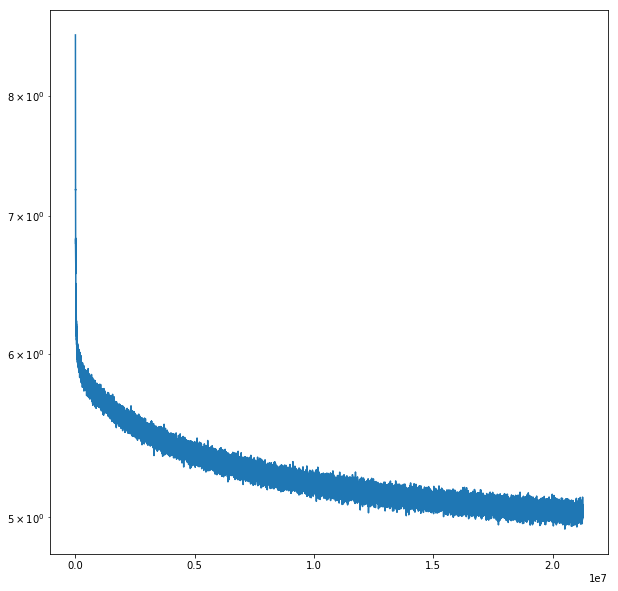

In [129]:
m = np.convolve(losses, np.ones(1000) / 1000)
plt.figure(figsize=(10, 10))
plt.plot(m[1000:-1000])
plt.yscale('log')
plt.show()

## Выбираем частые слова для визуализации

In [70]:
from collections import Counter
c = Counter(corpus[0])

In [118]:
words = sorted(c.keys(), key=lambda item: c[item], reverse=True)[:10000]
words = np.random.choice(words, 300, replace=False)

In [119]:
words

array(['patrick', 'spell', 'cardinals', 'norman', 'unable', 'socialism',
       'highland', 'mediterranean', 'prevents', 'abstract', 'seat',
       'machine', 'programmers', 'measures', 'tony', 'biologist',
       'despite', 'icons', 'possible', 'crops', 'national', 'system',
       'geoffrey', 'infinity', 'diagram', 'rex', 'saved', 'immediate',
       'davis', 'farms', 'poets', 'cut', 'addiction', 'rabbinic', 'cdots',
       'thoughts', 'industry', 'tragedy', 'quarterly', 'read',
       'concentrations', 'gear', 'pounds', 'achilles', 'restrictions',
       'twelfth', 'fredericton', 'resembling', 'bsd', 'ff', 'elijah',
       'aliens', 'incorrect', 'genome', 'popper', 'ii', 'anarcho',
       'glorious', 'scotland', 'speculation', 'bomb', 'appearance',
       'edit', 'georges', 'declare', 'gibson', 'grammy', 'weather',
       'doctor', 'edinburgh', 'confused', 'caused', 'equipment', 'earl',
       'definite', 'chip', 'bloody', 'explore', 'lacked', 'escape',
       'instrumental', 'depar

## Почему-то в моей версии эмеддинги на выходе(decode) получаются качественнее

In [120]:
v = get_decode_emb(words, model, batcher, device)

In [121]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(v)

In [131]:
# PCA для визуализации отработало плохо
# X = reduce_to_k_dim(v, k=2)

In [123]:
v.shape, X.shape

((300, 300), (300, 2))

## Визуализация, вроде бы, отражает действительность

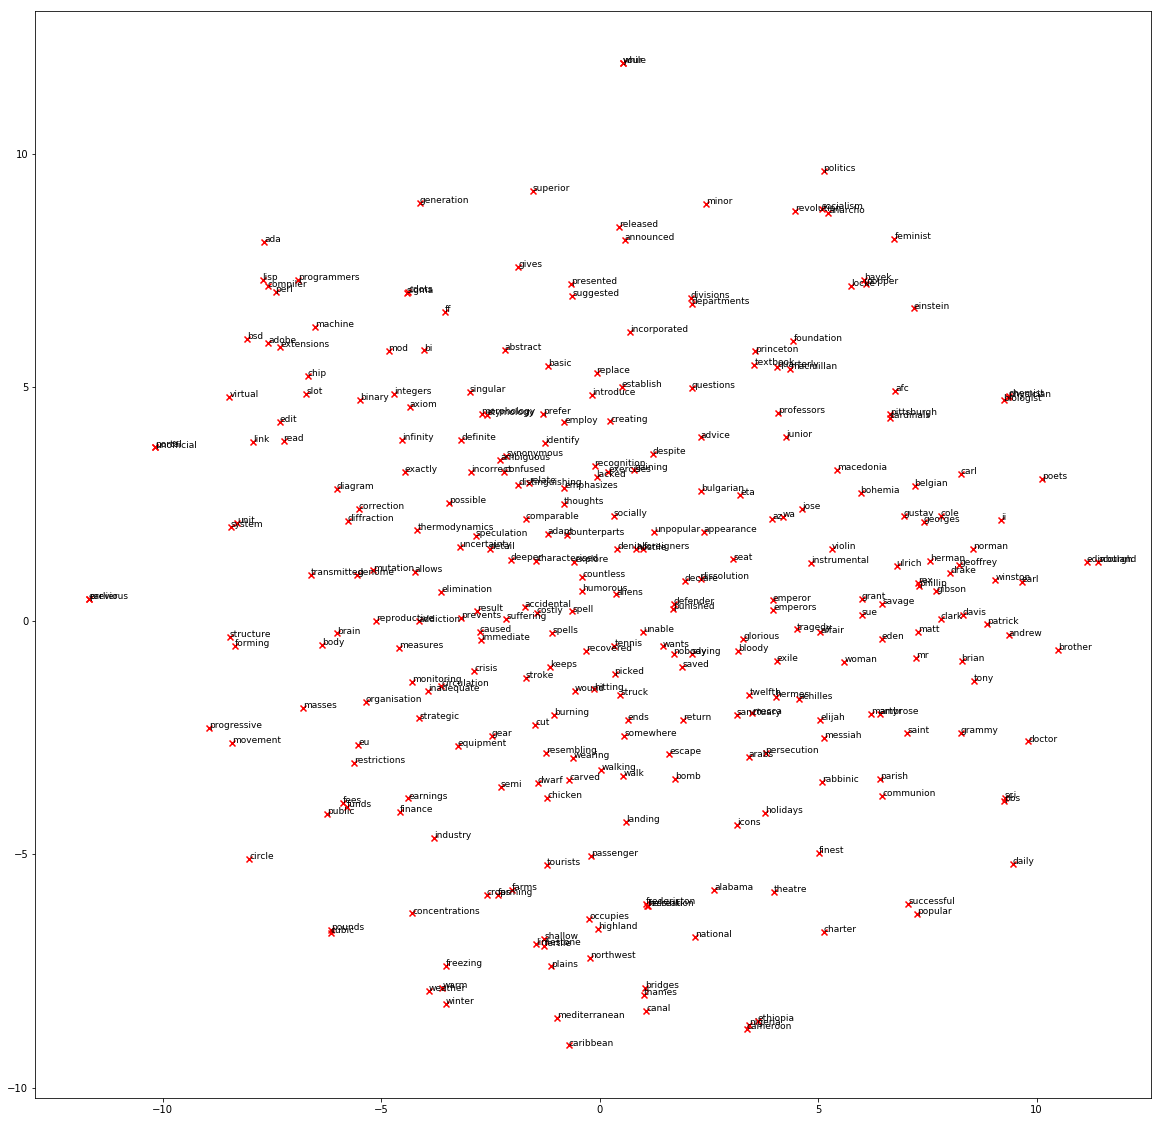

In [124]:
plot_embeddings(X, batcher.word2ind, words)

In [125]:
%%time
idx = Index(model, vocab, batcher, get_decode_emb, device)

CPU times: user 6.33 s, sys: 165 ms, total: 6.49 s
Wall time: 6.5 s


In [127]:
idx.most_similar(['man'], k=20)

[('man', 0.0),
 ('wight', 1.0018311662419404),
 ('men', 1.004104654025038),
 ('girl', 1.0324500066739928),
 ('woman', 1.0573114039390652),
 ('invisible', 1.086297119751625),
 ('person', 1.1000761460911657),
 ('mad', 1.1127532242175673),
 ('mr', 1.11766026237383),
 ('wonder', 1.1247850318671087),
 ('people', 1.125673569262074),
 ('dumb', 1.1260643268931805),
 ('beautiful', 1.1283721188218654),
 ('wise', 1.128966861140515),
 ('love', 1.1294974920473797),
 ('strange', 1.1299533937345951),
 ('dog', 1.1320000727791646),
 ('baby', 1.1352103801299767),
 ('daredevil', 1.1392701345660563),
 ('rogers', 1.1410353458088545)]

In [128]:
idx.most_similar(pos=['woman', 'king'], neg=['man'], k=20)

[('king', 0.6335167909819156),
 ('kings', 1.0938593673521877),
 ('isabella', 1.1497067036000872),
 ('pope', 1.1515591811568366),
 ('throne', 1.1592344995794677),
 ('aragon', 1.166048340202692),
 ('pharaoh', 1.1675042597102807),
 ('regent', 1.1785360615860943),
 ('alfonso', 1.1812646693373412),
 ('queen', 1.1837406885572412),
 ('prince', 1.1890759801915083),
 ('jadwiga', 1.1972762787237559),
 ('monarchs', 1.1978093914705223),
 ('woman', 1.198981991735252),
 ('christina', 1.1993123866003703),
 ('emperor', 1.2030383983010955),
 ('matilda', 1.2054980271369553),
 ('anjou', 1.206082264202692),
 ('monarch', 1.2063638267770433),
 ('hong', 1.2077755407918807)]